# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2025
## Практическое задание 3. Проверка статистических гипотез
### Дедлайн --- 8 ноября 16:00

Это обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Сдавать ноутбук нужно будет в LMS.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [127]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.stats.proportion as sts_prop
import scipy.optimize as spo
import scipy.stats as sts

sns.set(font_scale=1.4, style="darkgrid")
%config InlineBackend.figure_format='retina'

# НЛО прилетело и оставило это здесь.

## Важно:
- В рамках ноутбука уровень значимости зафиксирован на уровне $\alpha=0.05$.
- Если не сказано иного, критерий нужно написать **самостоятельно**.
- **Крайне** рекомендуется использовать пакет `mplcyberpunk` для рисования графиков, который можно подключить ячейкой ниже. Но следите, чтобы графики оставались информативными.

In [ ]:
# pip install mplcyberpunk

import mplcyberpunk

# plt.style.use("cyberpunk") 
# Для добавления антуража используйте mplcyberpunk.add_glow_effects() # Вообще не понравилось, как выглядит. Не считаю, что с моими графиками что-то не так

## Задача 1. Goodness-of-fit критерии

*Данная задача стоит 10 баллов.*

Данная задача посвящена критериям согласия. В прошлой домашке мы увидели, что в большой части теории статистики требуется предположение о нормальности. Нормальное распределение --- самая привычная для практики вещь, так что на практике часто делается ошибка --- нормальность полагается без проверки. Но как проверять нормальность? Мы делали это при помощи QQ-plot и "глазами", что, конечно же, является моветоном.

Предлагаем Вам реализовать и протестировать некоторые продвинутые способы проверки.

Так как задача проверки нормальности с неизвестными параметрами достаточно сложная, мы остановимся на нормальности с нулевым средним и единичной дисперсией.

Во всех пунктах (если не указано иного) нужно описать критерий, реализовать его самостоятельно (включая нахождение квантилей), промоделировать нормальные выборки и проверить, что вероятность отвержения нормальности для нормальной выборки не превосходит теоретической вероятности $\alpha = 0.05$.

### Распределение Стьюдента

1. Вспомните из лекций (или посмотрите на Википедии) определение распределения Стьюдента с параметром. Как оно ведёт себя с ростом параметра (числа степеней свободы)? Что будет происходить с p-value критериев проверки нормальности и с гипотезой о нормальности с ростом параметра (будет ли она отвергаться чаще или нет)?

Ответ:

<font color="#ae69c9ff">

Пусть $\{ \xi_i \}_{i=1}^{d}$ - норсв, $\xi_1 \sim N(0, 1)$ \
$X = \sum_{i=1}^{d}\xi_i^{2}$, тогда $X \sim \chi^{2}_{d}.$, кр. того, при $Z \sim N(0,1)$ \
$Z_d = \frac{N(0,1)}{\sqrt{X/d}}$ имееет распределение Стьюдента

С ростом $d$: $\frac{X}{d} \rightarrow 1$, т.к. вспомним УЗБЧ: $\sqrt{n}(\frac{\sum_{i=1}^{nd} \xi_i^2}{nd}-1) \stackrel{п.в.}{\longrightarrow} N(0,1)$
(Это правда т.к. сумма раскрывается явно, а $E\xi_i^2 = D\xi_i^2 - E^2\xi_i = 1 - 0 = 1$) $\Rightarrow \frac{\sum_{i=1}^{k} \xi_i^2}{k} = 1$ п.в.\
Получается, знаменатель п.в. 1, т.о. $Z_d \rightarrow N(0,1) \Rightarrow$ при гипотезе $X_i \sim N(a, \sigma^2)$ рассмотрим статистику $X_1$ и через теорему 7.1 книги Андрея Куссева (легенда, ответил на вопрос случайному студенту в 00:56) получим: $\text{p-value}(X_i) = 1 - F_{X_i}(X_1(X)) = 1 - F_{N(0,1)}(N(0,1)) = U[0;1]$

...

Вот примерно здесь случился мой дилог с Виталием 03.11 в ~02:10, у меня вопрос: а почему? Мне не очевидно, почему некорректно говорить, что в пределе распределение p-value будет равномерным. С теорвера у меня сложилась интуиция, что сходимость по распределению = совпадение распределений. Вероятно, тут реляет, что свойство предельное и тд... В общем, дорогой проверяющий, я буду очень рад, если ты (вы) оставишь мне ссылку на что-то, что стоит прочитать для получения ответа на этот вопрос.

<font color='red'>
	
1.1 распределение pvalue в пределе будет действительно стремится к равномерному по теореме о сохранении слабой сходимости

### Критерий согласия Колмогорова.

2.1 Вспомните первую домашку (или посмотрите раздел 12.1 методички) и сформулируйте теорему об асиимптотическом поведении статистики $\sqrt{n}D_n$. Постройте по этой теореме критерий согласия Колмогорова вида: если некоторая выборочная статистика попадает в некоторый интервал с конечными (квантили распределения Колмогорова) или бесконечными границами, то гипотеза отвергается.

<font color="#ae69c9ff">

Теорема Колмагорова (Th. 9.1 моей любимой книжки): Пусть F - непрерывная функчия распределения. Тогда случайная величина $\sqrt n D_n$ (где $D_n = \sup_{x\in \mathbb{R}} |\hat F_n(x) - F(x)|$) распределена одинаково вне зависимости от $F$ и слабо сходится к распределению Колмагорова с функцией распределения $K(t) = 1 + 2\sum_{k=1}^{\inf}(-1)^k e^{-2k^2t^2}$.

Отсюда легко заметить, что $R = {\sqrt n} D_n \geq k_{1-\alpha}$, где $k_p$ - p квнтиль распределения Колмагорова. Соответственно, попадание в правый хвост распределения Колмагорова, aka попадание в $R$ обозначает отвережение гипотезы.

2.2 Промоделируйте поведение статистики $\sqrt{n}D_n$ для некоторого выбранного Вами распределения и достаточно большого (1000+) n. Посчитайте выборочные квантили, которые Вам потребуются для критерия. *Замечание*. Для вычисления статистики критерия можно использовать готовую реализацию.

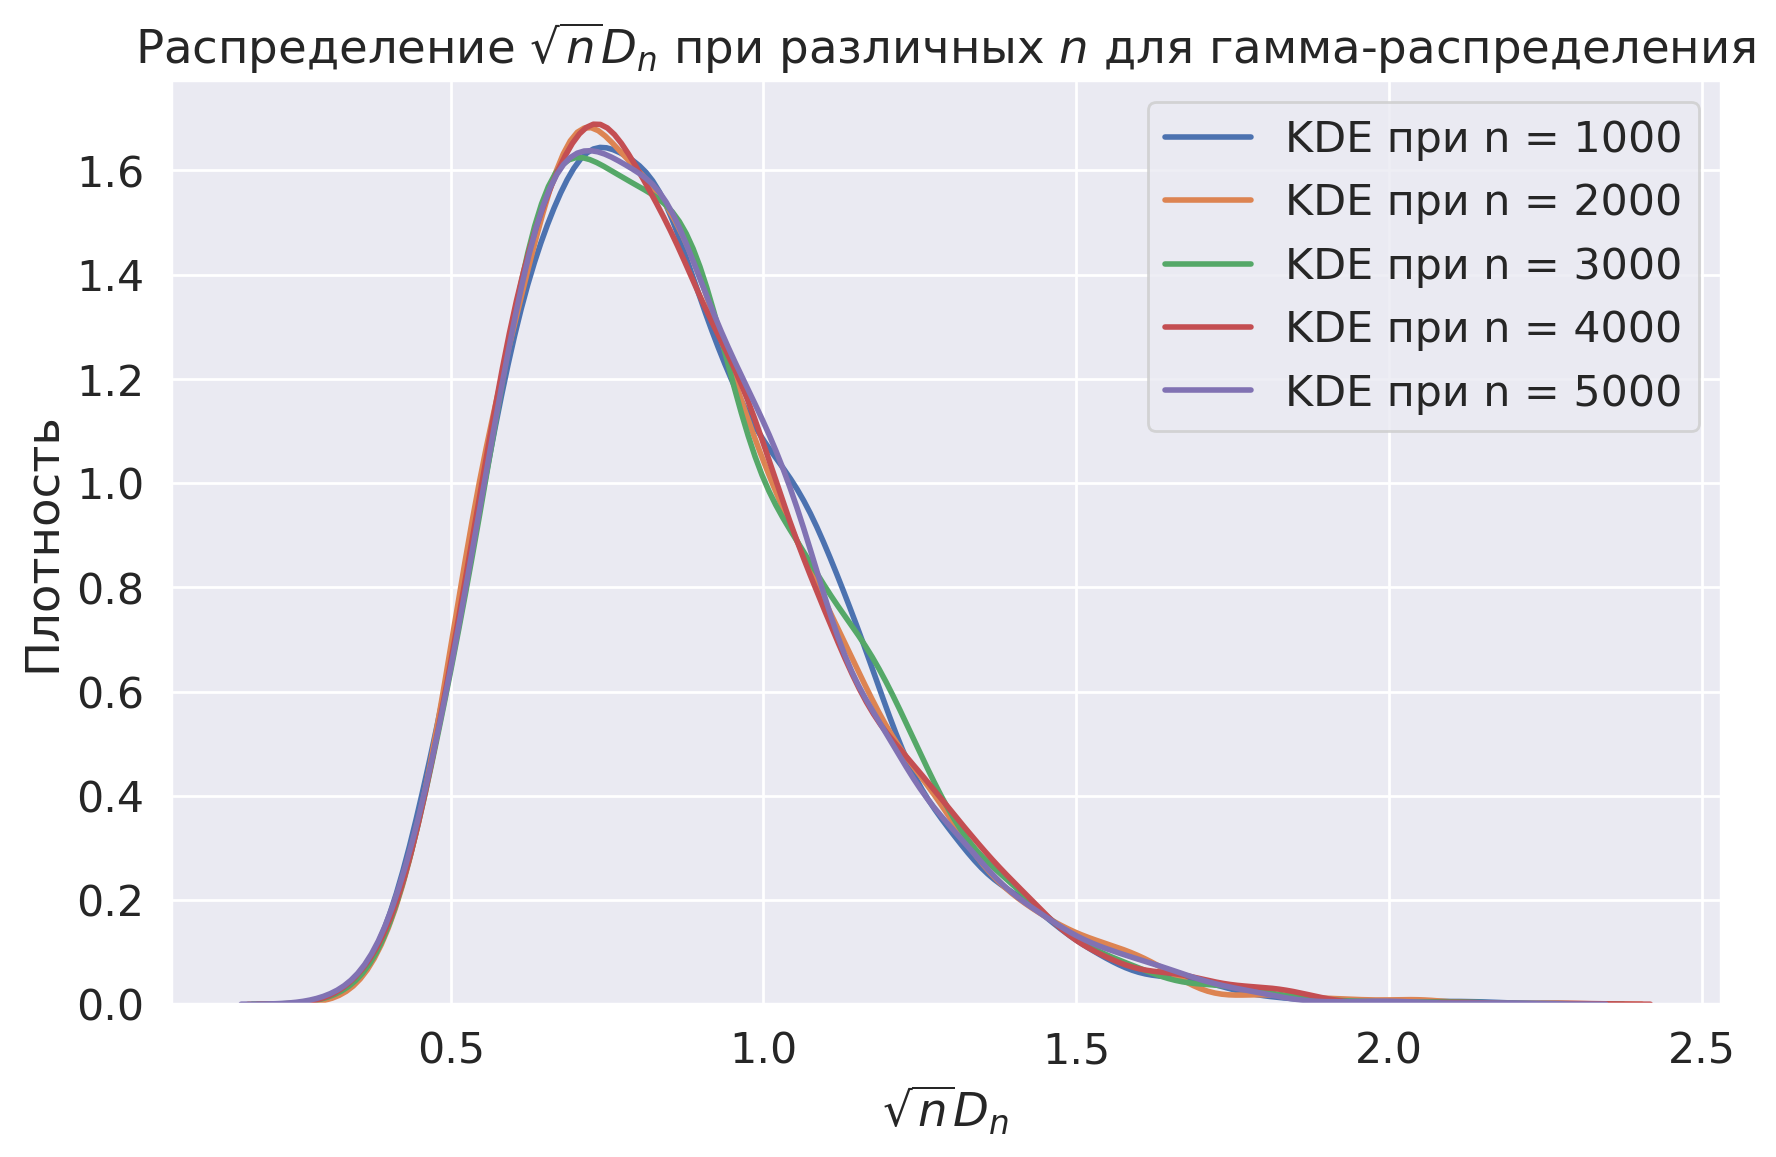

1.3491450569882277


In [53]:
ALPHA = 0.05
SEED = 42
SAMPLE_SIZE = 5000
N = 10000

step = int(SAMPLE_SIZE / 5)
view_points = np.array(range(step, SAMPLE_SIZE+1, step))

X = sps.gamma(2, 2).rvs((N, SAMPLE_SIZE), random_state=SEED)
D_n = np.array([sps.kstest(X[:n], sps.gamma(2, 2).cdf, axis=0).statistic for n in view_points])

plt.figure(figsize=(10,6))
[sns.kdeplot(D_n[i]*view_points[i]**0.5, lw=2, label="KDE при n = " + str(view_points[i])) for i in range(len(view_points))]
plt.legend(loc="best"); plt.xlabel(r"$\sqrt{n} D_n$"); plt.ylabel("Плотность"); plt.title(r"Распределение $\sqrt{n} D_n$ при различных $n$ для гамма-распределения")
plt.show()

k = np.sort(SAMPLE_SIZE ** 0.5 * D_n[-1])[int((1 - ALPHA) * SAMPLE_SIZE)]
print(k)

<font color="#ae69c9ff">

Построил 2 графика, так как не понравилось, что при обрезании до 5 KDE становится ломаным, а без этого график не информативен.
В общем да, всё хорошо, результат ожидаем, итог похож на распределение Колмагорова с картинок из пинтереста

<font color='red'>

1.2.2 k было выбрано с ошибкой, нужно было брать на позиции int((1 - ALPHA) * N), а не SAMPLE_SIZE (-1)

2.3 Выше было промоделировано асимптотическое распределение, но что если выборка не шибко большого размера, и для неё приближение, даваемое теоремой выше, плохое? Давайте проверим это.

Сгенерируйте 10000 нормальных выборок размера 100 и посмотрите, как часто критерий отвергает гипотезу. Для критерия берите квантили, посчитанные ранее.

In [54]:
SAMPLE_SIZE = 100
N = 10000

X = sps.norm(2, 3).rvs((N, SAMPLE_SIZE), random_state=SEED)
D_n = np.array(sps.kstest(X, sps.norm(2, 3).cdf, axis=1).statistic)

print("Гипотеза была отвергнута в " + str(np.sum(SAMPLE_SIZE**0.5 * D_n > k)) + " случаях из " + str(N))

Гипотеза была отвергнута в 503 случаях из 10000


<font color="#ae69c9ff">

Прикольно, я снала по ошибке подав в критерий Колмагорова гамма распределение и искал ошибку, почему же у меня отвержение в 10000 случаев на маленькой выборке
Классно, критерий показыват себя хорошо даже при малом количестве элементов в выборке.

Ещё поигрался с размером выборки _- проиграл_. На малых SAMPLE_SIZE (10) получил отвержение на 300 выборках, на больших (10000) - на 500. Прикольно, мы ещё и стремимся к $\alpha$. А... Ну да, это я матстату проиграл в своих предположениях. Если заметим, что $P(\sqrt n D_n > k_{1-\alpha}) = 1 - F_n(k_{1-\alpha}) = \alpha$, то результат больше не будет нас удивлять

2.4 Постройте график мощности критерия на альтернативе в виде распределения Стьюдента в зависимости от параметра $k$. То есть для каждого $k$ из какой-то разумной сетки посчитайте долю отвергаемых критерием стьюдентовских выборок.

In [55]:
# В середине прака я че-то испугался, что семплировать можно только нормальные распределение и переделал генерацию вот на такие функции
# Когда-то они умели генерить с.в. только по нормальным с.в., но это страшно неэффективно по времени, да и не особо нужно, как оказалось
# Итог: я вернул назад sps.chi2.rvs и всё

def chi2_rvs(k, N, SAMPLE_SIZE):
    return sps.chi2(k).rvs((N, SAMPLE_SIZE))

def student_rvs(k, N, SAMPLE_SIZE):
    return sps.norm(0, 1).rvs((N, SAMPLE_SIZE)) / np.sqrt(chi2_rvs(k, N, SAMPLE_SIZE) / k)

def chi2_single_rvs(k, SAMPLE_SIZE):
    return sps.chi2(k).rvs((SAMPLE_SIZE))

def student_single_rvs(k, SAMPLE_SIZE):
    return sps.norm(0, 1).rvs((SAMPLE_SIZE)) / np.sqrt(chi2_single_rvs(k, SAMPLE_SIZE) / k)

# Теперь это всё вообще не нужно

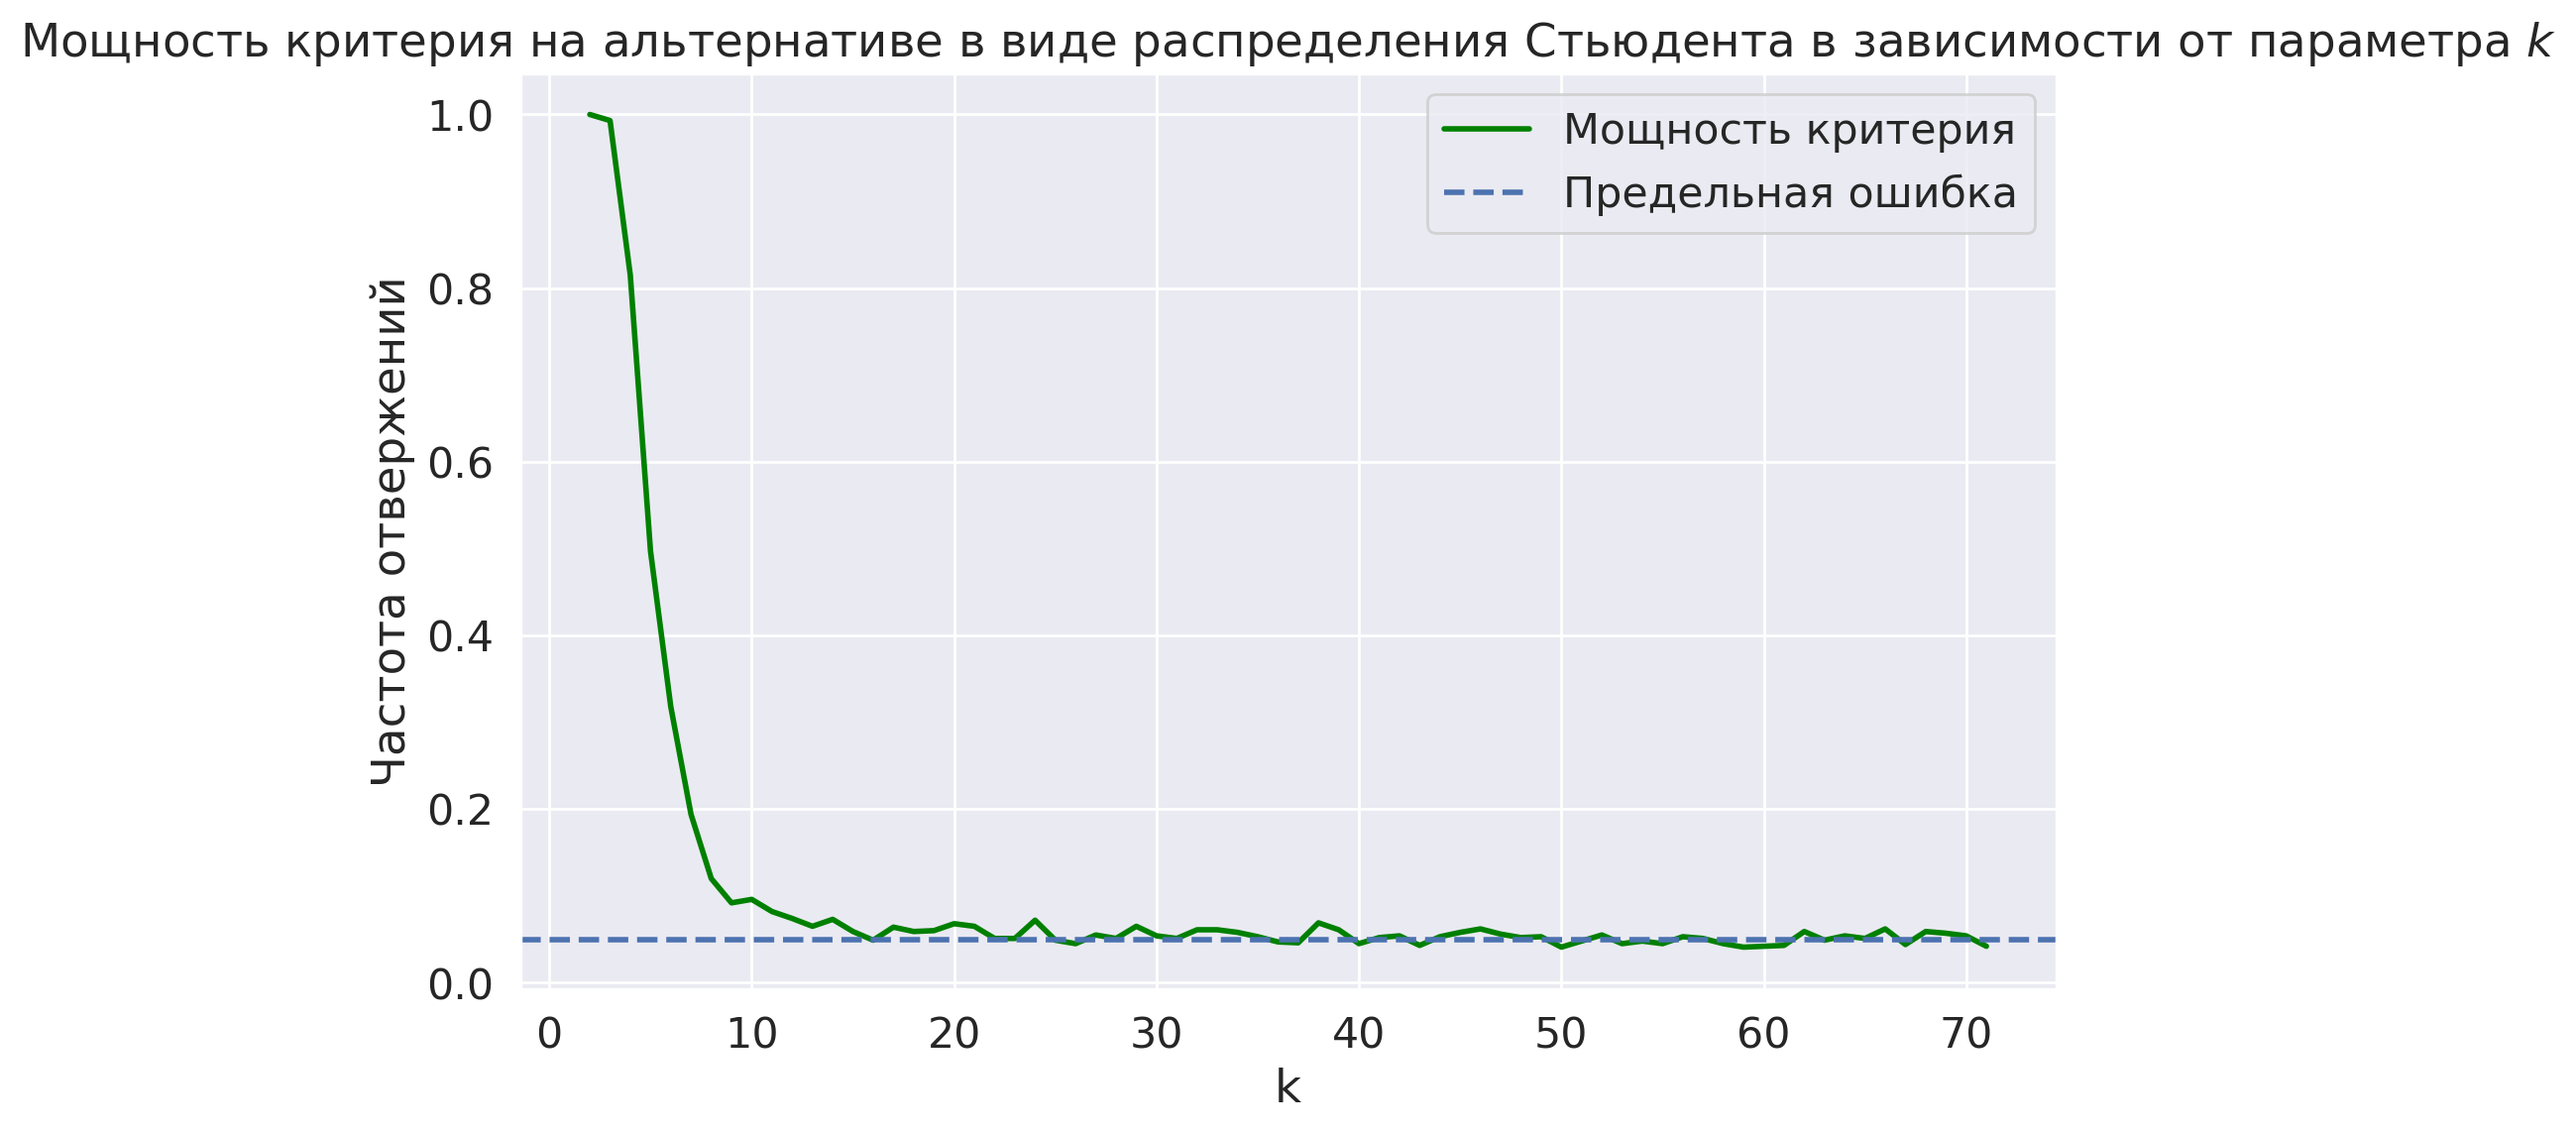

In [56]:
SAMPLE_SIZE = 1000
N = 1000
k_range = np.arange(2, 72)

# D_n_tmp = np.array([sps.kstest(student_rvs(k, N, SAMPLE_SIZE), sps.norm(0, 1).cdf, axis=1).statistic for k in k_range])
D_n_tmp = sps.kstest(sps.norm.rvs(size=(k_range.size, N, SAMPLE_SIZE)) / np.sqrt(sps.chi2.rvs(k_range[:, None, None], size=(k_range.size, N, SAMPLE_SIZE)) / k_range[:, None, None]), sps.norm(0, 1).cdf, axis=2).statistic
k_tmp = k

plt.figure(figsize=(10,6))
plt.plot(k_range, np.sum(SAMPLE_SIZE ** 0.5 * D_n_tmp > k, axis=1) / N, lw=2, c="green", label="Мощность критерия")
plt.axhline(ALPHA, ls="--", lw=2, label="Предельная ошибка")
plt.title(r"Мощность критерия на альтернативе в виде распределения Стьюдента в зависимости от параметра $k$"); plt.xlabel("k"); 
plt.ylabel(r"Частота отвержений"); plt.legend(loc="best"); plt.grid(True)
plt.show()

<font color="#ae69c9ff">

О, прикольно! С ростом k распределение Стьюдента становится не отличимым от N(0,1) по мнению критерия Колмагорова.

Это почти ответ на мой вопрос ранее. А всё же, почему скорость сходимости именно такая?

### Продвинутые критерии согласия

3. Проделайте действия из предыдущего пункта задачи для [критерия Андерсона-Дарлинга](https://en.wikipedia.org/wiki/Anderson–Darling_test) или [Крамера-фон Мизеса-Смирнова](https://en.wikipedia.org/wiki/Cramér–von_Mises_criterion). Какой именно критерий предстоит вам реализовать --- определит по вашей фамилии ячейка ниже.

Сравните их отвергающую способность для Стьюдента с аналогичной у критерия Колмогорова (на одном графике!). Переиспользуйте уже написанный код!

In [46]:
surname = "Евтушенко"
your_test = (
    'Андерсон-Дарлинг'
    if hash(surname.lower().replace('ё', 'е')) % 2 else
    'Крамер-фон Мизес-Смирнов'
)
your_test

# А окак прикольно позитивно. Короче тут хэш недетрминимрованный, мне в первый раз выпал критерий Андерсона-Дарлинга, я его и реализовал

'Крамер-фон Мизес-Смирнов'

/tmp/ipykernel_692589/1090558652.py:7: RuntimeWarning: divide by zero encountered in log
  D_n = (-SAMPLE_SIZE - (1/SAMPLE_SIZE)*np.sum(((2*np.arange(1, SAMPLE_SIZE+1)-1)[None,None,:]) * (np.log(F := sps.norm.cdf(np.sort(Z := ((X := sps.t.rvs(df=k_range[:,None,None], size=(k_range.size, N, SAMPLE_SIZE))) - X.mean(axis=2, keepdims=True))/X.std(axis=2, ddof=1, keepdims=True), axis=2))) + np.log(1 - F[..., ::-1])), axis=2))


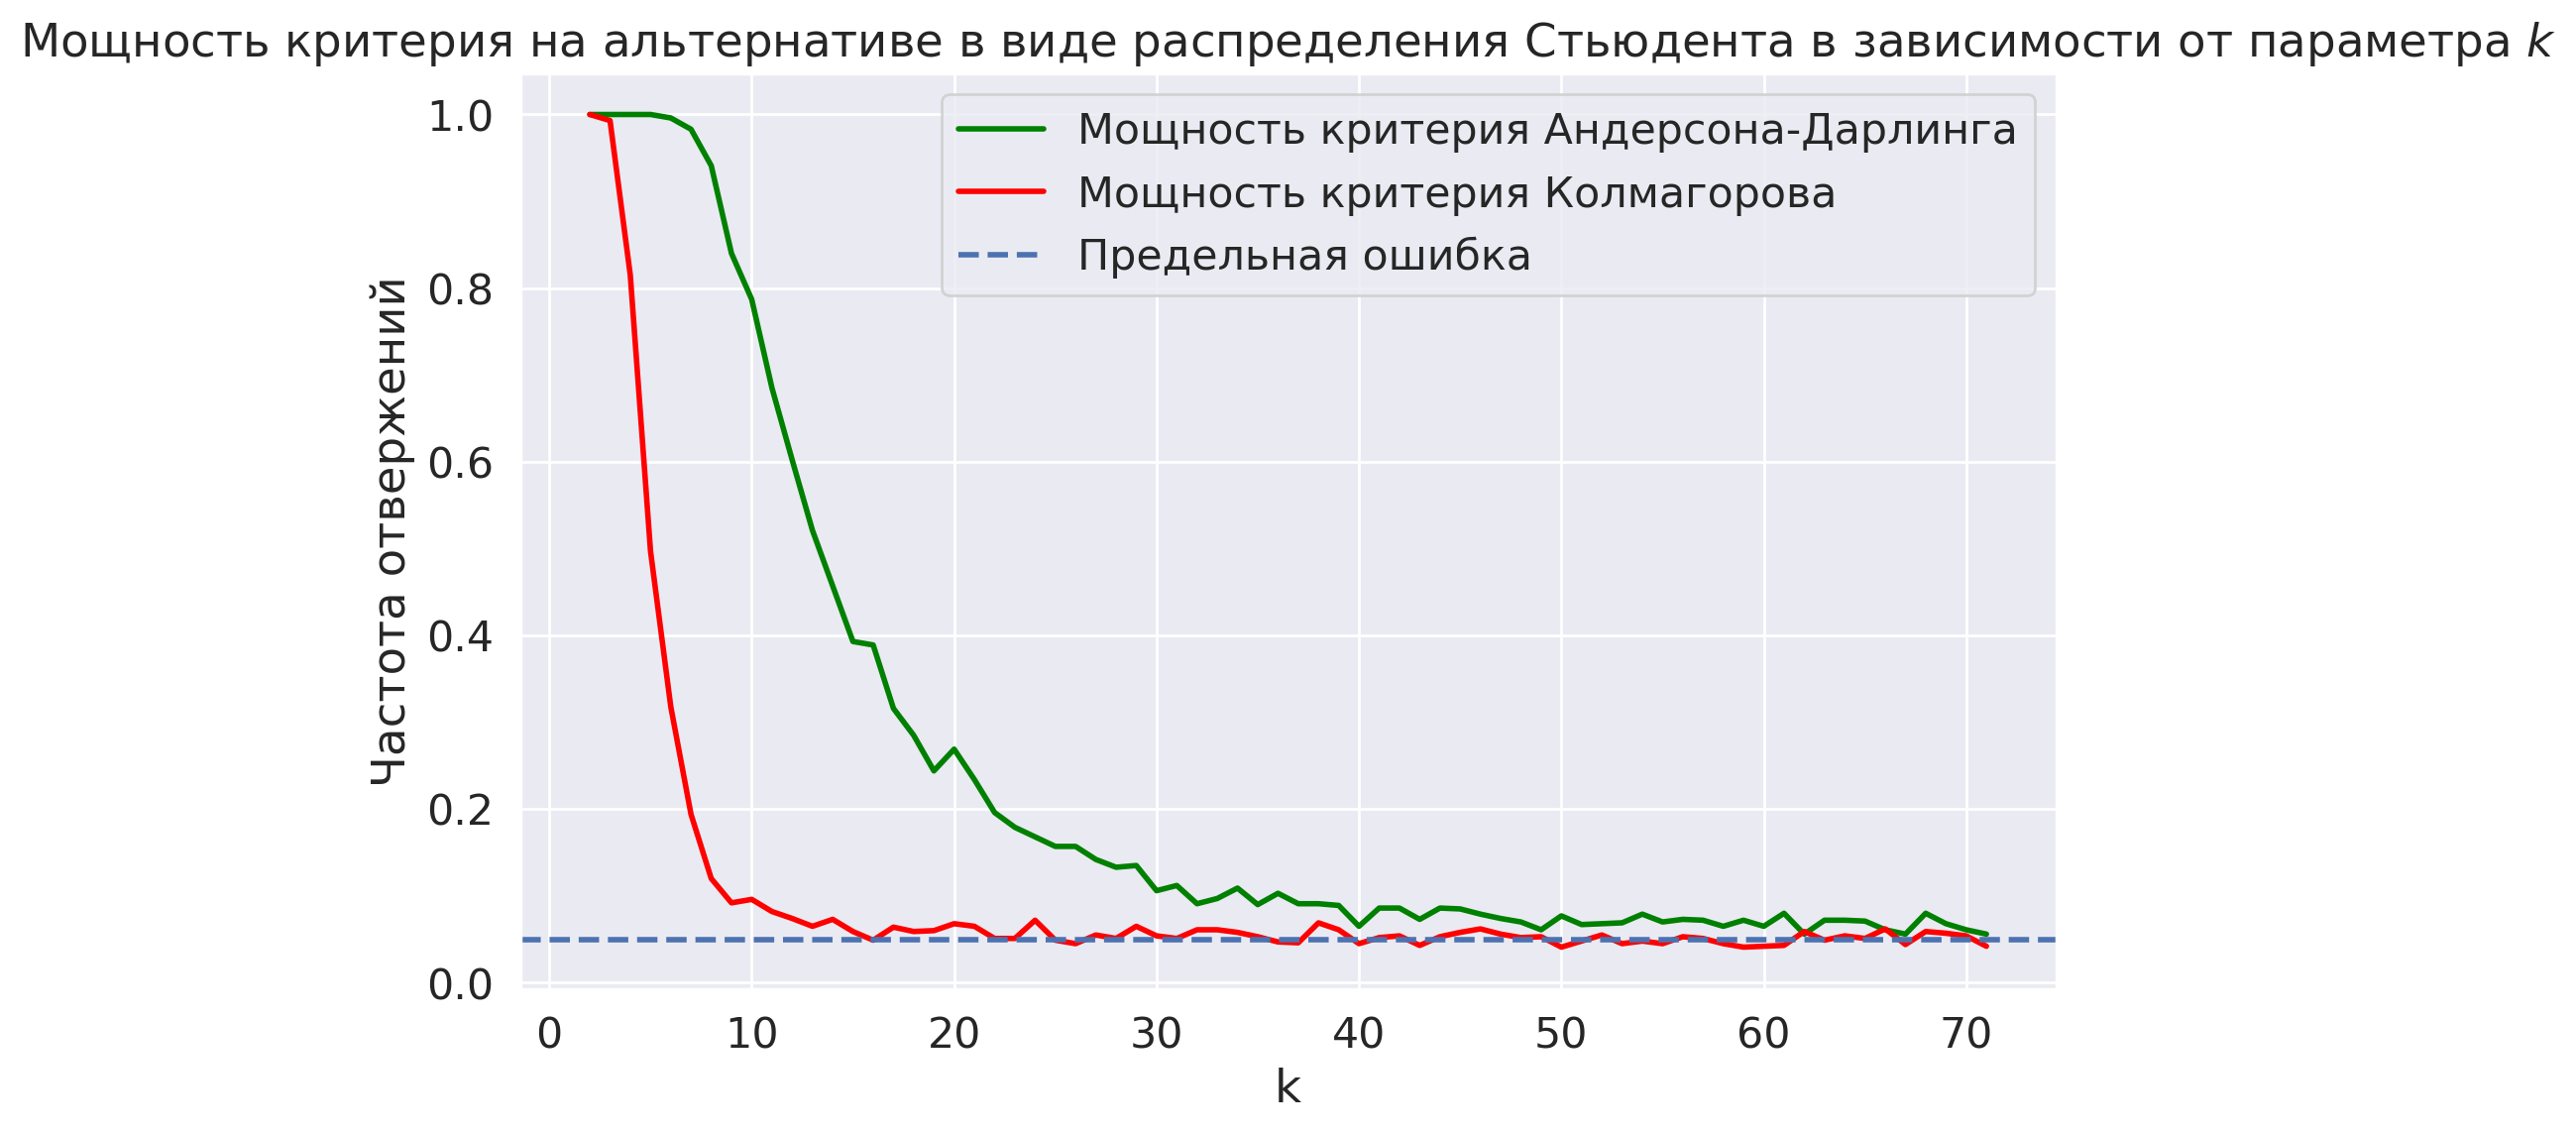

In [57]:
k = np.sort(np.array([sps.anderson(sps.norm(0,1).rvs(1000)).statistic for _ in range(10000)]))[int(10000*(1-ALPHA))]

# D_n = np.array([[sps.anderson(student_single_rvs(k, SAMPLE_SIZE), dist="norm").statistic for _ in range(N)] for k in k_range])

# Я согласен с тем, что вычисления не векторные, но я очень обижусь, если за это снимут баллы. Как будто бы sps.anderson не поддерживает векторные вычисления, а считать интегральчики - не вайб

D_n = (-SAMPLE_SIZE - (1/SAMPLE_SIZE)*np.sum(((2*np.arange(1, SAMPLE_SIZE+1)-1)[None,None,:]) * (np.log(F := sps.norm.cdf(np.sort(Z := ((X := sps.t.rvs(df=k_range[:,None,None], size=(k_range.size, N, SAMPLE_SIZE))) - X.mean(axis=2, keepdims=True))/X.std(axis=2, ddof=1, keepdims=True), axis=2))) + np.log(1 - F[..., ::-1])), axis=2))
#                                                                                                                                                ^ я сдаюсь

# ладно, если прям очень хочется, можно и векторно посчитать (спасите, меня держат в заложниках)

plt.figure(figsize=(10,6))
plt.plot(k_range, np.sum(D_n > k, axis=1) / N, lw=2, c="green", label="Мощность критерия Андерсона-Дарлинга")
plt.plot(k_range, np.sum(SAMPLE_SIZE ** 0.5 * D_n_tmp > k_tmp, axis=1) / N, lw=2, c="red", label="Мощность критерия Колмагорова")

plt.axhline(ALPHA, ls="--", lw=2, label="Предельная ошибка")
plt.title(r"Мощность критерия на альтернативе в виде распределения Стьюдента в зависимости от параметра $k$"); plt.xlabel("k"); 
plt.ylabel(r"Частота отвержений"); plt.legend(loc="best"); plt.grid(True)
plt.show()

<font color="#ae69c9ff">

Прикольно, прям очень прикольно. Критерий Андресона-Дирлинга много сильнее и интереснее критерий Колмагорова, он "замечает", что распределение Стьюдента отлично от нормальнго ещё при k ~ 15, а после 70 и он сдаётся. _Вероятно, в пределе мы получим всё-таки равномерно распределение p-value в первом пункте...)_

### Критерий согласия Пирсона

4.1 Изучите критерий согласия Пирсона. В оригинальной постановке он работает для дискретных распределений. Предложите способ проверки при помощи него гипотез согласия для непрерывных распределений.

<font color="#ae69c9ff">

Изучил. Дейсвительно, критерий Пирсона работает только для мультимиального распределения, отсюда естветсвенное желание сделать любое непрерывное таковым. Благо, это просто: идейно мы почти как будто приближаем KDE гистограммой; однако R что-то не хочет биться на конечное количество равных интервалов, давайте же разобьём на конечное количество интервалов с примерно равной площадью между ними и плотностью, что можно сделать через квантиили. Штука выходит предельной, однако, работает. До этого я додумался сам, более формальное же описание работы обобщения критерия можно прочитать в книге Андрея Куссева на страницах 86-89.

4.2 Постройте критерий согласия Пирсона для проверки равенства распределения стандартному нормальному. Опишите, какие квантили для распределения хи-квадрат Вам потребуются.

<font color="#ae69c9ff">

Собсвтенно, для разбиения, описанного выше хочется использовать квантили $\Delta_i = F^{-1}(\frac{i}{n}) \ \forall i \in 0 \cdots n$ для разбиения на $n$ полуинтервалов вида $[\Delta_i, \Delta_{i+1}]$. Внимательно почитатв книгу, заметим в ней теорему 9.4, которая говорит следующее: $\chi^2(X) \rightarrow \chi^2_{k-1}$, где $\chi^2(X) = \sum_{i=1}^k\frac{(X_i - np_i^0)^2}{np_i^0}$ - интересующая нас статистика, а $p_i^0$ - вероятности в нулевой гипотизе (хотим, чтобы все они были 1/n).

Ну это сложная штука, я не думаю, что полностью её понял. Утверждается, что мы хотим брать критериаем $R = \{x: \chi^2(x) > \chi^2_{k-1, 1-\alpha}\}$. К концу прака я это осознаю, но пока у меня нет выбора, я всё это хаваю.

UPD1: _окак_, ну короче все k ранее - это m далее, иначе грустно с неймингом

UPD2: "Пирсон доказал, что вот такую нужно взять степень свободы. Не ищите в этом смысл" - 5 лекция, 1:07:20, лектор - Виталий Пырэу.

4.3. Промоделируйте статистику Пирсона, считая доступным только нормальное распределение (другие семплировать нельзя!). Найдите нужные для критерия Пирсона квантили.

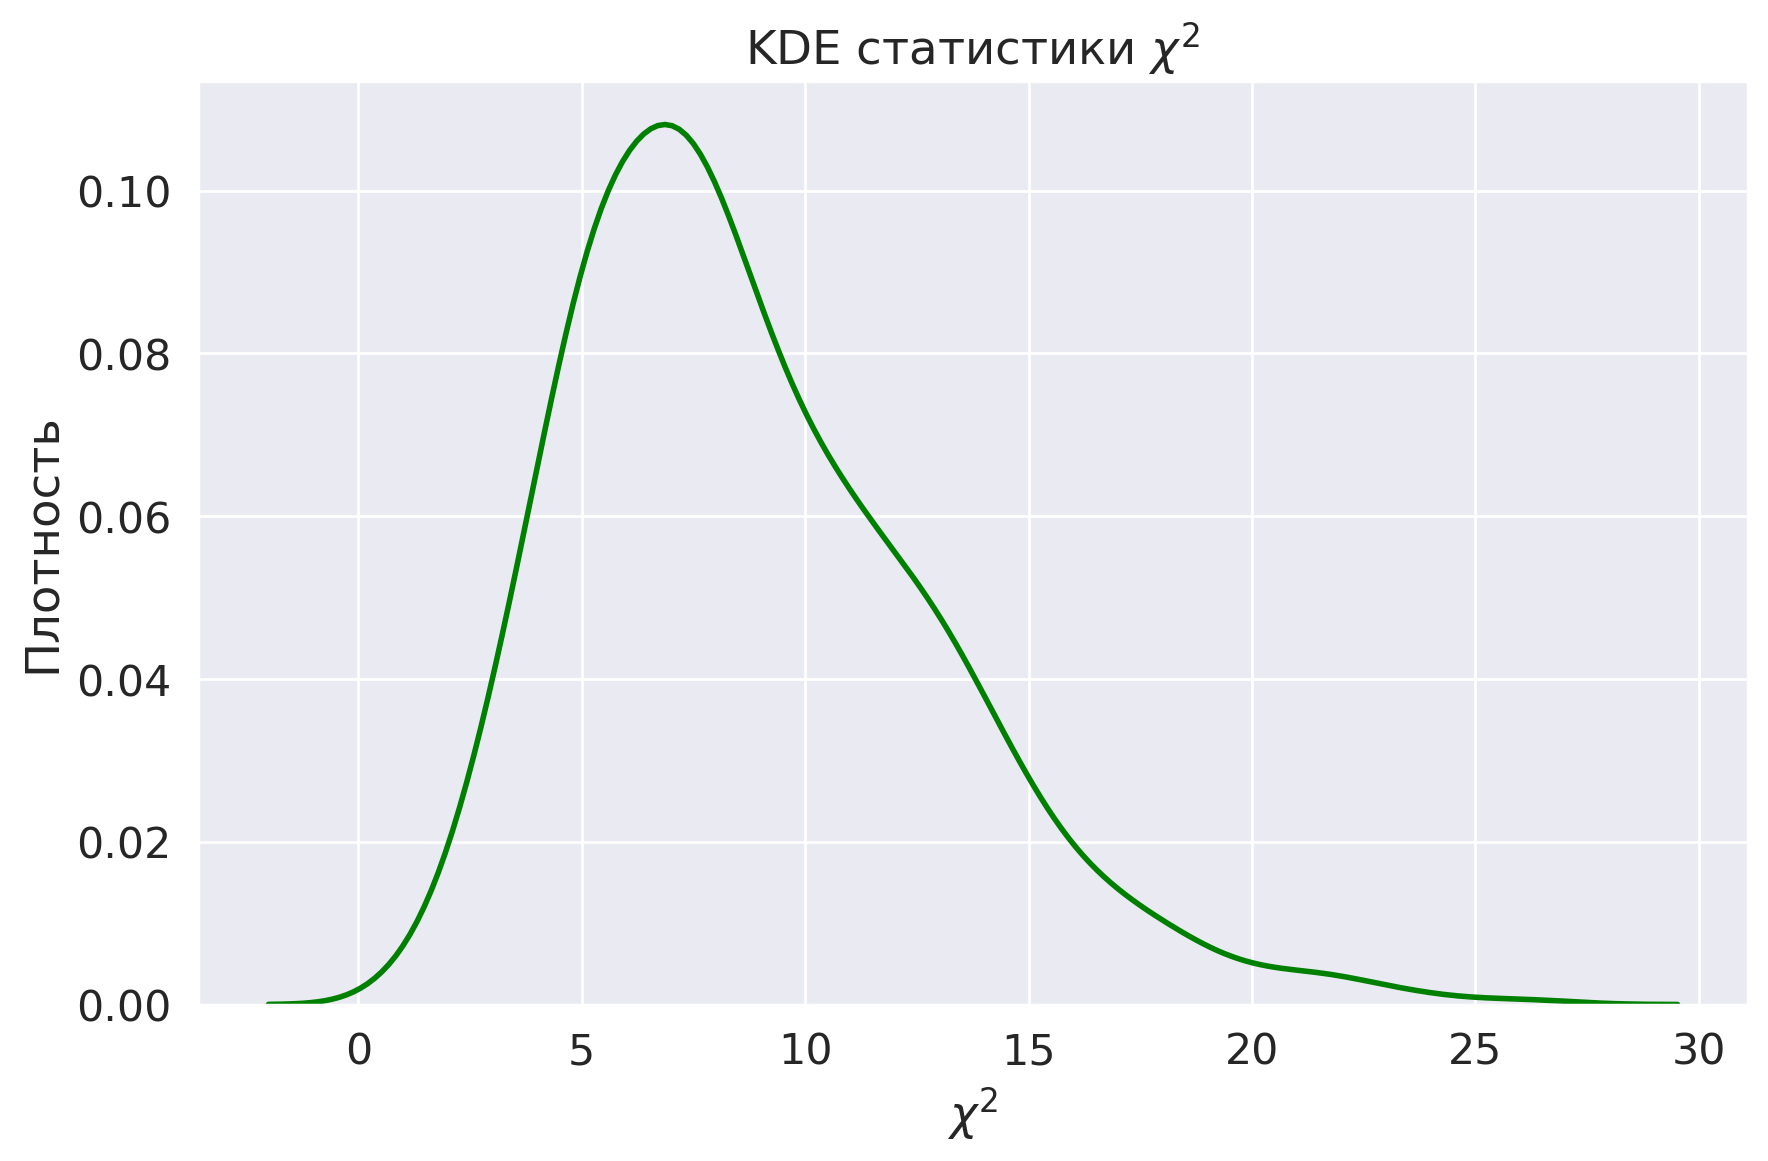

In [58]:
SAMPLE_SIZE = 5000
N = 1000
m = 10

deltas = sps.norm(0, 1).ppf(np.linspace(0, 1, m + 1))
deltas[0], deltas[-1] = -np.inf, np.inf

X = sps.norm(0, 1).rvs((N, SAMPLE_SIZE), random_state=SEED)
X_i = ((X[..., None] > deltas[:-1]) & (X[..., None] <= deltas[1:])).sum(axis=1) # ого, и так можно. _Это было написано на стене в болтае._
Chi2_n = np.sum((X_i - SAMPLE_SIZE / m) ** 2 / (SAMPLE_SIZE / m), axis=1)

plt.figure(figsize=(10,6))
sns.kdeplot(Chi2_n, lw=2, c="green")
plt.title(r"KDE статистики $\chi^2$"); plt.xlabel(r"$\chi^2$"); 
plt.ylabel(r"Плотность"); plt.grid(True)
plt.show()

Выполните пункты, аналогичные 2.3 и 2.4. Постарайтесь так построить критерий согласия Пирсона, чтобы мощность для разных k была как можно больше.

In [59]:
k = np.sort(np.sum(sps.norm(0, 1).rvs((m-1, N)) ** 2, axis=0))[int(N*(1-ALPHA))]
print(k)

print("Гипотеза была отвергнута в " + str(np.sum(Chi2_n > k)) + " случаях из " + str(N))

17.32141668847938
Гипотеза была отвергнута в 37 случаях из 1000


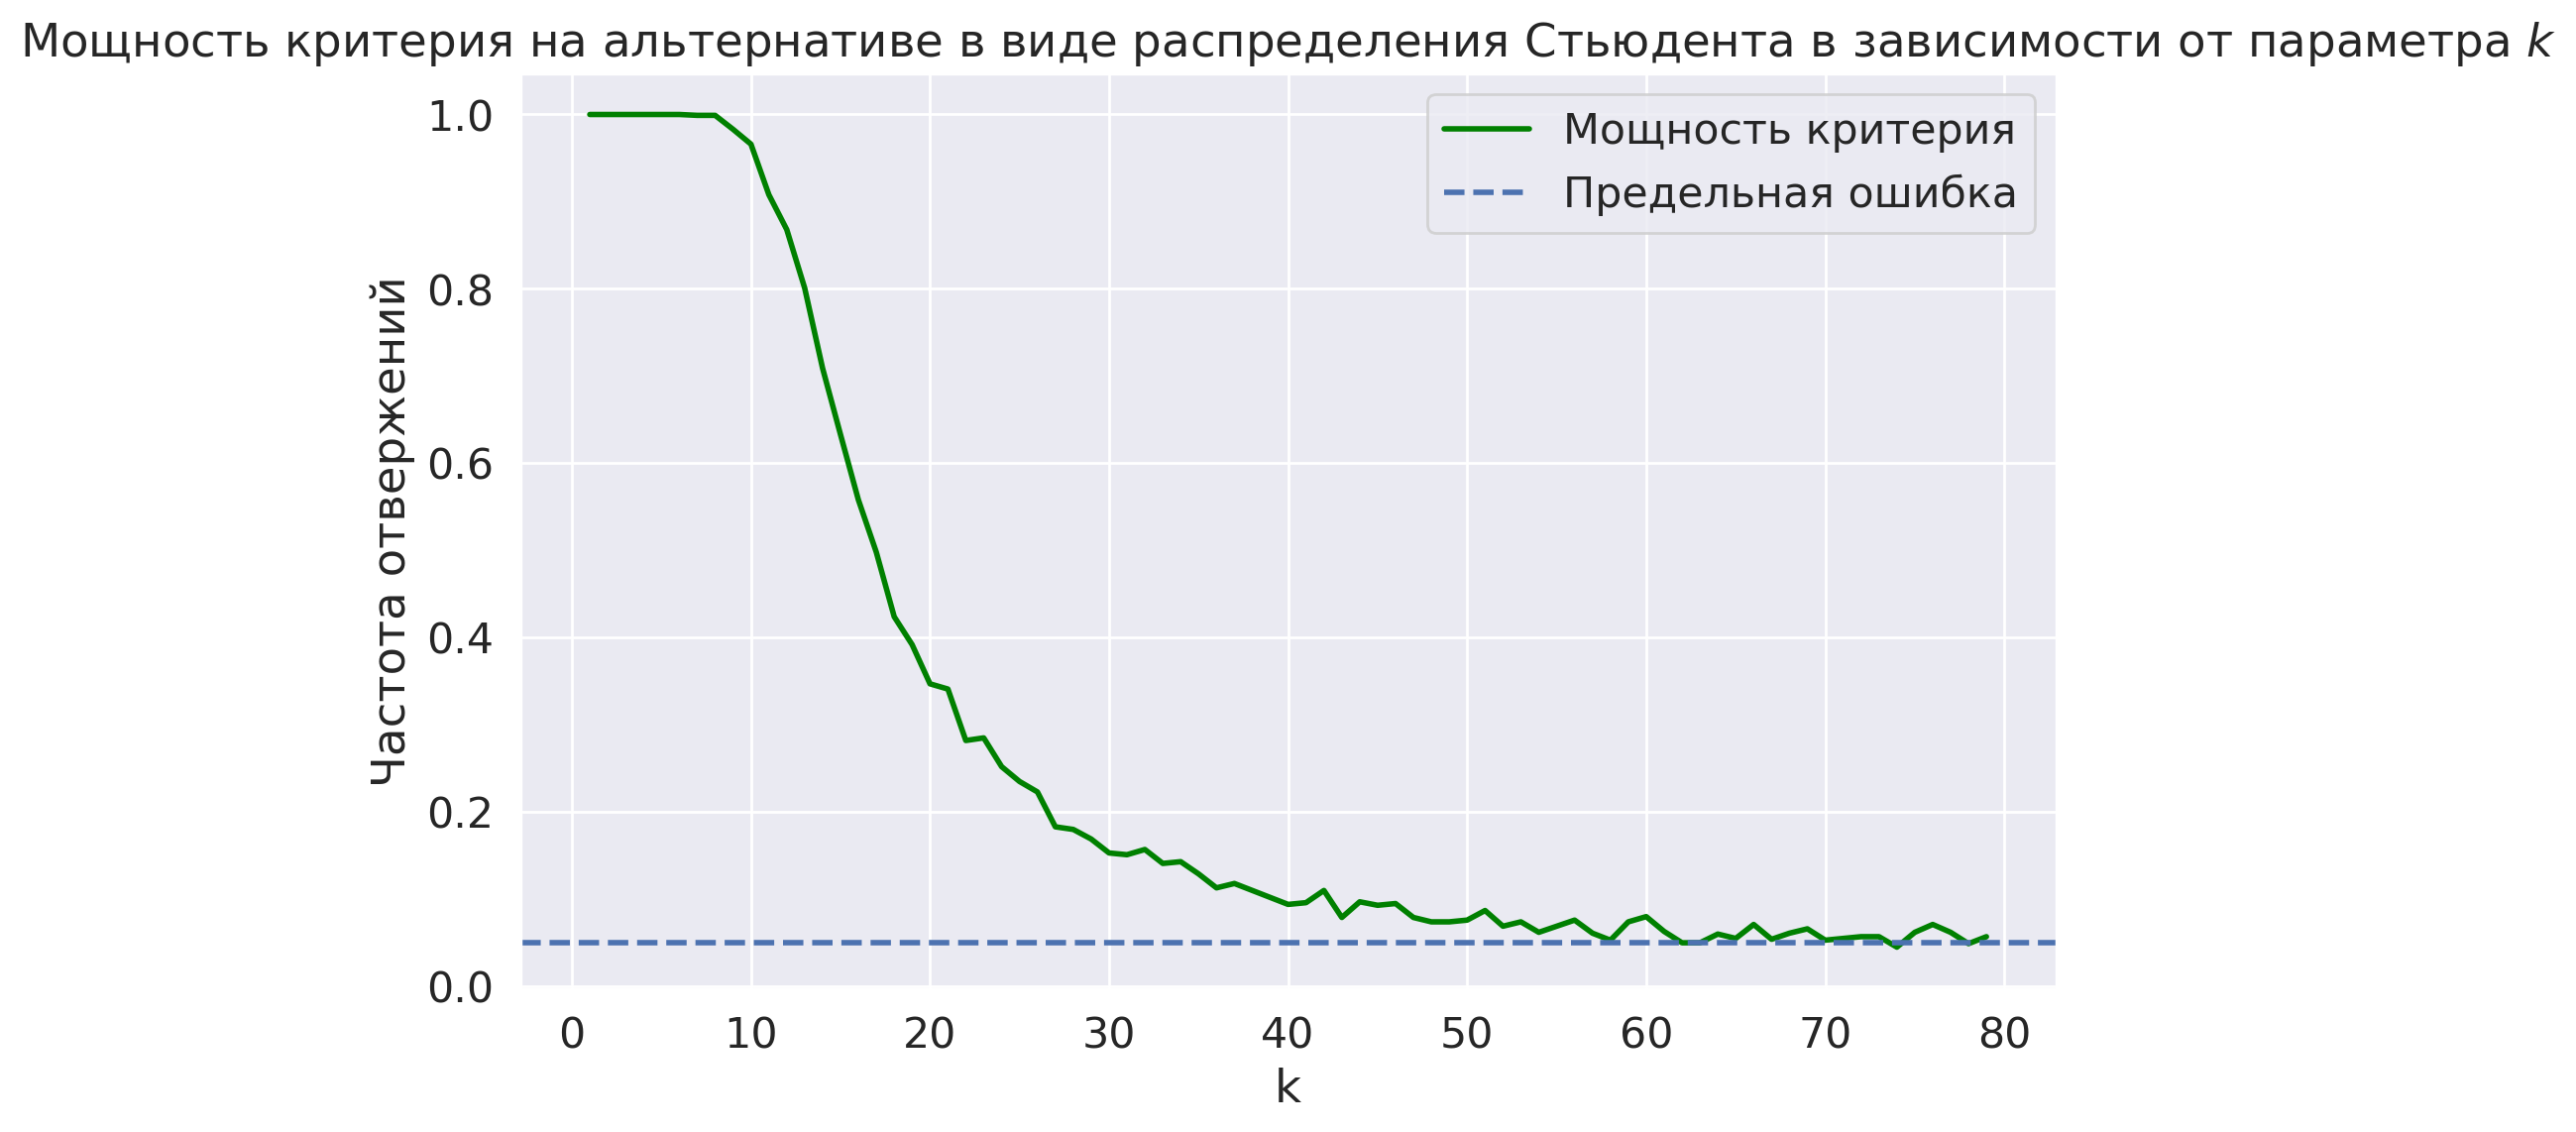

In [60]:
k_range = np.arange(1, 80)

# X = np.array([student_rvs(k, N, SAMPLE_SIZE) for k in k_range])
X = sps.norm.rvs(size=(k_range.size, N, SAMPLE_SIZE)) / np.sqrt(sps.chi2.rvs(k_range[:, None, None], size=(k_range.size, N, SAMPLE_SIZE)) / k_range[:, None, None])

X_i = ((X[..., None] > deltas[:-1]) & (X[..., None] <= deltas[1:])).sum(axis=2)
Chi2_n = np.sum((X_i - SAMPLE_SIZE / m) ** 2 / (SAMPLE_SIZE / m), axis=2)

plt.figure(figsize=(10,6))
plt.plot(k_range, np.sum(Chi2_n > k, axis = 1) / N, lw=2, c="green", label="Мощность критерия")
plt.axhline(ALPHA, ls="--", lw=2, label="Предельная ошибка")
plt.title(r"Мощность критерия на альтернативе в виде распределения Стьюдента в зависимости от параметра $k$"); plt.xlabel("k"); 
plt.ylabel(r"Частота отвержений"); plt.legend(loc="best"); plt.grid(True)
plt.show()

<font color="#ae69c9ff">

Йоооу!! Прям криутой результат, прикольно. Я объяснил его себе так: у распределения Стьюдента хвосты тяжелее, чем у нормального, а так как в статистике квадраты отклонений, то разница на краях распределений становится существенной

### Стандартные способы проверки

5.1 Изучите критерий Шапиро-Уилка по [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro).

Что он проверяет? Будет ли он корректен для проверки распределения на равенство $\mathcal N(0, 1)$?

<font color="#ae69c9ff">

Критерий Шапиро-Уилка проверяет принадлежность распределения классу нормальных распр., вычсиляя статистику через выборочные коэффициенты асимметрии и эксцесса.

В явном виде равенство $N(0,1)$ проверить не удастся, ибо строка выше. 

5.2 Используя библиотечную реализацию, проверьте уровень значимости и посчитайте мощность критерия на альтернативе в виде распределения Стьюдента с растущей степенью свободы. Постройте график, аналогичный пукнту 2.4

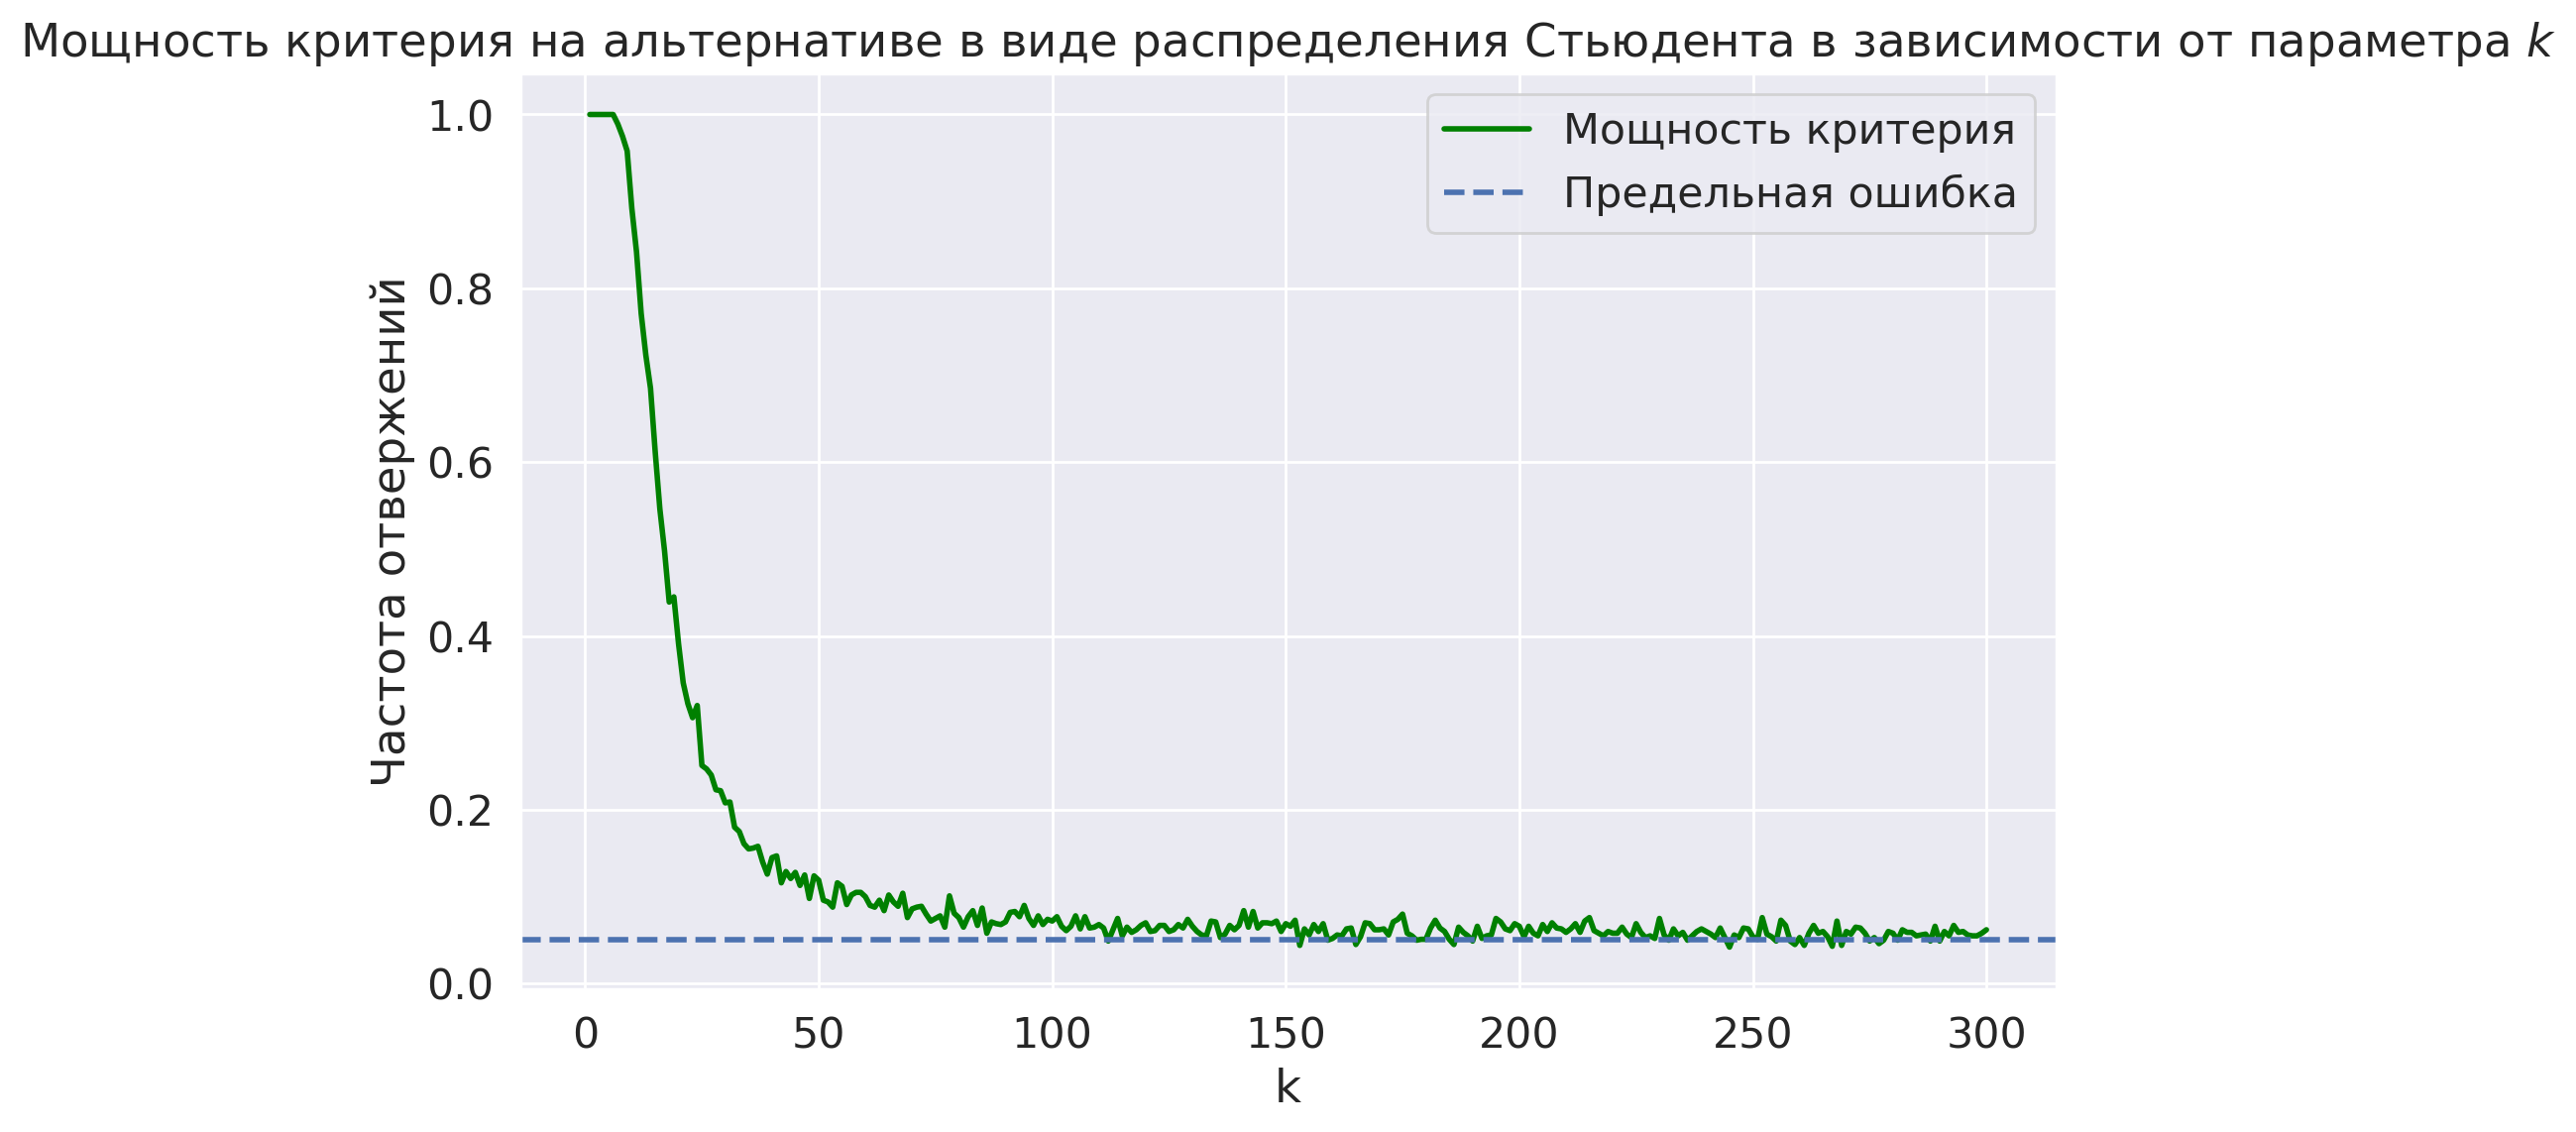

In [61]:
SAMPLE_SIZE = 1000
N = 1000
k_range = np.arange(1, 301)

# Pv_k = np.array([sps.shapiro(sps.norm(0, 1).rvs((N, SAMPLE_SIZE)) / np.sqrt(sps.chi2(k).rvs((N, SAMPLE_SIZE)) / k), axis=1).pvalue for k in k_range])
Pv_k = sps.shapiro(sps.norm.rvs(size=(k_range.size, N, SAMPLE_SIZE)) / np.sqrt(sps.chi2.rvs(k_range[:, None, None], size=(k_range.size, N, SAMPLE_SIZE)) / k_range[:, None, None]), axis=2).pvalue

plt.figure(figsize=(10,6))
plt.plot(k_range, np.sum(Pv_k < ALPHA, axis=1) / N, lw=2, c="green", label="Мощность критерия")
plt.axhline(ALPHA, ls="--", lw=2, label="Предельная ошибка")
plt.title(r"Мощность критерия на альтернативе в виде распределения Стьюдента в зависимости от параметра $k$"); plt.xlabel("k"); 
plt.ylabel(r"Частота отвержений"); plt.legend(loc="best"); plt.grid(True)
plt.show()

Прикольно, сильный критерий, обладает очень хорошей чувствительностью. Заметно лучше предыдущих двух, но подходит только для проверки принадлежности классу и только классу нормальных

Сделайте вывод о всех выполненных частях, указав на плюсы и минусы рассмотренных критериев:

<font color="#ae69c9ff">

А выше всё написано. Если вкратце: каждый инструмент подходит для своих целей. Очевидные выводы:
- Критерий Колмагорова - простой и понятный, тривиально считается, но слабоват 
- Критерий Андерсона-Дарлинга - сильнее, но содержит интеграл -> не очев, как посчитать полностью векторно
- Критерий Пирсона - очень хорош, мне прям понравился. Про него будет ещё ниже
- Критерий Шапиро-Уилка - супер хорош, но только для проверки принадлежности классу нормальных (вроде как можно поиграться с данными, чтобы много чего сделать похожим на нормальное в каком-то предположении, но я про это пока не знаю, здесь что-то сложное/объёмное)

Момент, который заставил задуматься:
- Если критерий Пирсона справился много лучше Андерсона-Дарлинга и уж тем более Колмагорова, то почему бы не использовать его всегда? - А у него есть требование на попадание минимального количества исходов в каждый "бакет" (простите, Виталий, термин гпт слишком хорош здесь). Есть предположение, что всё сломается при попытке исселдодвания относительно "очень узкого" распределения, всё поломается и каритерий станет "слишком сильно наказывать" за отклонения, что есть плохо для общей точности. Ещё мне не нравится, что критерий не унифицирован относительно количества "бакетов" для непр. распределений. Как будто бы это лишнее место для ошибки/ещё один коэфф., который нужно подбирать 

<font color='red'>

1.5 стоило построить сравнительный график для всех критериев, по отдельным графиком не видно, кто из них мощнее (-1)

<font color='red'>

1. 8/10

## Задача 2. Зависимость

*Данная задача стоит 15 баллов: 5 баллов за первую часть и 10 баллов за вторую*

### Часть 1. Хи-хи-хи-хи-хи квадрат

Критерий хи-квадрат на практике даёт простой и тем не менее самый популярный способ проверки категориальных данных на наличие зависимостей. Например, чтобы проверить, зависит ли время решения практики по статистике (в часах) от выпитого алкогольного напитка напрямую перед началом работы, поступают так: делают таблицу, где по одной размерности откладывают часы (от 1 до 5, скажем), а по другой --- напитки (пиво, вино, водка,....) и в ячейку ставят число наблюдений (студентов), выпивших заданный напиток и сделавших прак за заданное число часов (ровно). И далее применяют хи-квадрат критерий (см. ниже).

Изучите пример применения обобщённого критерия хи-квадрат для проверки независимости категориальных выборок по [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency) или лекциям.

Чтобы сразу дать практический пример, рассмотрим оценки случайной группы на первом курсе контрольной по логике.

Подопытным первокурсникам перед контрольной было предложено оценить своё мнение о контрольной по шкале от 1 до 10. В предложенных ниже списках Вы можете найти три числа: оценка студента, его голос за опрос до контрольной и его оценка спустя месяц. До контрольной человек видел тренировочный вариант. Если человек не посетил кр/не голосовал, то в выборке стоит число -1. Это лишь индикатор отсутствия записи, а не значение.

Сделайте предположение о том, какие из трёх величин окажутся зависимыми и почему. Каковы причины этой зависимости?

Ответьте на следующие вопросы:
1. Есть ли статзначимая зависимость между оценкой и голосом в опросе? Проинтерпретируйте эту зависимость, если подтвердите её  (как правильно поставить гипотезу для двумерного хи-квадрат критерия подумайте сами).
**Указание:** оценка за первый месяц это величина с большим числом значений. Для устойчивости процедуры рекомендуем разбить отрезок значений каким-то образом на подотрезки и рассмотреть величину-индикатор попадания оценки в отрезок. Так получится категориальная величина с маленьким числом значений для критерия. Как разбить --- решите сами и напишите свой вариант ниже.
2. Есть ли зависимость между голосом в опросе и оценкой спустя месяц? Сравните результат с пунктом 1. Как можно проинтерпретировать результат?
3. Есть ли зависимость между оценкой за первую кр и оценкой спустя месяц? Как её можно описать?

Данные:

In [166]:
group = {
    "1": (2.6, 7, 10.2),
    "2": (2.6, 10, 14.6),
    "3": (2.6, -1, 15.4),
    "4": (2.6, 8, 10.2),
    "5": (1.6, 7, 7.6),
    "6": (2.6, 7, 14.4),
    "7": (2.6,-1, 9.4),
    "8": (1.2, 1, 12),
    "9": (1.2, 7, 8),
    "10": (1.6, 2, 8),
    "11": (1.6, 8, 7.4),
    "12": (2.6, 6, 7.4),
    "13": (1.4, 3, 4.8),
    "14": (1.6,-1, 6.6),
    "15": (1.8, 5, 5.8),
    "16": (1.8, 5, 6.2),
    "17": (1.6, 7, 7.2),
    "18": (1.2, 8, 6)
} # окак, пандас... Прикольно, пришло время изучить библиотеку

In [167]:
# Интуиция (на стене в болтае написано...) подсказывает, что стоит сделать все признако категориальными

df = pd.DataFrame.from_dict(group, orient="index", columns=["m1","vote","m2"]).reset_index(drop=True)

df["m1"] = pd.cut(df["m1"], bins=[-np.inf, 1.8, np.inf], right=True)
df["vote"] = pd.cut(df["vote"], bins=[0, 5, 10], right=True)
df["m2"] = pd.cut(df["m2"], bins=[0, 9, 17], right=True)

print(df)

# 1.
print("Независимость оценки за кр и голоса в опросе " + ("отвергается" if sps.chi2_contingency(pd.crosstab(df["m1"], df["vote"])).pvalue < ALPHA else "не отвергается"))

             m1         vote       m2
0    (1.8, inf]  (5.0, 10.0]  (9, 17]
1    (1.8, inf]  (5.0, 10.0]  (9, 17]
2    (1.8, inf]          NaN  (9, 17]
3    (1.8, inf]  (5.0, 10.0]  (9, 17]
4   (-inf, 1.8]  (5.0, 10.0]   (0, 9]
5    (1.8, inf]  (5.0, 10.0]  (9, 17]
6    (1.8, inf]          NaN  (9, 17]
7   (-inf, 1.8]   (0.0, 5.0]  (9, 17]
8   (-inf, 1.8]  (5.0, 10.0]   (0, 9]
9   (-inf, 1.8]   (0.0, 5.0]   (0, 9]
10  (-inf, 1.8]  (5.0, 10.0]   (0, 9]
11   (1.8, inf]  (5.0, 10.0]   (0, 9]
12  (-inf, 1.8]   (0.0, 5.0]   (0, 9]
13  (-inf, 1.8]          NaN   (0, 9]
14  (-inf, 1.8]   (0.0, 5.0]   (0, 9]
15  (-inf, 1.8]   (0.0, 5.0]   (0, 9]
16  (-inf, 1.8]  (5.0, 10.0]   (0, 9]
17  (-inf, 1.8]  (5.0, 10.0]   (0, 9]
Независимость оценки за кр и голоса в опросе не отвергается


<font color="#ae69c9ff">

1. Окак. Ну, ладно. При уровне доверия 0.95 явного тренда на зависимость между мнением студентов и мнением проверяющх о кр зафиксировать не удалось. Есть предположение, что это из-за того, что на матлоге что-то в роде экспоненциальной системы сложности, когда первый номер сделать могут почти все, а последний - не все; студенты же могли это принять и для большей объективности рассказывать друг другу про кр уже в другой шкале. Я хочу сказать, что факт того, что я не увидил зависимость напрямую может быть вызван различными семействами распределениями мнения и факт. оценки. Кроме того, на мой взгляд, опрос о кр до самое кр репрезентативным не считается, ведь и свой уровень подготовки определить сложно, и фактическая кр отличается от трен. варианта.

In [168]:
# 2.
print("Независимость оценки спустя 2 недели и голоса в опросе " + ("отвергается" if sps.chi2_contingency(pd.crosstab(df["m2"], df["vote"])).pvalue < ALPHA else "не отвергается"))

Независимость оценки спустя 2 недели и голоса в опросе не отвергается


<font color="#ae69c9ff">

2. Здесь вывод идентичен предыдущему.

In [169]:
# 3.
print("Независимость оценки за кр и спустя 2 недели " + ("отвергается" if sps.chi2_contingency(pd.crosstab(df["m1"], df["m2"])).pvalue < ALPHA else "не отвергается"))

Независимость оценки за кр и спустя 2 недели отвергается


<font color="#ae69c9ff">

3. Оп оп оп, победа. $H_0$ отвергается. Если поверить в то, тесты, составляемые одним преподавателем имеют примерно одинаковую сложность, то зависимость результатов очевидна. Последний является суммой каких-то, в т.ч. и первого. Если же в такой классный факт мы не верим, то... ну, ~~меркурий ретроградный~~ я не смог придумать версию, отличную от: "студенты склонны иметь примерно похожие быллы за примерно похожие по сложности работы, как, например, контрольные по логике"

Сформулируйте гипотезу для критерия хи-квадрат и постройте табличную выборку.

Ответ:

In [170]:
# А, ну, можно и руками посчитать. Идейно это та же хи квадрат, что и до этого; сравниваем почти с той же статистикой, но есть пара отличий:
# 1. теперь у нас матрички, ибо признаков много
# 2. теперь 

# 1-3:

def f(df, col1_n, col2_n):
    O = pd.crosstab(df[col1_n], df[col2_n]).values
    Oi, Oj, n = O.sum(axis=1), O.sum(axis=0), O.sum()
    stat = np.sum((O - Oi @ Oj / n) ** 2 / Oi @ Oj / n)
    k = np.sort(np.sum(sps.norm(0, 1).rvs(((df[col1_n].nunique() - 1) * (df[col2_n].nunique() - 1), N)) ** 2, axis=0))[int(N*(1-ALPHA))]
    print("No cor. " + col1_n + " and " + col2_n + " is " + str(stat < k))


f(df, "m1", "vote")
f(df, "m2", "vote")
f(df, "m1", "m2")

No cor. m1 and vote is True
No cor. m2 and vote is True
No cor. m1 and m2 is False


Посчитайте необходимые статистики и сделайте вывод, какие зависимости подтвердились, какие нет. Напишите вывод с использованием терминов из темы "проверка гипотез".

<font color="#ae69c9ff">

Ну, собственно да. Тз меня напугало, делал итеративно, поэтому так. При ручном подсчёте результат сохранятся (что замечательно, перепроверили себя, получается). Выводы написаны под каждой из ячеек отдельно. 

"С использованием терминов ..." - я не знаю, что именно хочет прочитать автор прака в моей работе. Как будто бы здесь и терминов не много, а вывод, который предлагает гпт на задание, выглядит прям плохо (зато там есть термины!!). Я обижусь, если сильно снимут за то, что какие-то слова не были названы, но идейно были упомянуты 

### Часть 2. Корреляция

1. Для данных из прошлой задачи о контрольных изучите три попарные зависимости между выборками.

Соберите их в любой удобный вид и визуализируйте.

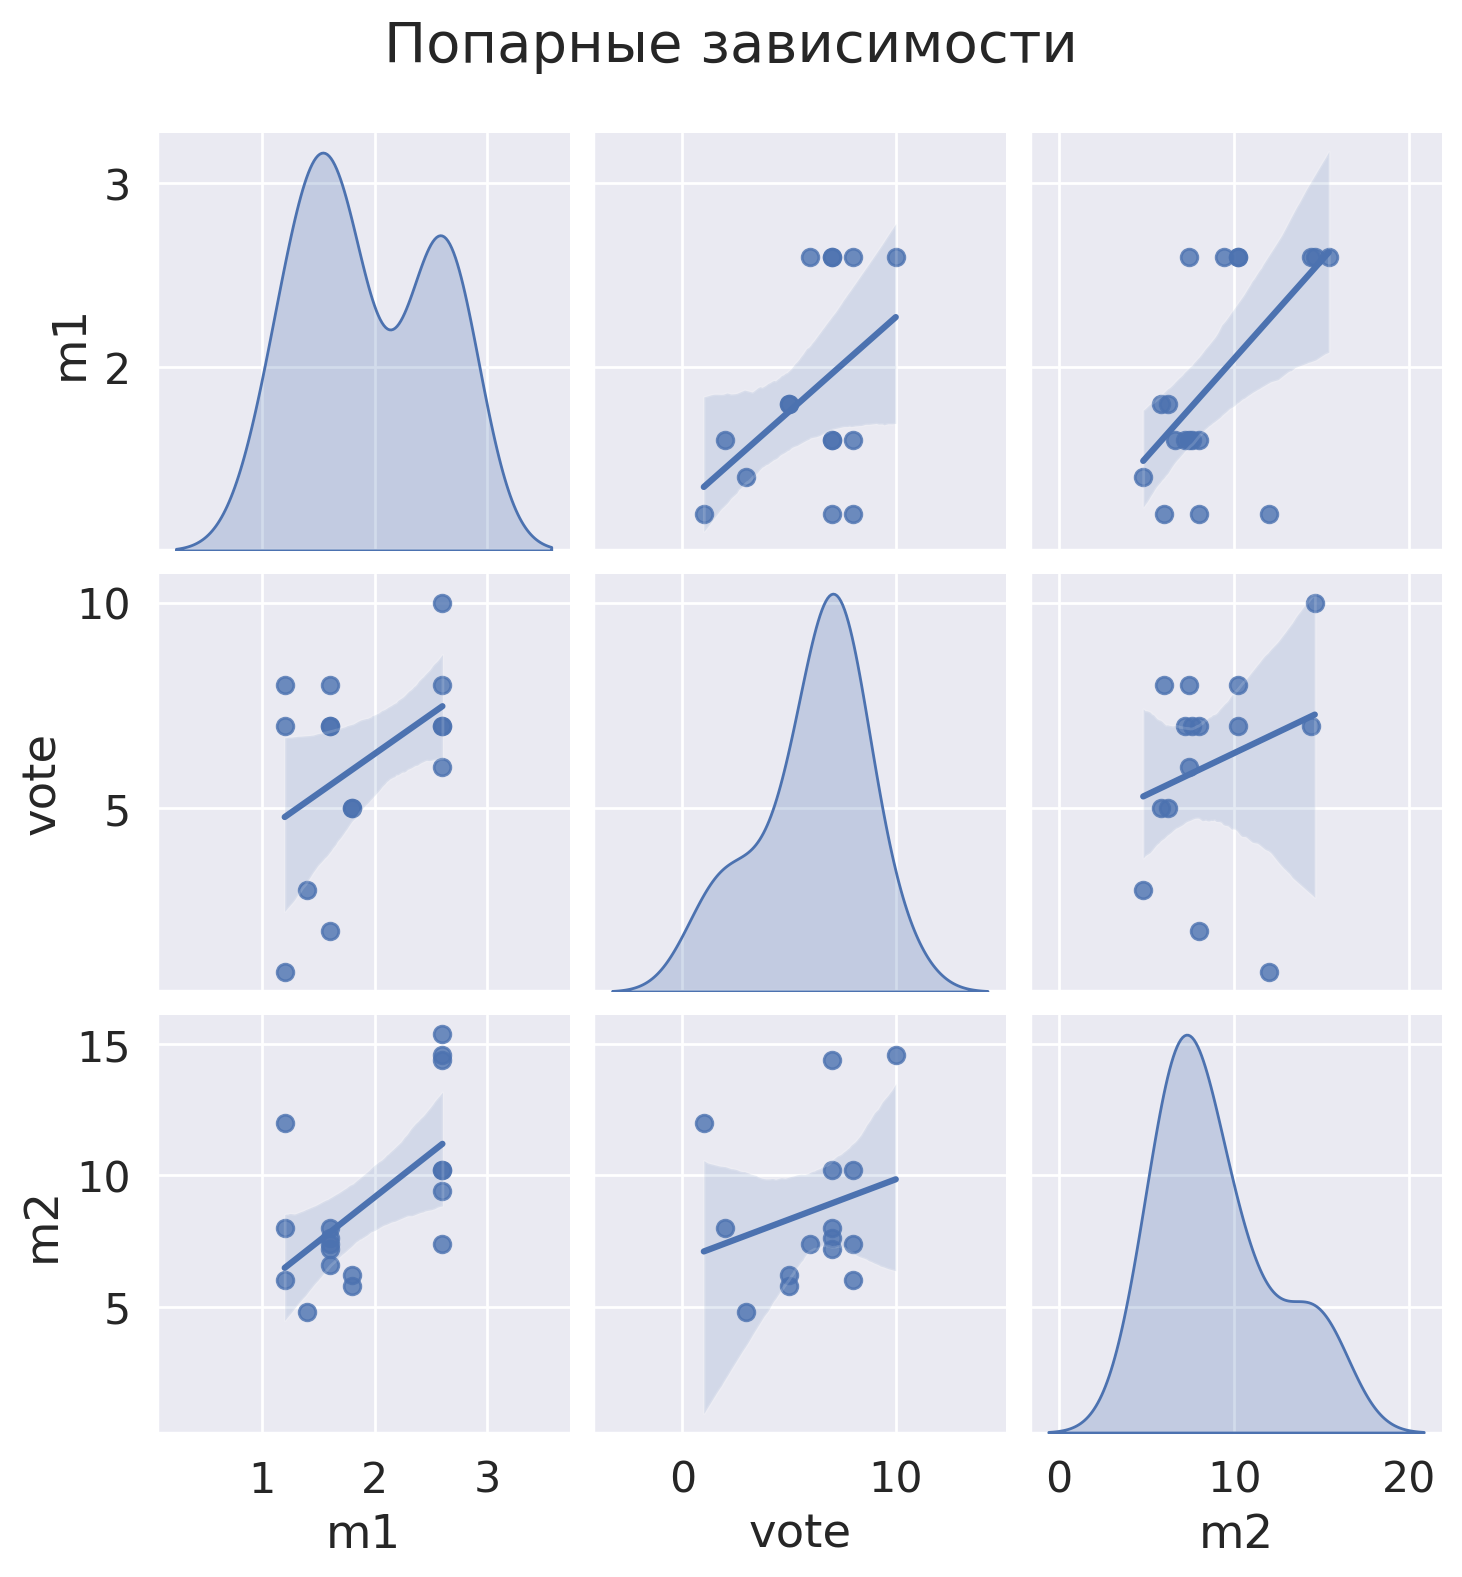

In [171]:
df_raw = pd.DataFrame.from_dict(group, orient="index", columns=["m1","vote","m2"]).reset_index(drop=True)
df_raw = df_raw.replace(-1, np.nan)

pairs = [("m1","vote"), ("m2","vote"), ("m1","m2")]

sns.pairplot(df_raw, vars=["m1", "vote", "m2"], kind="reg", diag_kind="kde")
plt.suptitle("Попарные зависимости", y = 1.05)
plt.show()

Реализуйте *самостоятельно* функцию, подсчитывающую коэффициент корреляции Спирмена, и примените его для каждой пары выборок.

*N.B.* В выборках могут встречаться повторяющиеся значения, которые не позволяют их однозначно отранжировать. В таких случаях прибегают к так называемым *средним рангам*: если отсортированные наблюдения на позициях от $n$ до $m$ одинаковы, то их ранги заменяются на среднее, то есть $\frac{n+m}{2}$. Например, выборке $(6, 10, 3, 6, 7)$ соответствуют ранги $(2.5, 5, 1, 2.5, 4)$.

In [172]:
def spi(df, col1_n, col2_n):
    df_tmp = df[[col1_n, col2_n]].dropna()
    n = df_tmp.shape[0]
    return 1 - 6 / (n ** 3 - n) * np.sum((sps.rankdata(df_tmp[col1_n].to_numpy(), method="average") - sps.rankdata(df_tmp[col2_n].to_numpy(), method="average")) ** 2)


m1_bins = [-np.inf, 1.8,  np.inf]
vote_bins= [0, 5, 10]
m2_bins = [0, 9, 17]

df_cat = pd.DataFrame({
    "m1" : pd.cut(df_raw["m1"], bins=m1_bins, right=True, include_lowest=True),
    "vote": pd.cut(df_raw["vote"], bins=vote_bins,right=True, include_lowest=True),
    "m2" : pd.cut(df_raw["m2"], bins=m2_bins, right=True, include_lowest=True),
})

print("m1 vc vote: " + str(spi(df_cat, "m1", "vote"))) # тут я уже что-то забил на тернарники и красивости. Расстроился, что много времени потратил на первое задание
print("m2 vc vote: " + str(spi(df_cat, "m2", "vote")))
print("m1 vc m2: " + str(spi(df_cat, "m1", "m2")))

print(df_raw[["m1","vote","m2"]].corr(method="spearman")) # а это чисто сравниться

m1 vc vote: 0.6651785714285714
m2 vc vote: 0.4642857142857143
m1 vc m2: 0.8328173374613004
            m1      vote        m2
m1    1.000000  0.279258  0.492345
vote  0.279258  1.000000  0.260126
m2    0.492345  0.260126  1.000000


Необходимо подтвердить наличие зависимости между парами выборок. Сформулируйте гипотезу о независимости на основании коэффициента корреляции выше и проверьте её на уровне значимости $\alpha$.

*Замечание.* Так как размер выборки у нас мал, рекомендуется взять исправленную версию коэффициента Спирмена. Его вид и асимптотическое поведение можно узнать в разделе 13.2 методички. Обратите внимание на вид квантилей.

<font color="#ae69c9ff">

Критерий уровня значимости $\alpha$ будет выглядеть так: отвергать гипотезу независимости $H_0$, если $\hat{\rho}_S \notin \bigl( z_{\alpha/2}, \ z_{1-\alpha/2} \bigr)$, где 
$z_{\gamma} = \tfrac{1}{2}\bigl(x_{\gamma} + y_{\gamma}\bigr), x_{\gamma} = \gamma$ - квантиль $N(0,1)$, а $y_{\gamma} - \gamma$ - квантиль распределения Стьюдента с n-2 степенями свободы, а ро с крышкой - исправленная версия коэффициента Спирмена

In [173]:
def spi_up_test(df, col1_n, col2_n):
    df_tmp = df[[col1_n, col2_n]].dropna()
    n = df_tmp.shape[0]
    
    p = 1 - 6 / (n ** 3 - n) * np.sum((sps.rankdata(df_tmp[col1_n].to_numpy(), method="average") - sps.rankdata(df_tmp[col2_n].to_numpy(), method="average")) ** 2)
    p_up = 1 / 2 * p * (((n - 1) ** 0.5) + ((n - 2) / (1 - p ** 2)) ** 0.5)
    
    N = 10000
    z_gamma = lambda gamma: 1 / 2 * (np.sort(sps.norm(0, 1).rvs(N))[int(N*gamma)] + np.sort((student_single_rvs(n - 2, N)))[int(N*gamma)])
    
    return z_gamma(ALPHA / 2) < p_up < z_gamma(1-ALPHA / 2)


print("Гипотеза независимости оценки за кр и голоса в опросе " + ("отвергается" if spi_up_test(df_cat, "m1", "vote") else "не отвергается"))
print("Гипотеза независимости оценки спустя 2 недели и голоса в опросе " + ("отвергается" if spi_up_test(df_cat, "m2", "vote") else "не отвергается"))
print("Гипотеза независимости оценки за кр и спустя 2 недели " + ("отвергается" if spi_up_test(df_cat, "m1", "m2") else "не отвергается"))

Гипотеза независимости оценки за кр и голоса в опросе не отвергается
Гипотеза независимости оценки спустя 2 недели и голоса в опросе отвергается
Гипотеза независимости оценки за кр и спустя 2 недели не отвергается


<font color="#ae69c9ff">

Ну, собственно, победа. Результаты совпали с предыдущими, что есть хорошо

UPD: не совпали, вообще странный результат. По идее, 3 пункт прям не надо отвергать

Что же насчёт коэффициента Пирсона? Его распределение сильно завязано на нормальности выборок, хотя распределение данных может быть совсем другим. В таком случае на помощь как всегда приходит бутстреп. С его помощью можно построить доверительный интервал для коэффициента корреляции (в рамках задачи давайте возьмём перцентильный ДИ), на основании которого строится сам критерий -- легко и просто. Однако стоит обратить внимание на пару нюансов:
1. Интервал строится в предположении, что данные приходят **из нулевой гипотезы**. Поймите, как правильно бутстрепить выборки, чтобы данное предположение выполнялось.
2. До этого критерии, построенные по ДИ, проверяли попадание в него предполагаемого значения параметра. Попадание чего мы будем проверять теперь, когда из обычного мира перешли в бутстрепный?
3. Мало построить критерий, важно ещё научиться считать pvalue. В данном случае полезно будет использовать общее определение pvalue:
$$
\mathrm{pvalue}(\mathbf x) = \inf\{\alpha\colon \mathbf x \in R_{\alpha}\}, \;\;\; \text{$R_{\alpha}$ --- критерий ур. зн. $\alpha$}.
$$
Подумайте, как выглядят ДИ (а стало быть и как выглядят критерии) для разных значений уровня значимости и как найти то пороговое значение $\alpha$, при котором отвержение переходит в неотвержение.

Итого:

- Опишите ваши мысли и реализуйте полученный критерий (можно обернуть его в функцию)
- Перед тем, как применять критерий к реальным данным, надо проверить, а адекватен ли он? Мы знаем из лекций, что pvalue должно быть распределено равномерно при верности нулевой гипотезы --- давайте убедимся на синтетических данных, что так оно и есть. Для этого промоделируйте распределение pvalue на сгенерированных парах выборок (размер выборок возьмите порядка размера группы, например, 20; распределение выборок выберете на конечном носителе, на свой вкус). Проверьте, что визуально pvalue действительно распределено равномерно, а уровень значимости контролируется.
- Примените критерий для каждой из пары выборок выше. Поменялись ли от этого результаты?

<font color="#ae69c9ff">

Блин... Мне прям не понравилось, пощсле задания пойду напишу отзыв в форму. Не нравится следующее: когда читаешь первый раз это всё выглядит, как очень красивый набор слов, не имеющих ничего общего между собой. Вроде это не только моя проблема, многие знакомые столкнулись с тем же. Короче я уговорил гпт, разболтал умных людей и теперь стало понятно (как мне кажется), что от меня хотят и как это сделать.\
В принципе, буквально каждое задание прака у меня начиналось с того, что я шёл и читал методичку Андрея, после долго втыкал пустой ipynb. Этой же темы/метода в книге не было -> приплыли.\
Короче, пожалание/просьба: пожалуйста, оставляйте ссылки на описание этих методов хотябы где-то (или хотя бы на лекции разберите это, пожалуйста.), ибо ну прям вообще не вайб тратить ~4-5 часов, чтобы понять, что хотел автор.\
Что примечательно, после того, как прям осознаёшь происходящее, проникаешщься статати описание тз выглядит достаточным, но имхо это не только критерий хорошо составленного задания, но и явный признак того, что ~~мне не место на Физтехе~~ задание составлено чрезмерно сложно и пропущено слишком много вещей

<font color="#ae69c9ff">

Так вот, че делаем то:
1. Ну, для начала нужен ДИ. _Ну просто вот естественно желание любого человека._ Его мы построим так: бутстрепим выборки по немного элементов, скармливаем статистике Пирсона, на выходе получаем какое-то распределение, победа! С него уже тривиально получить ДИ
2. Дальше мы как-то хотим получить мистическиого зверя: p-value. Есть 2 ~~стула~~ способа: в первом случае мы будем подбирать $\alpha$, чтобы статистика попадала в ДИ уровня $1-\alpha$; во втором - набутстрепим оч оч много выборок и посчитаем отношение тех, на которых статистика Пирсон больше, чем на исходной. Как будто бы способы эквивалентны.

Я имел неосторожность прийти в лс к Андрею Куссеву с вопросом: "что строить?", что явно намекает на отсутствие у меня понимания, что нужно строить, ~~как и инстинкта самосохранения~~. Он же предложил мне провести эксперимент (спасибо, так-то!! правда круто)

**Описание применения критерия и подсчёта pvalue:**

In [147]:
def true_pearson(X, Y):
    return np.sum((X - X.mean(axis=0)) * (Y - Y.mean(axis=0)), axis=0) / np.sqrt(np.sum((X - X.mean(axis=0)) ** 2, axis=0) * np.sum((Y - Y.mean(axis=0)) ** 2, axis=0))


def sampl_pearson(X, Y, N_sampl):
    N_buc = X.shape[0]
    X, Y = np.random.choice(X, size=(N_buc, N_sampl)), np.random.choice(Y, size=(N_buc, N_sampl))
    # вот, собственно, вопрос: как мне нужно бутстрепить параметры, чтобы добиться независимости? Типо x фиксируем, а y - выбираем или выбираем оба? Как будто бы второе
    p = np.sum((X - X.mean(axis=0)) * (Y - Y.mean(axis=0)), axis=0) / np.sqrt(np.sum((X - X.mean(axis=0)) ** 2, axis=0) * np.sum((Y - Y.mean(axis=0)) ** 2, axis=0))
    return p


def pvalue(p, X, Y, N):
    pvalue_1 = -1
    for alpha in np.linspace(0, 0.99, N):
        a, b = np.percentile(sampl_pearson(X, Y, N), [100 * alpha / 2, 100 * (1 - alpha / 2)])
        # print(p, a, b)
        if a < p < b: pvalue_1 = alpha

    return pvalue_1, (np.sum(np.abs(sampl_pearson(X, Y, N)) > abs(p)) + 1) / (N + 1)


def as_ranks(df, col_x, col_y):
    df_tmp = df[[col_x, col_y]].dropna()
    return sps.rankdata(df_tmp[col_x].cat.codes.to_numpy(), method="average"), sps.rankdata(df_tmp[col_y].cat.codes.to_numpy(), method="average")

/tmp/ipykernel_692589/3855752378.py:9: RuntimeWarning: invalid value encountered in divide
  p = np.sum((X - X.mean(axis=0)) * (Y - Y.mean(axis=0)), axis=0) / np.sqrt(np.sum((X - X.mean(axis=0)) ** 2, axis=0) * np.sum((Y - Y.mean(axis=0)) ** 2, axis=0))


Доверительный интервал уровня $1-\alpha$ для р.р. выборки: [nan nan]


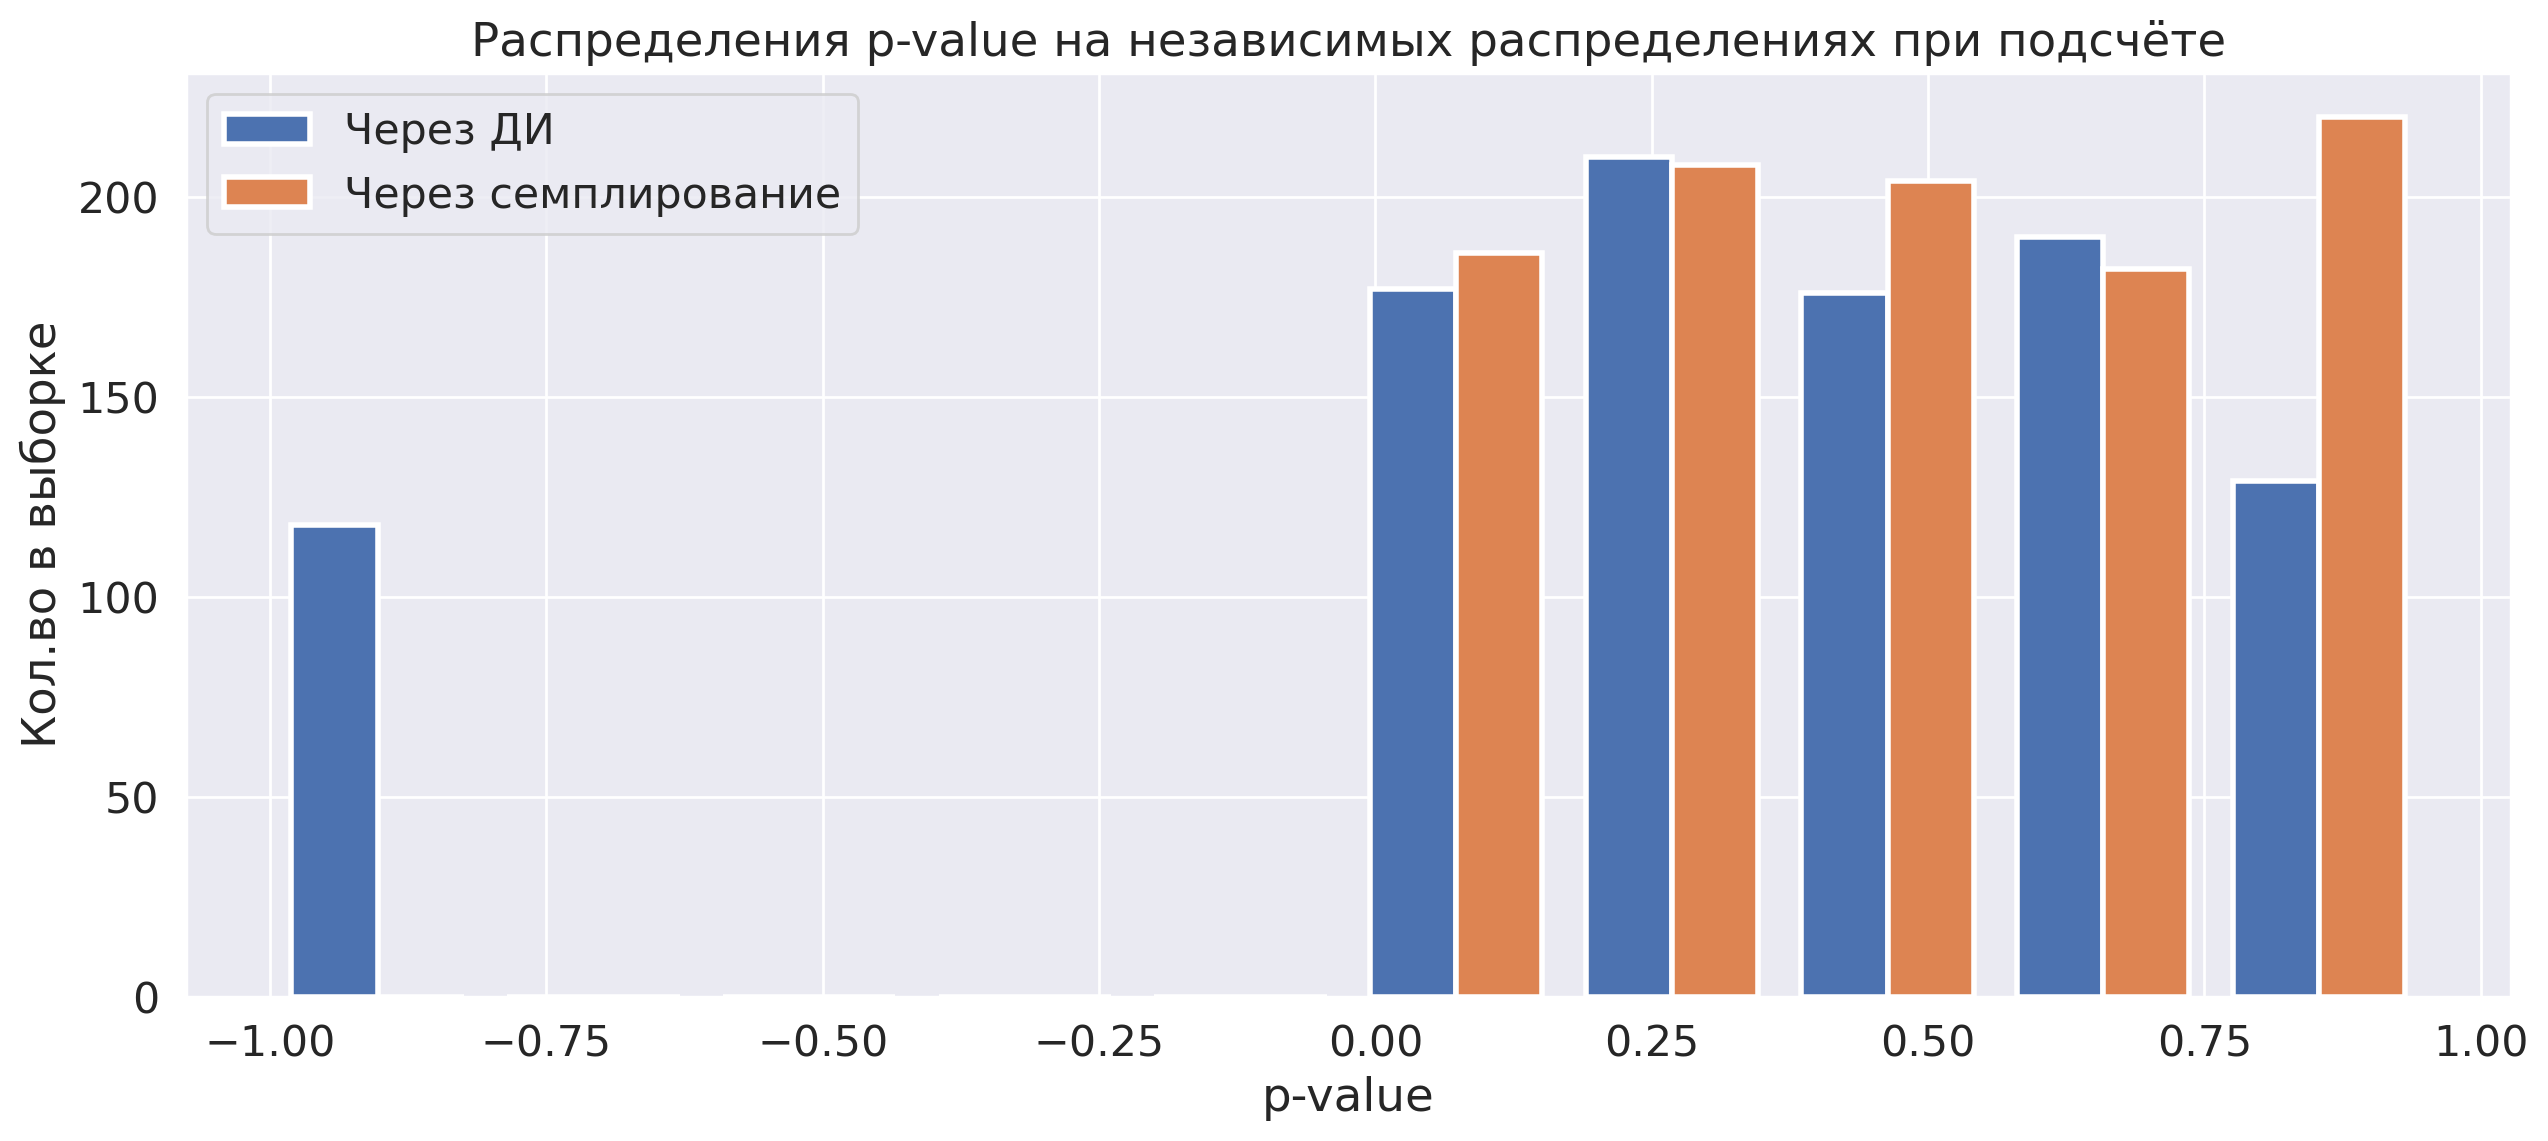

In [ ]:
col1_n, col2_n = "m1", "vote"
df_tmp = df_cat[[col1_n, col2_n]].dropna()
X, Y = as_ranks(df_tmp, col1_n, col2_n)
# X, Y = df_tmp[col1_n].to_numpy(), df_tmp[col2_n].to_numpy() # проверяющему предлагается сократить N на порядок/2 (мало что поменяется) и прогнать вот так. В этом случае будут валидны выводы до UPD3
print(r"Доверительный интервал уровня $1-\alpha$ для р.р. выборки: " + str(np.percentile(sampl_pearson(X, Y, 1000), [100 * ALPHA / 2, 100 * (1 - ALPHA / 2)])))

N = 1000
plt.figure(figsize=(15,6))
plt.hist(np.array([pvalue(p_tmp, X, Y, N) for p_tmp in sampl_pearson(X, Y, N)]), lw=2, label=["Через ДИ", "Через семплирование"])
plt.title(r"Распределения p-value на независимых распределениях при подсчёте"); plt.xlabel("p-value"); plt.ylabel("Кол.во в выборке"); plt.legend(loc="best"); plt.grid(True)

<font color="#ae69c9ff">

Нахожу нужным прокомментировать полученные данны:
- Не очень хорошо, что в финале проверяли построение только на 2 колонках из 3, но я протыкал руками и на остальных результаты +-идентичны
- Плохо, грустно и печально, что заметен явный пик в распределении p-value, построенном первым методом (через ДИ). Могу предположить, что беда из-за того, что считаем по сетке, но че-то как будто бы дело в чём-то другом (более сильной причины я не придумал(()
- Радостно, здорово и замечательно, что второй способ дал оожидаемое распределение -> есть больше уверенности, что подсчёт корректен
- Пик на -1 я говорит, что мы не нашли такого aplha; предположу, что это из-за случайной природы данных 

UPD1: ЙООООУ!!! На большой выборке (не был уверен, что она будет работать меньше часа) всё прям вообще очень хорошо. И пик в 1 меньше -> распределение много больше похоже на равномерное, и в -1 пика нет

UPD2: Надо бы уточнить, что во время выполнения я смотрел [вот сюда](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%9F%D0%B8%D1%80%D1%81%D0%BE%D0%BD%D0%B0). Я не уверен, что было корректно считать коэф. Пирсона по исходным данным, но, как будто бы, это роазумное решение. Разуменое, т.к. благодаря бутстрепу данных "становится" очень много -> есть возможность сохранить как можно больше информации об исходном рапсределении

UPD3: В первый раз я сделал всё это счастье, пропустил этап категоризации, что, по идее, считается неправильным (хотя не уверен. Есть мысль, что при бутстреме всё равно набирается >5 для каждой "категории" -> победа). подсчёт через сэмплирование нахожу замечатлеьным, к нему вопросов нет, а вот через ДИ часто стал давать некорректные данные (т.е. -1). Предположу, что это из-за явно крупного размера бакетов, на которые я бил выборку. 

In [ ]:
res = []
for pair in [["m1", "vote"], ["m2", "vote"], ["m1", "m2"]]:
    df_tmp = df_cat[[col1_n, col2_n]].dropna()
    X, Y = as_ranks(df_tmp, col1_n, col2_n)
    # X, Y = df_tmp[col1_n].to_numpy(), df_tmp[col2_n].to_numpy()
    p = true_pearson(X, Y)
    res.append(pvalue(p, X, Y, N))

print("Способ построения p-value через ДИ:")
print("Гипотеза независимости оценки за кр и голоса в опросе " + ("отвергается" if res[0][0] < ALPHA else "не отвергается"))
print("Гипотеза независимости оценки спустя 2 недели и голоса в опросе " + ("отвергается" if res[1][0] < ALPHA else "не отвергается"))
print("Гипотеза независимости оценки за кр и спустя 2 недели " + ("отвергается" if res[2][0] < ALPHA else "не отвергается"))

print()
print("Способ построения p-value через семплирование:")
print("Гипотеза независимости оценки за кр и голоса в опросе " + ("отвергается" if res[0][1] < ALPHA else "не отвергается"))
print("Гипотеза независимости оценки спустя 2 недели и голоса в опросе " + ("отвергается" if res[1][1] < ALPHA else "не отвергается"))
print("Гипотеза независимости оценки за кр и спустя 2 недели " + ("отвергается" if res[2][1] < ALPHA else "не отвергается"))

/tmp/ipykernel_692589/3855752378.py:9: RuntimeWarning: invalid value encountered in divide
  p = np.sum((X - X.mean(axis=0)) * (Y - Y.mean(axis=0)), axis=0) / np.sqrt(np.sum((X - X.mean(axis=0)) ** 2, axis=0) * np.sum((Y - Y.mean(axis=0)) ** 2, axis=0))
/tmp/ipykernel_692589/3855752378.py:9: RuntimeWarning: invalid value encountered in divide
  p = np.sum((X - X.mean(axis=0)) * (Y - Y.mean(axis=0)), axis=0) / np.sqrt(np.sum((X - X.mean(axis=0)) ** 2, axis=0) * np.sum((Y - Y.mean(axis=0)) ** 2, axis=0))
/tmp/ipykernel_692589/3855752378.py:9: RuntimeWarning: invalid value encountered in divide
  p = np.sum((X - X.mean(axis=0)) * (Y - Y.mean(axis=0)), axis=0) / np.sqrt(np.sum((X - X.mean(axis=0)) ** 2, axis=0) * np.sum((Y - Y.mean(axis=0)) ** 2, axis=0))


Способ построения p-value через ДИ:
Гипотеза независимости оценки за кр и голоса в опросе отвергается
Гипотеза независимости оценки спустя 2 недели и голоса в опросе отвергается
Гипотеза независимости оценки за кр и спустя 2 недели отвергается

Способ построения p-value через семплирование:
Гипотеза независимости оценки за кр и голоса в опросе не отвергается
Гипотеза независимости оценки спустя 2 недели и голоса в опросе отвергается
Гипотеза независимости оценки за кр и спустя 2 недели отвергается


Сделайте вывод о том, какие есть зависимости в данных на естественном языке:

**Вывод:** 

<font color="#ae69c9ff">

УРАААА, НИЧЕ НЕ СЛОМАЛОСЬ!!1 (извините)

Данные былим проведены через 3 различных критерия, все они показали идентичный рузультат (это ничего не говорит о силе криотериев, ибо выборка одна и мала, а ещё мы не знаем истинного результата). Новых выводов не будет (ибо отличных от предыдущих резльтатов нет), всё уже дважды описано ранее

UPD: Сломалось, сломалось. 
1. Считаю значимыми только результаты, полученные через семплирование, ибо пик на -1 может сильно смещать итог
2. Выявилась новая зависимость - результат спустя 2 недели и голоса в опросе. Могу предположить, что настрой студента сильно влияет на его результаты спустя время

<font color='red'>

2.2 формула для коэффициента корреляции через 1 - 6 / ... верна только если все числа во входных выборках различны (-1)

<font color='red'>

2. 14/15

## Задача 3. T-критерий Стьюдента

*Первые три пункта стоят по 5 баллов, последний, бонусный, --- 10 баллов.*

Распространённой задачей статистики является обнаружение эффекта: есть две (или более, но пока мы рассмотрим случай с двумя) выборки, правда ли, что их средние отличаются? Классическим критерием для проверки такой гипотезы является *t-критерий*. Напомним, как он выводится.

Пусть $X_1, \ldots, X_n \sim \mathcal{N}(\mu_1, \sigma^2)$ и $Y_1, \ldots, Y_m \sim \mathcal{N}(\mu_2, \sigma^2)$ --- две независимые выборки (обратите внимание, мы предполагаем, что их дисперсии равны, хоть мы её и не знаем). На семинаре мы убедились, что при верности нулевой гипотезы $H_0\colon \mu_1 = \mu_2$ справедливо
$$
T(\mathbf X, \mathbf Y) = \sqrt{\frac{nm}{n+m}} \cdot \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{(n-1)s^2(\mathbf X) + (m-1)s^2(\mathbf Y)}{n+m-2}}} \sim T_{n+m-2},
$$
где $T_k$ --- распределение Стьюдента с $k$ степенями свободы, $s^2(\mathbf X)$ и $s^2(\mathbf Y)$ --- *несмещённые* выборочные дисперсии. Отсюда мы получаем критерий Стьюдента вида $R_{\alpha} = \{(\mathbf x, \mathbf y)\colon |T(\mathbf x, \mathbf y)| > t_{n+m-2, 1-\alpha/2}\}$ уровня значимости $\alpha$ (здесь $t_{k,p}$ --- $p$-квантиль распределения $T_k$). Во всех пунктах, кроме первого, можно воспользоваться готовой реализацией [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

1. В общем случае, когда про распределение выборок мы ничего не знаем, а гипотезу о равенстве средних проверить хочется, применяют асимптотический *критерий Вальда*, основанный на асимпт. нормальной оценке разности средних:
$$
W(\mathbf X, \mathbf Y) = \frac{\overline{X} - \overline{Y}}{\sqrt{s^2(\mathbf X)/n + s^2(\mathbf Y)/m}} \stackrel{d}{\to} \mathcal{N}(0, 1).
$$

Универсальность -- вещь хорошая, но тут распределение статистики известно лишь в пределе, что может вредить ошибке I рода. Убедимся в этом, провалидируя критерии.

Насэмплируйте достаточно много (порядка 10000) пар нормальных выборок размера 50 из нулевой гипотезы.

In [73]:
N = 10000
SAMPLE_SIZE = 50

samples = sps.norm(17,10).rvs((N, SAMPLE_SIZE, 2))

print(samples.shape)
print(samples.mean(axis=1).shape)

(10000, 50, 2)
(10000, 2)


Посчитайте статистики критериев Вальда и Стьюдента для всех выборок вместе с соответствующими pvalue. В рамках этого пункта напишите оба критерия **сами** (в смысле вычисления значения статистик, функцию `cdf` вызывать можно).

*Замечание*. Так как критерий имеет вид $R_{\alpha} = \{\mathbf x\colon S(\mathbf x) > c_{\alpha}\}$, здесь больше подойдёт второе определение pvalue с лекций, а именно: вероятность того, что значение статистики критерия окажется более экстремальным, чем увиденное значение, при верности $H_0$,
$$
\mathrm{pvalue}(\mathbf x) = \mathsf{P}_{0}(S(\mathbf X) > S(\mathbf x)) = 1 - F_{S}(S(\mathbf x)),
$$
где $F_S$ --- функция распределения статистики $S(\mathbf X)$ (или его асимптотического распределения, если речь про асимпт. критерий) при верности $H_0$. В нашем случае --- это модуль $T_{n+m-2}$ или $\mathcal{N}(0, 1)$.


In [74]:
X = samples[:, :, 0]
Y = samples[:, :, 1]

T = (SAMPLE_SIZE * SAMPLE_SIZE / (SAMPLE_SIZE + SAMPLE_SIZE)) ** 0.5 * (np.mean(X, axis = 1) - np.mean(Y, axis=1)) / np.sqrt(
    ((SAMPLE_SIZE - 1) * np.var(X, ddof=1, axis=1) + (SAMPLE_SIZE - 1) * np.var(Y, ddof=1, axis=1)) / (SAMPLE_SIZE * 2 - 1))
W = (np.mean(X, axis = 1) - np.mean(Y, axis=1)) / np.sqrt(np.var(X, ddof=1, axis=1) / SAMPLE_SIZE + np.var(Y, ddof=1, axis=1) / SAMPLE_SIZE)

pvalue_T = 1 - sps.t(SAMPLE_SIZE * 2 - 2).cdf(T)
pvalue_W = 1 - sps.norm(0,1).cdf(W)

Для обоих критериев:
- Визуализируйте распределение pvalue. Что можно по ним сказать?

- Оцените вероятность ошибки I рода для критериев ур. зн. $\alpha = 0.05$. В названии графика укажите оценку этой вероятности и доверительный интервал для неё (для удобства ДИ можно посчитать методом [`statsmodels.stats.proportion.proportion_confint`](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html))

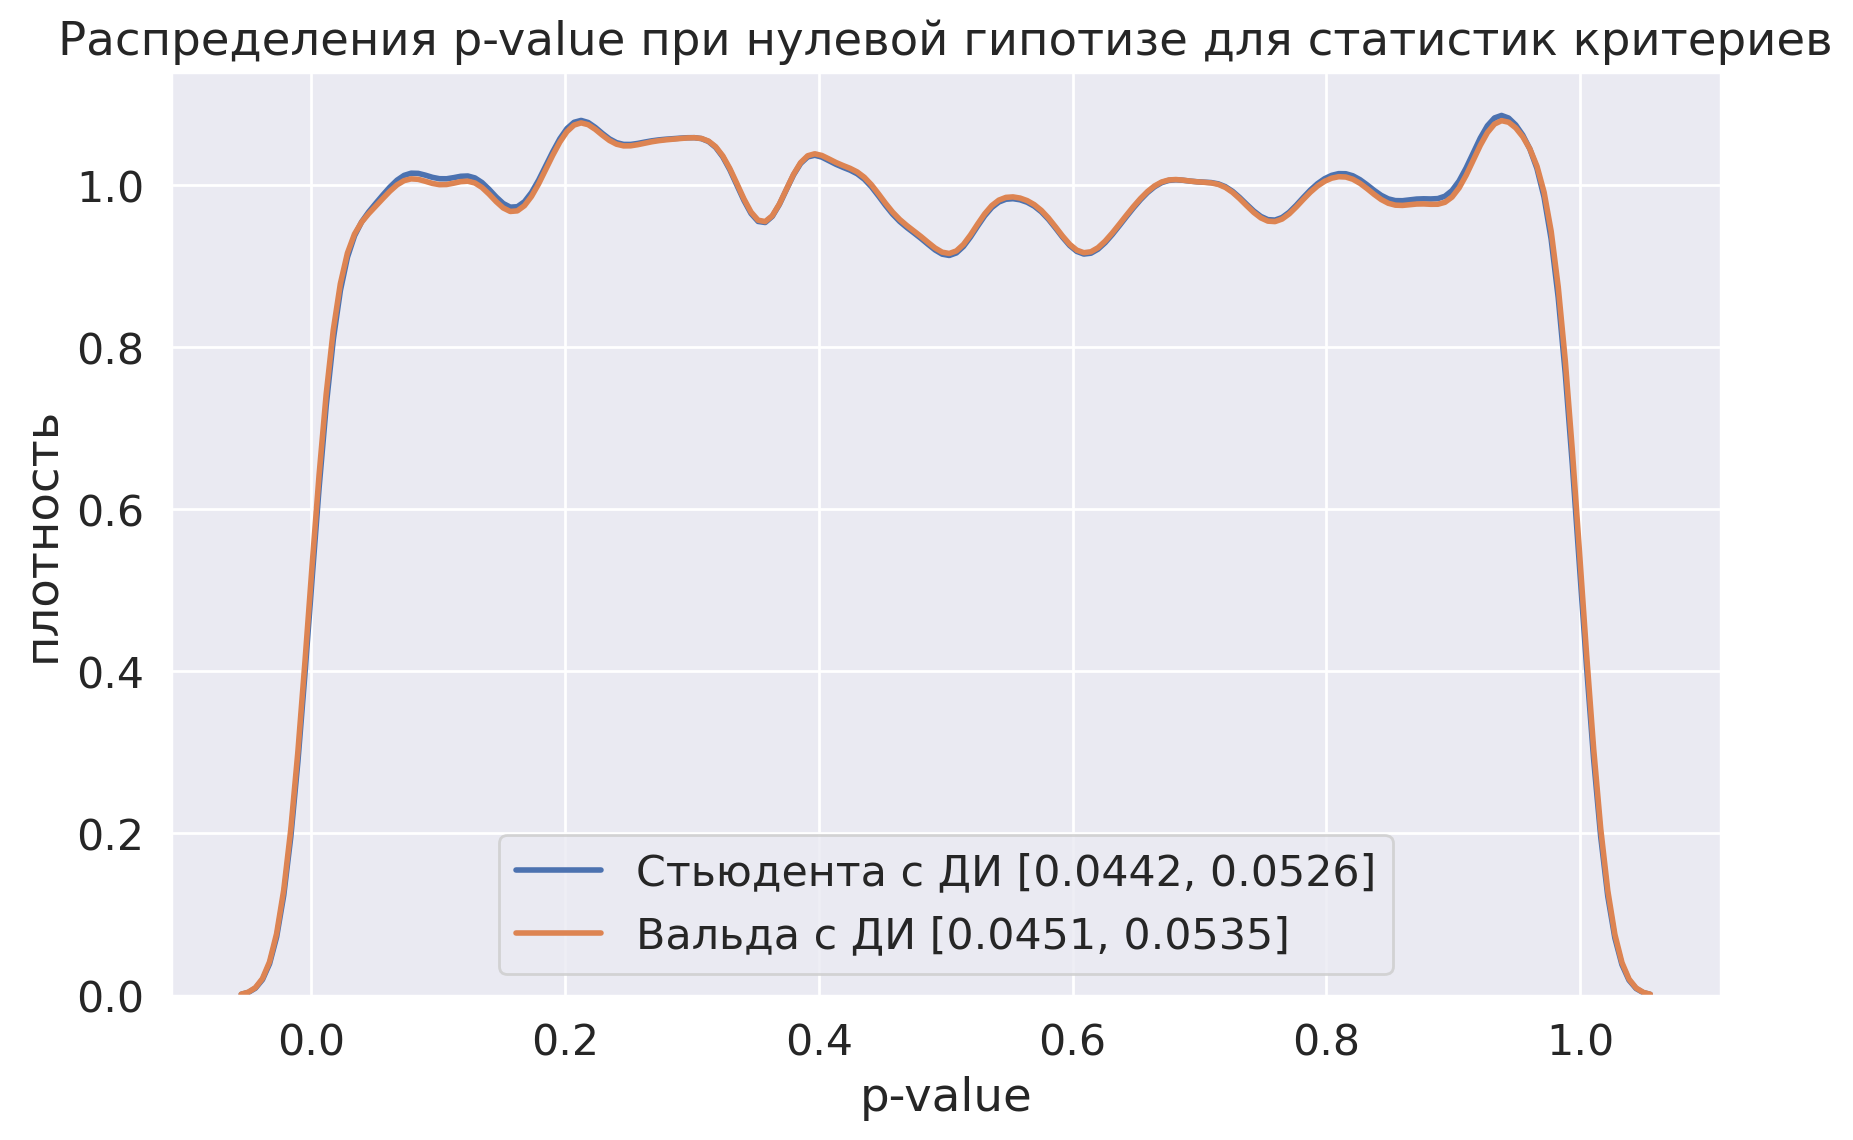

In [75]:
lT, rT = sts_prop.proportion_confint(np.sum(pvalue_T < ALPHA), N, ALPHA)
lW, rW = sts_prop.proportion_confint(np.sum(pvalue_W < ALPHA), N, ALPHA)

plt.figure(figsize=(10,6))
sns.kdeplot(pvalue_T, lw=2, label=f"Стьюдента с ДИ [{lT :0.4f}, {rT :0.4f}]", bw_adjust=0.4)
sns.kdeplot(pvalue_W, lw=2, label=f"Вальда с ДИ [{lW :0.4f}, {rW :0.4f}]", bw_adjust=0.4)
plt.title(r"Распределения p-value при нулевой гипотизе для статистик критериев"); plt.xlabel("p-value"); plt.ylabel(r"плотность"); plt.legend(loc="best"); plt.grid(True)
plt.show()

Сделайте выводы. Чем можно объяснить увиденное?

**Ответ:**

<font color="#ae69c9ff">

- Очень хочется порадобоваться и сказать, что критерии однаковой силы, но это будет ошибкой. Здесь видна только точность не отвержения нулевой гипотезы, что есть 0.95, что мы дополнительно проверили через ДИ
- Кривые почти в точности совпадают, это так-то удивительный результат; как я знаю, критерий Стьюдента - точный, а Ведбьа - асимптотический. И вот уже на выборке в 50 элементов они ведут себя почти одинаково, относительно нулевой гипотезы (прикольно!!)

<font color='red'>

3.1 не стоит строить kde для отображения равномерного распределения из-за его гладкости, стоит использовать гистограмму (-1)

2. Поговорим про требования к модели, которые использует критерий Стьюдента. Помимо, конечно, независимости выборок, важную роль играют нормальность и равенство дисперсий. Эти два требования довольно ограничительные, можно ли от них хотя бы частично отказаться? Начнём с первого.

Теперь давайте сэмплировать выборки не из нормального распределения, а из каких-то других. В качестве таковых возьмём:
- $\mathrm{T}_7$ (распределение Стьюдента с параметром 7) и $\mathrm{Laplace}$,
- $\mathrm{Exp}(1)$ и $\mathrm{Pareto}(10)$ (распределение Парето),
- $\mathrm{Beta}(3, 3)$ и $\mathcal{N}(0, 1)$,
- $\mathrm{Beta}(10, 0.1)$ и $\mathrm{U}[0; 1]$,
- Пятую и шестую пары распределений предлагается придумать самим (рекомендуем "на полях" проделать пункт для данных пар, найти закономерность и предложить в качестве пар что-то репрезентативное).

Насэмплируйте много (порядка 10000) пар выборок $(\mathbf X, \mathbf Y)$, каждая размера 30, где $\mathbf X$ будет иметь первое распределение из пары, а $\mathbf Y$ --- второе. Не забудьте, что мы находимся в рамках нулевой гипотезы (хоть и нормальности у нас нет), поэтому обязательно отнормируйте выборки так, чтобы у них были одинаковые *теоретические* среднее и дисперсия.

Рекомендуем не дублировать код, а обернуть всё в функцию и вызывать её несколько раз от взятых пар распределений.

<font color="#ae69c9ff">

У меня есть предположение, что я не понял, чего от мня хотят. Сначала под "нормированием" я подумал, что мне предлагают подогнать параметры. Спустя день друг сказал, что нужно вычитать из распределения его матожи... Ну, блин, звучит, как будто бы он прав. Что же, ща переделаю

In [76]:
def vis(X_rvs, Y_rvs, X_n, Y_n, SAMPLE_SIZE = 30, _do_you_realy_want_it = False): # Вот здесь я ставил от 10 до 1000. Чем меньше выборка, тем сильнее видны отличия
    N = 10000
    X, Y = X_rvs((N, SAMPLE_SIZE)), Y_rvs((N, SAMPLE_SIZE))

    if not _do_you_realy_want_it:
        X -= np.mean(X)
        Y -= np.mean(Y)

    T = (SAMPLE_SIZE * SAMPLE_SIZE / (SAMPLE_SIZE + SAMPLE_SIZE)) ** 0.5 * (np.mean(X, axis = 1) - np.mean(Y, axis=1)) / np.sqrt(
    ((SAMPLE_SIZE - 1) * np.var(X, ddof=1, axis=1) + (SAMPLE_SIZE - 1) * np.var(Y, ddof=1, axis=1)) / (SAMPLE_SIZE * 2 - 1))
    pvalue_T = 1 - sps.t(SAMPLE_SIZE * 2 - 2).cdf(T)
    
    # pvalue_T = sps.ttest_ind(X, Y, axis=1, equal_var=True).pvalue # проверял/баловался лишний раз

    lT, rT = sts_prop.proportion_confint(np.sum(pvalue_T < ALPHA), N, ALPHA)

    plt.figure(figsize=(10,6))
    sns.kdeplot(pvalue_T, lw=2, label=f"Стьюдента с ДИ [{lT :0.4f}, {rT :0.4f}]", bw_adjust=0.4)
    plt.title(fr"Распределения p-value при н.г. для с.к. для {X_n} и {Y_n}"); plt.xlabel("p-value"); plt.ylabel(r"плотность"); plt.legend(loc="best"); plt.grid(True)
    plt.show()

Визуализируйте распределение pvalue и постройте ДИ для ошибки I рода для каждого из шести случаев.

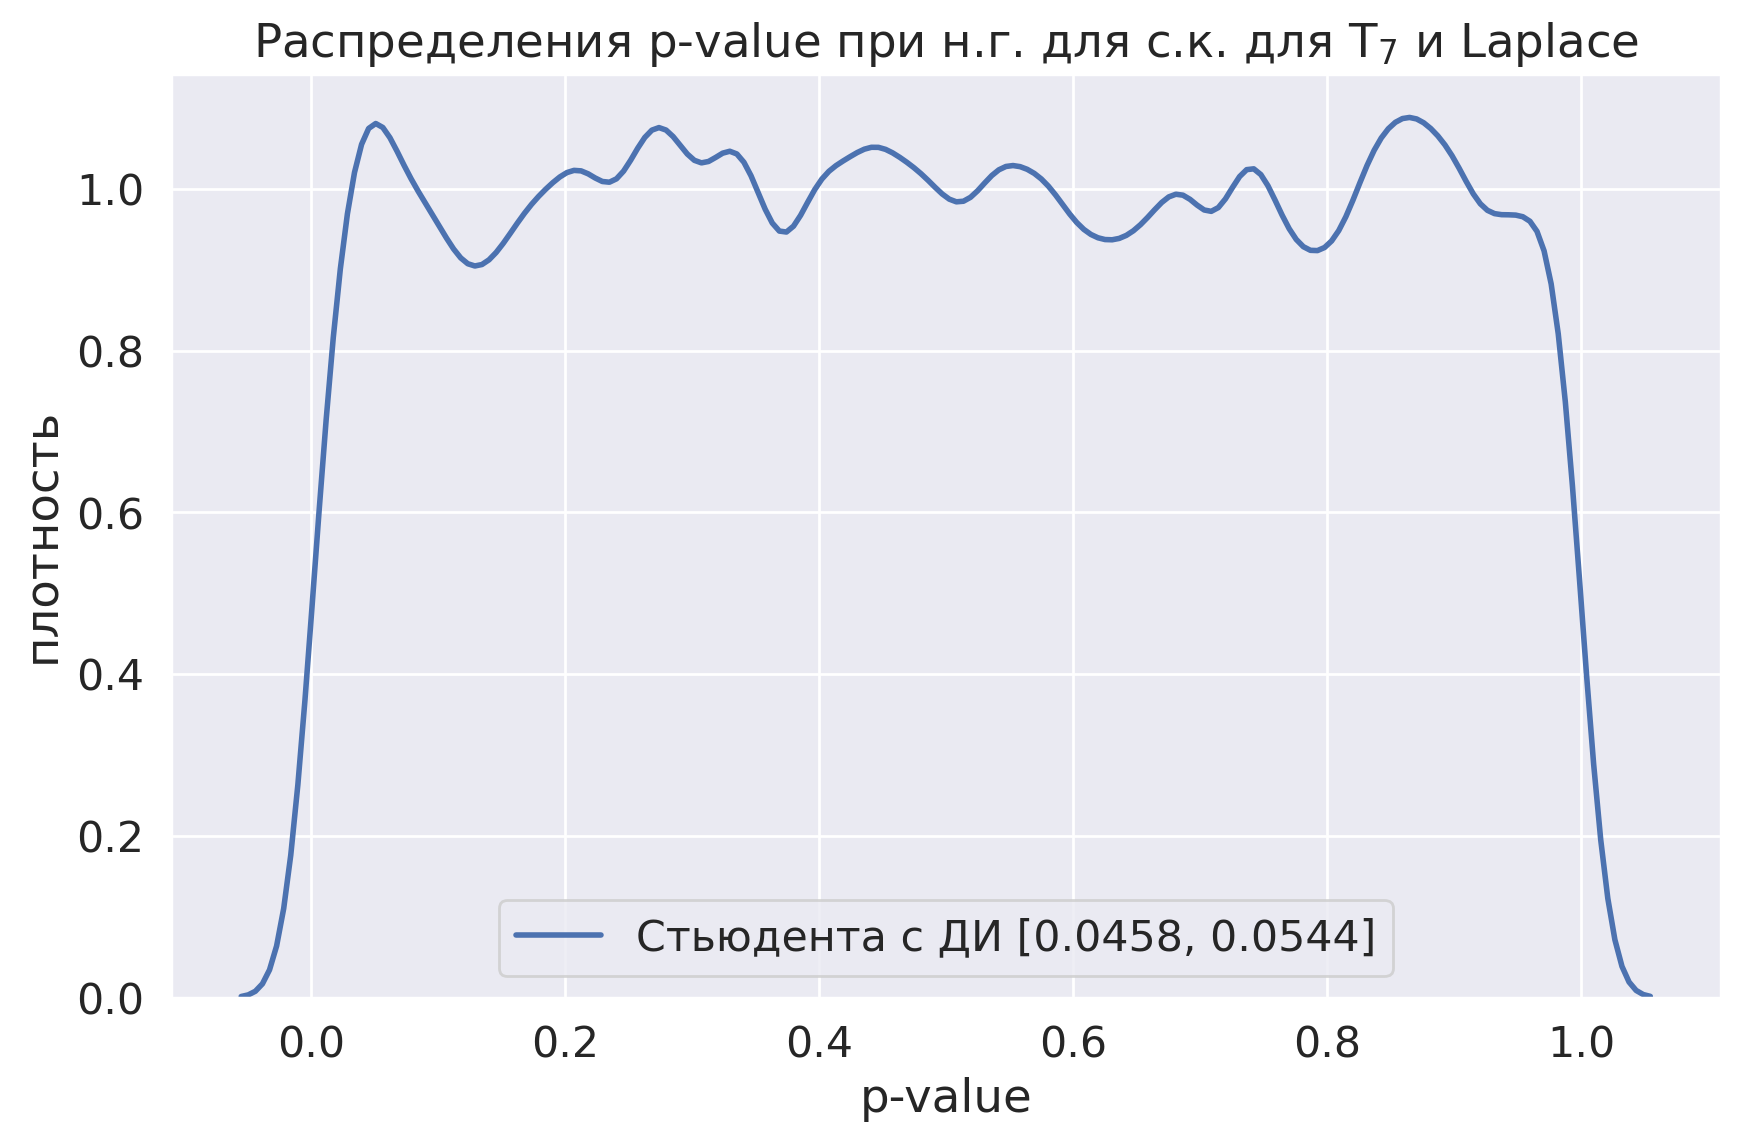

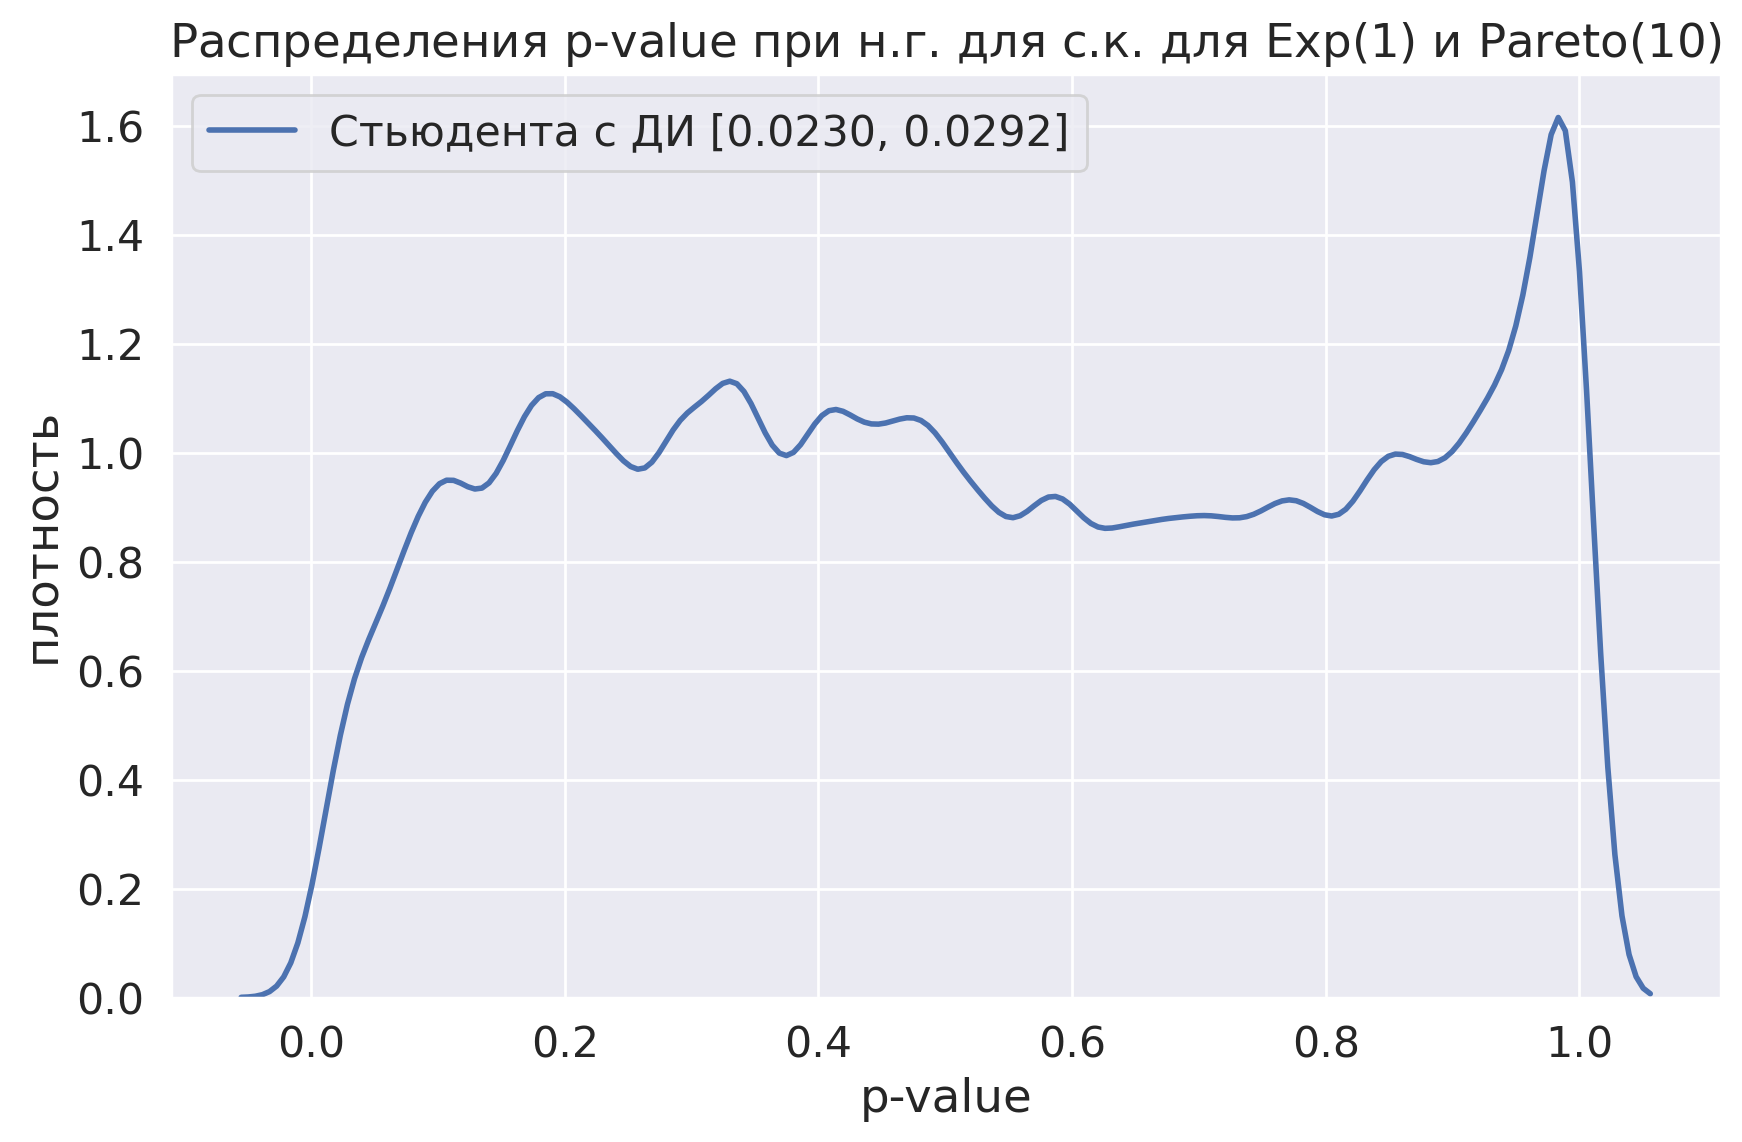

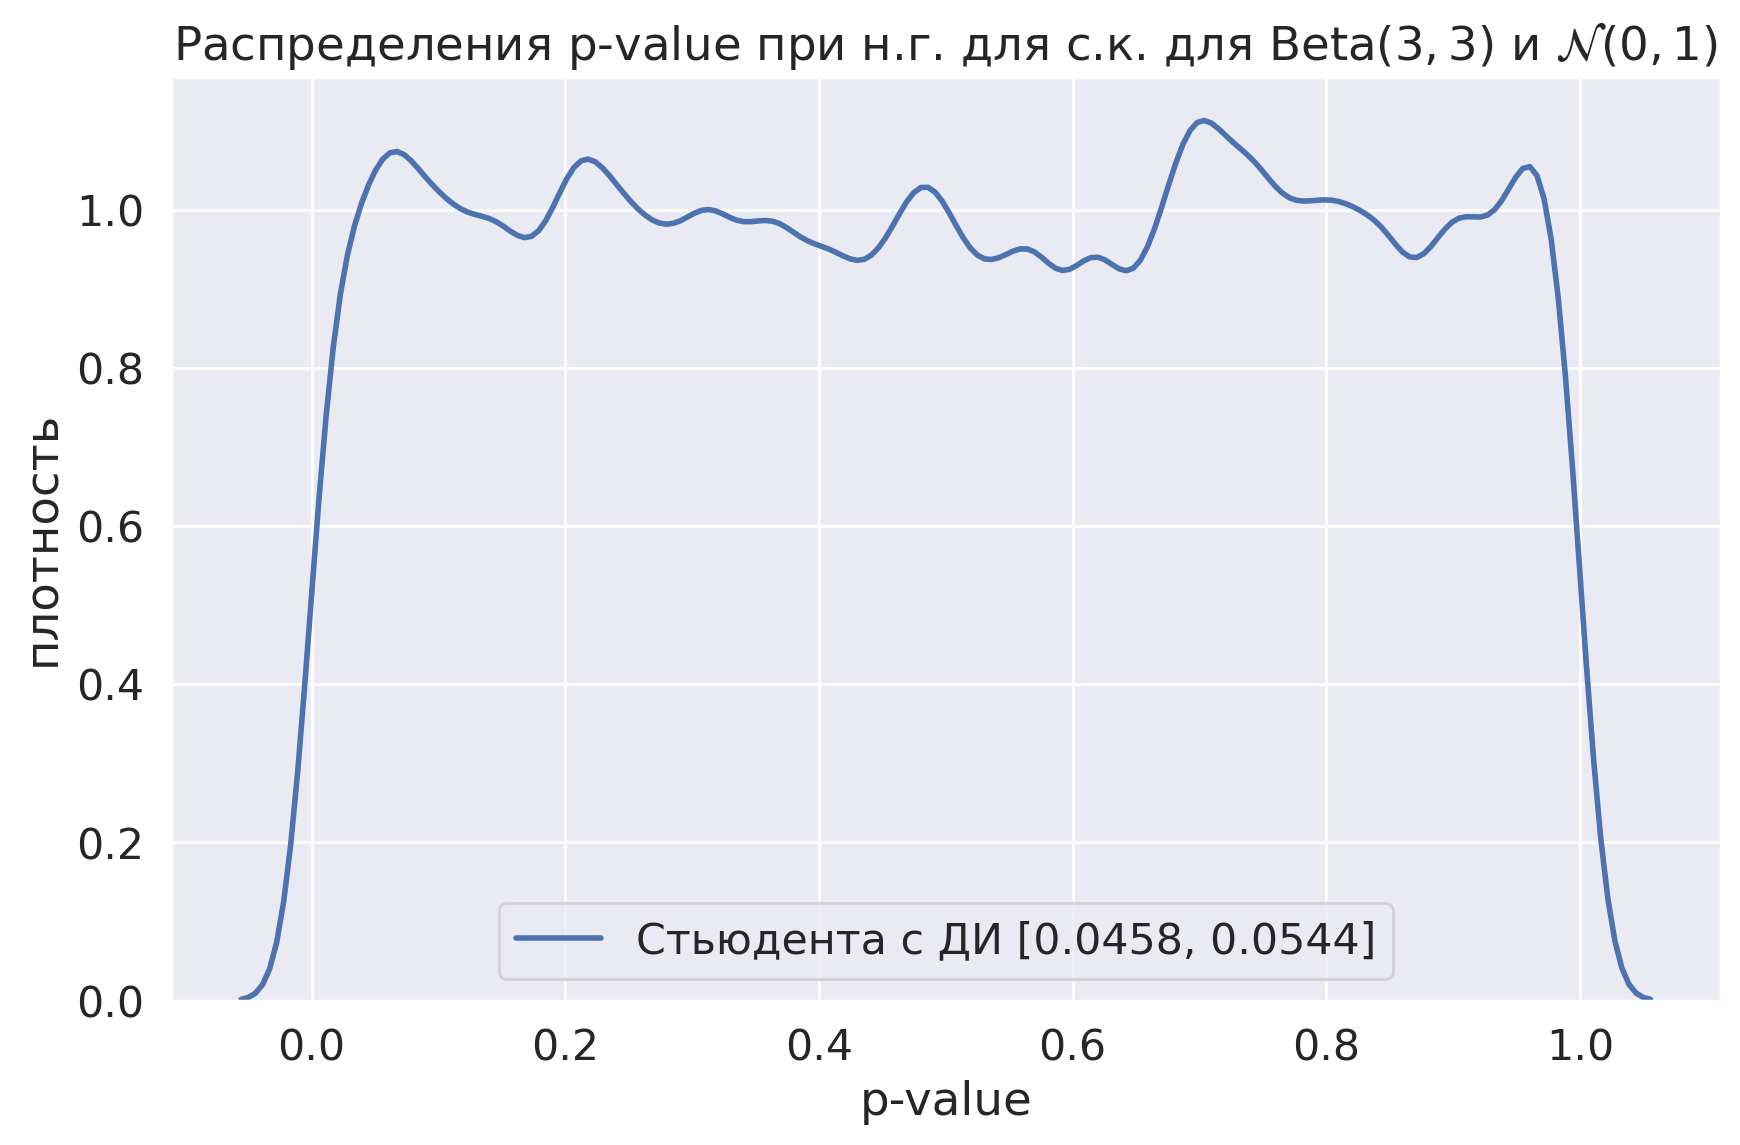

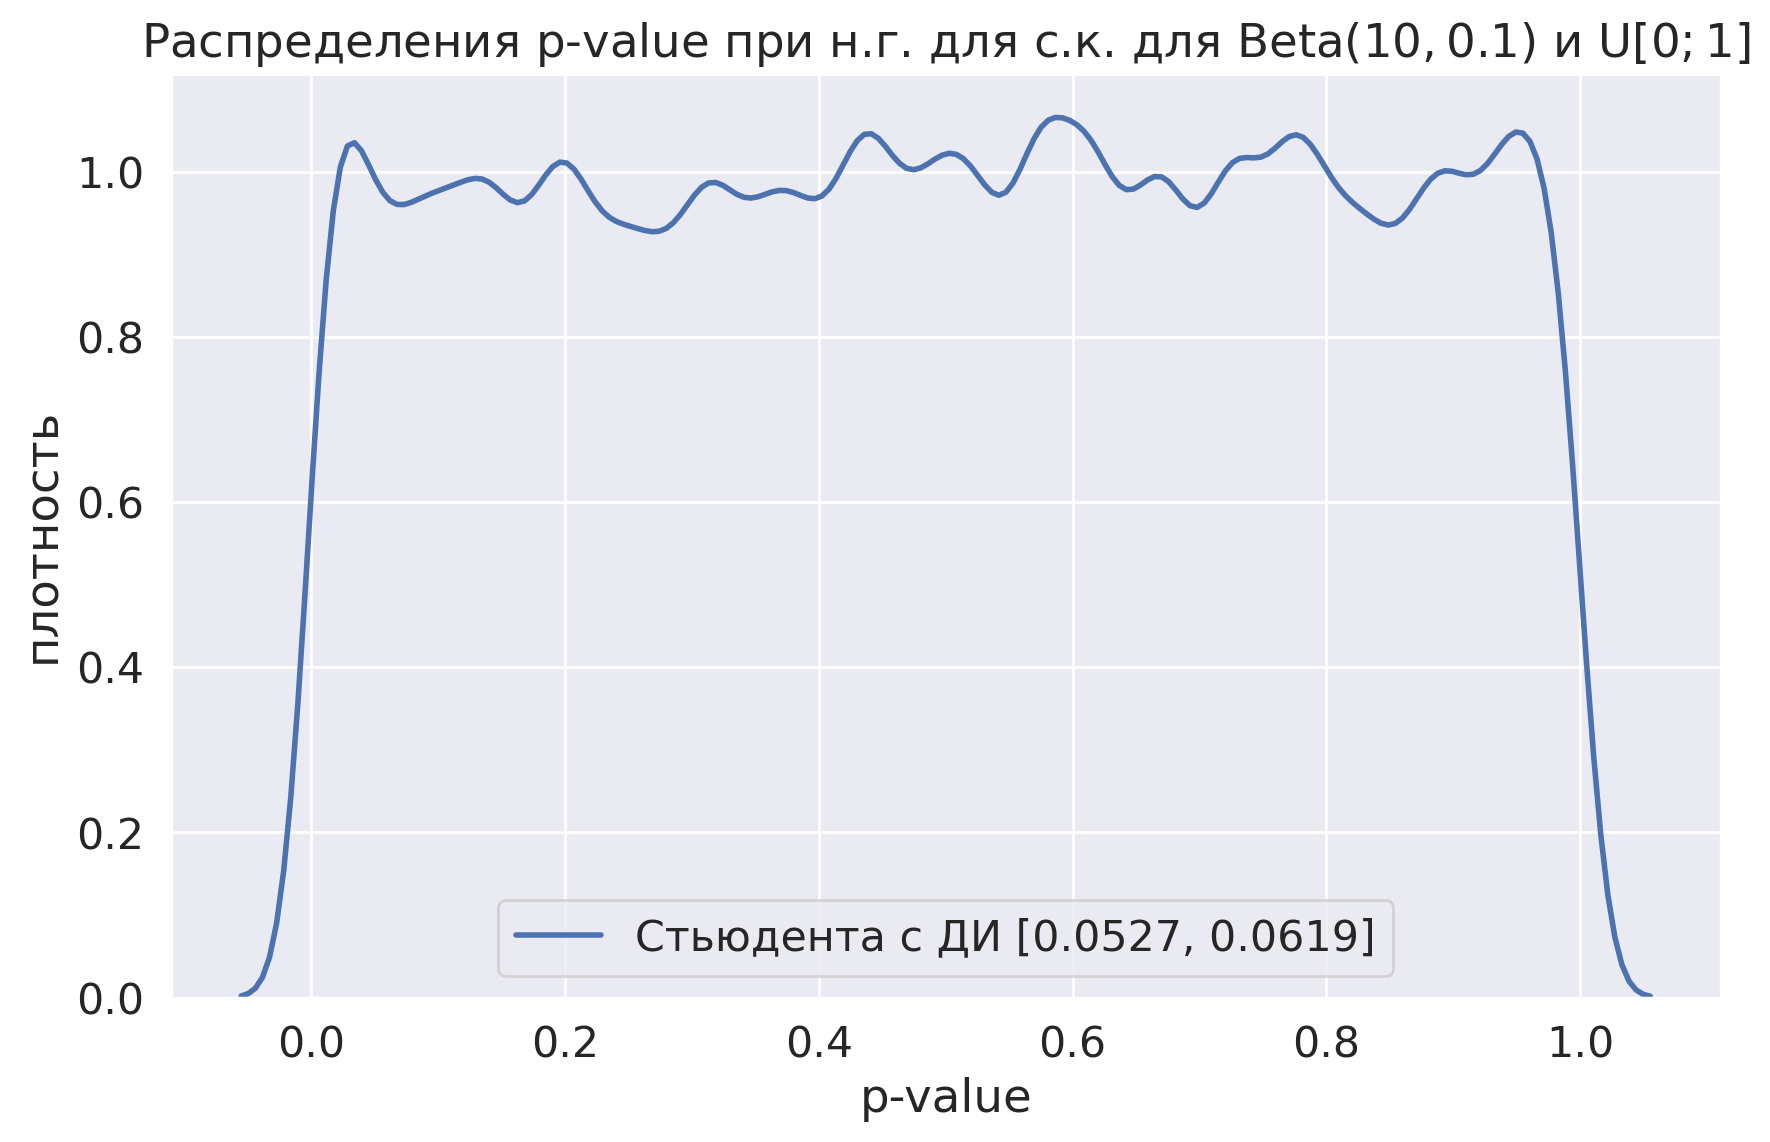

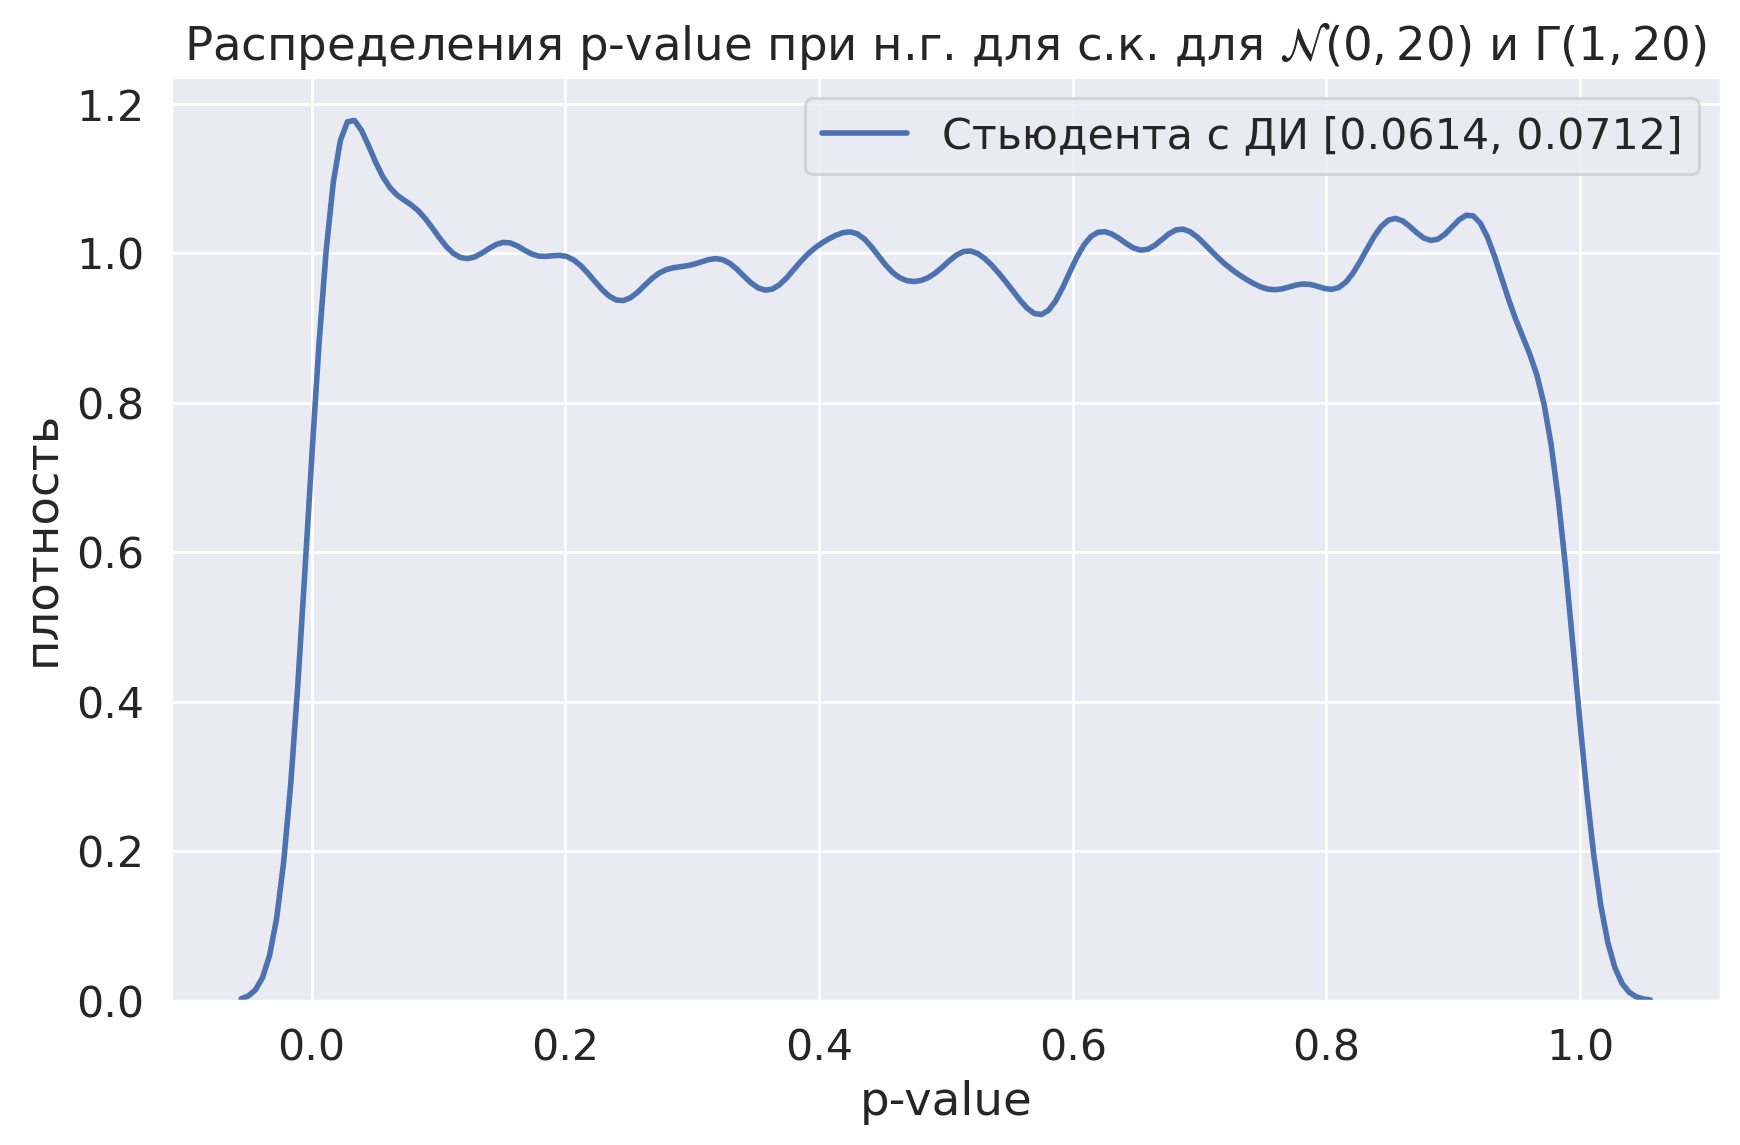

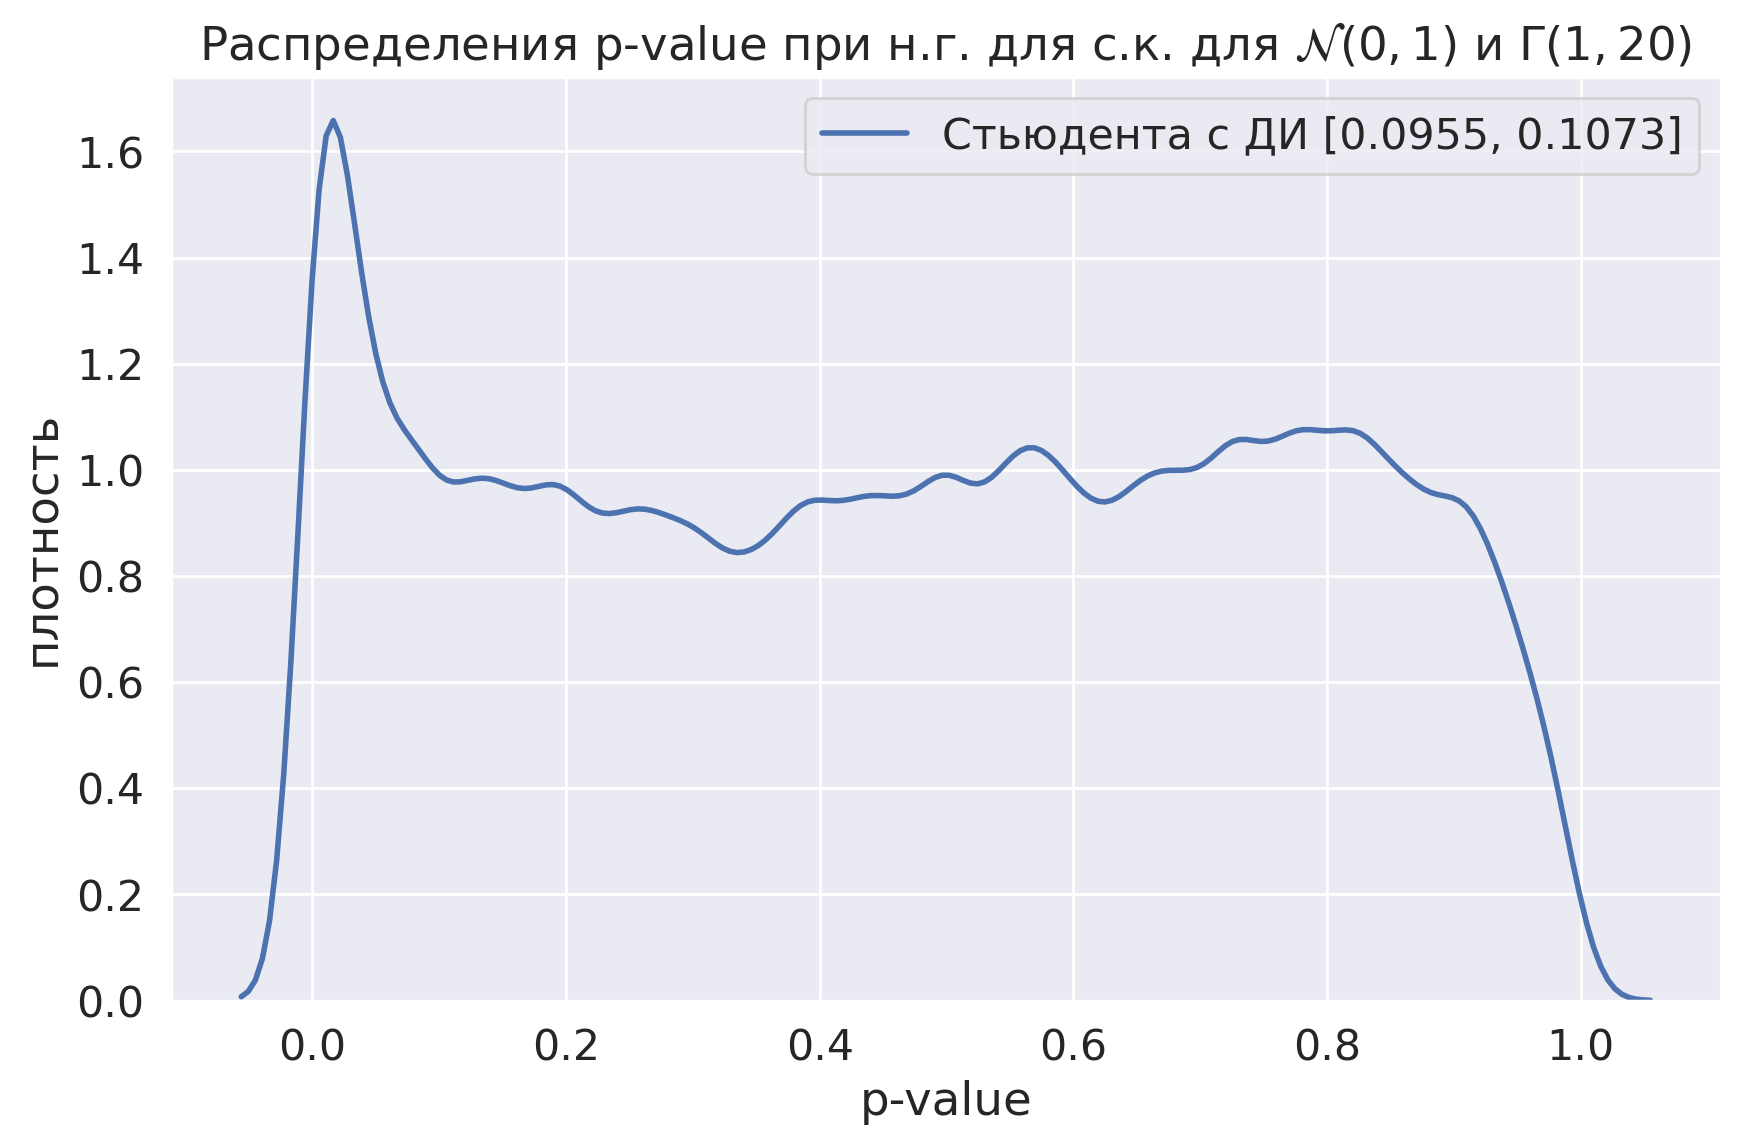

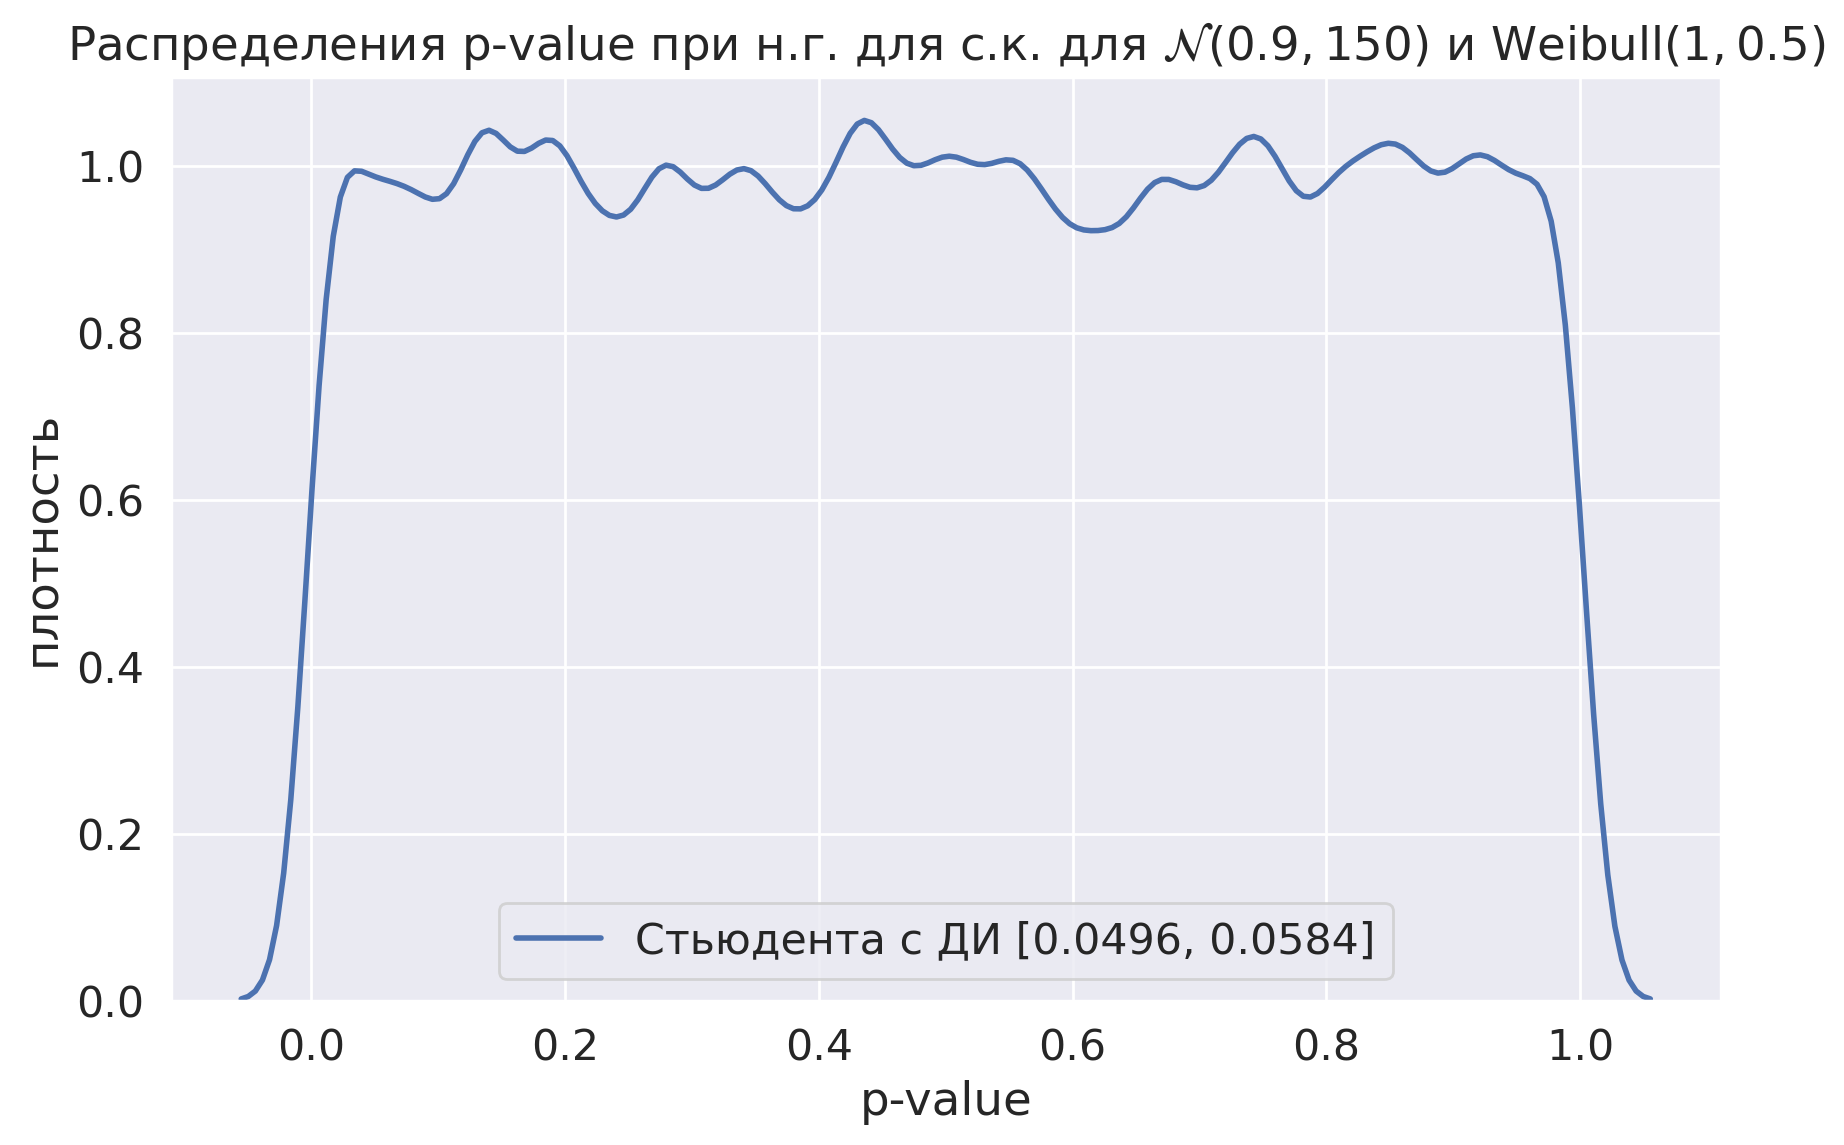

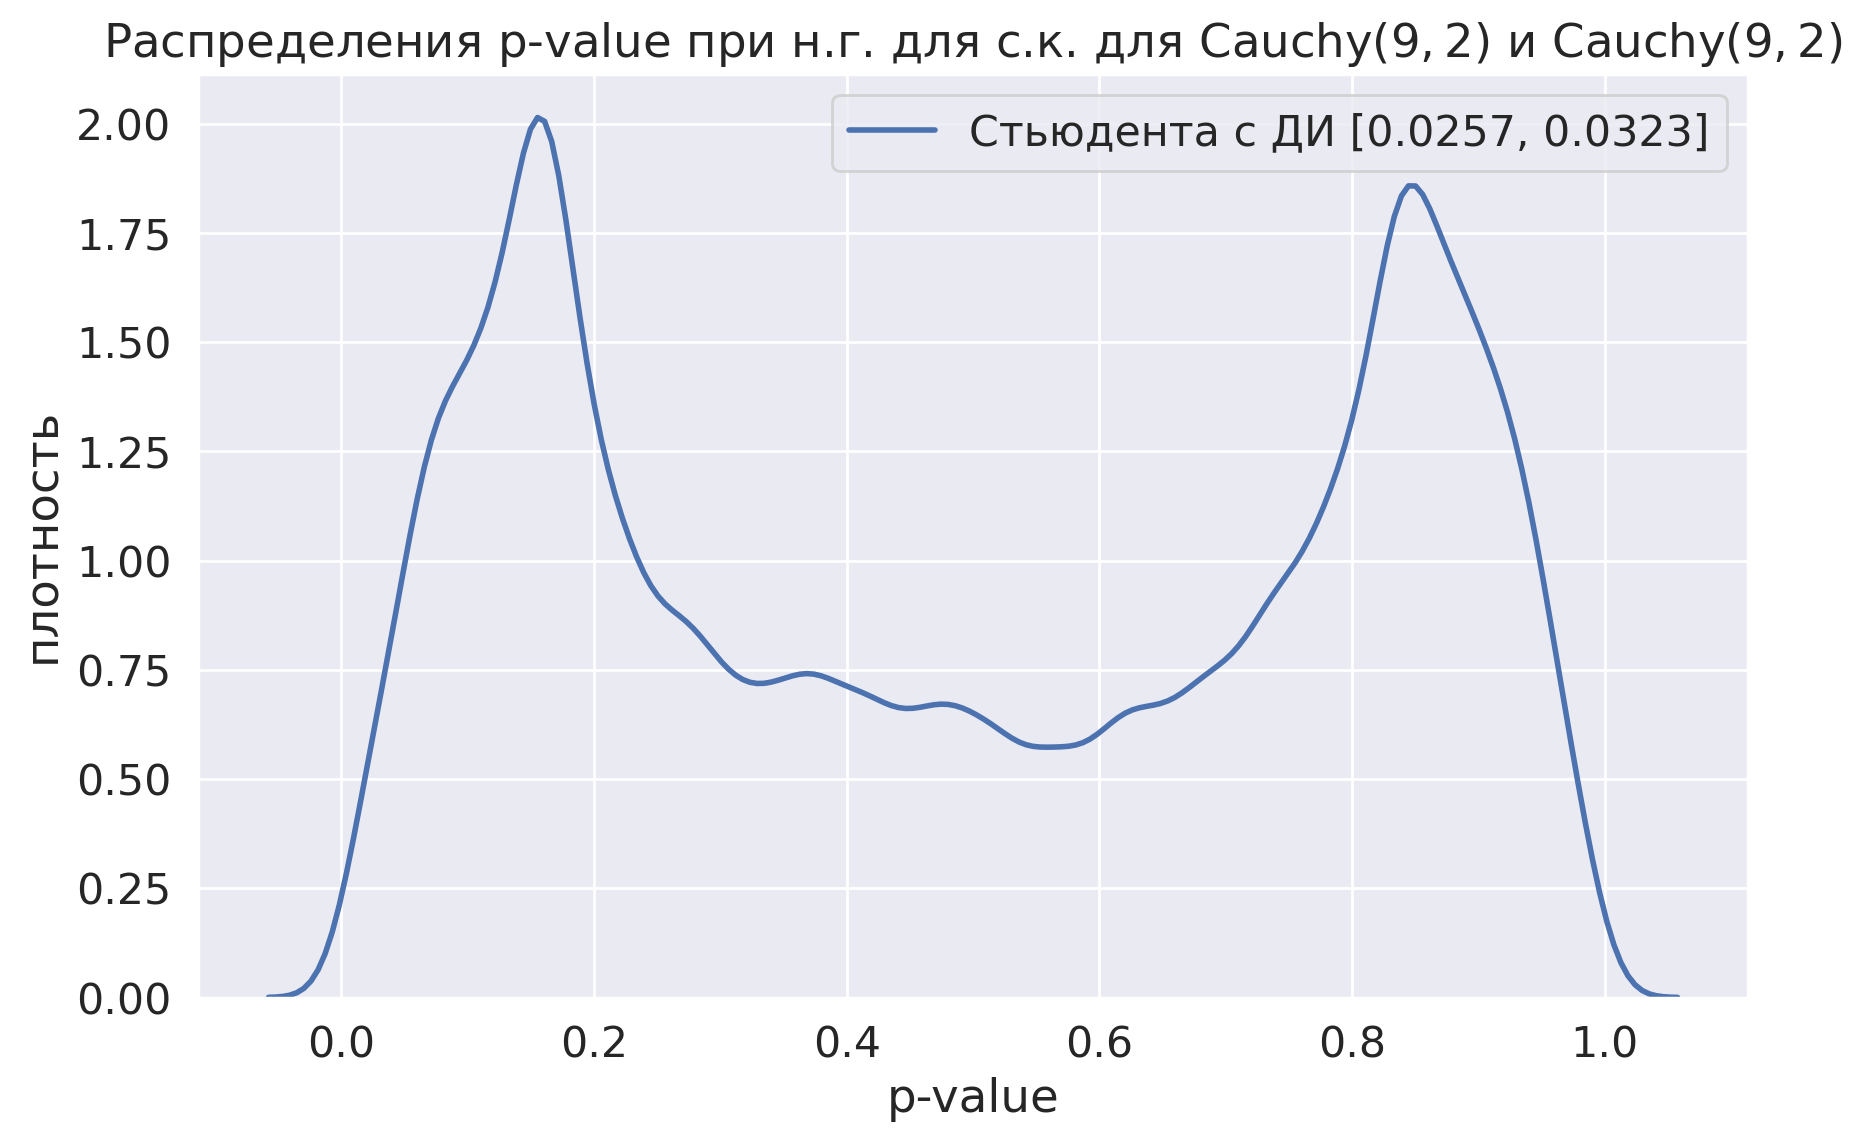

In [77]:
vis(sps.t(7).rvs, sps.laplace(loc=0, scale=1).rvs, r"$\mathrm{T}_7$", r"$\mathrm{Laplace}$")
vis(sps.expon(scale=1).rvs, sps.pareto(b=10, scale=1).rvs, r"$\mathrm{Exp}(1)$", r"$\mathrm{Pareto}(10)$")
vis(sps.beta(a=3, b=3).rvs, sps.norm(loc=0.5, scale=1).rvs, r"$\mathrm{Beta}(3, 3)$", r"$\mathcal{N}(0, 1)$")
vis(sps.beta(a=10, b=1).rvs, sps.uniform(loc=0, scale=1).rvs, r"$\mathrm{Beta}(10, 0.1)$", r"$\mathrm{U}[0; 1]$")

vis(sps.norm(loc=0, scale=20).rvs, sps.gamma(a=1, scale=20).rvs, r"$\mathcal{N}(0, 20)$", r"$\Gamma(1,20)$")
vis(sps.norm(loc=0, scale=1).rvs, sps.gamma(a=1, scale=20).rvs, r"$\mathcal{N}(0, 1)$", r"$\Gamma(1,20)$")
vis(sps.norm(loc=0.9, scale=150).rvs, sps.weibull_min(c=1, scale=0.5).rvs, r"$\mathcal{N}(0.9, 150)$", r"$\mathrm{Weibull}(1, 0.5)$")
vis(sps.cauchy(loc=9, scale=2).rvs, sps.cauchy(loc=9, scale=2).rvs, r"$\mathrm{Cauchy}(9, 2)$", r"$\mathrm{Cauchy}(9, 2)$", 30, True)

Что можно сказать про корректность критериев? В каких случаях критерий всё ещё контролирует ошибку I рода? Как думаете, с чем это связано? Если хотите, можете повторить процедуру для других пар распределений, чтобы эмпирически подтвердить вашу гипотезу.

**Ответ:**

<font color="#ae69c9ff">

**V1**: (Мне просто жалко это стерать, пусть уж останется, как память)
- Я подогнал параметры распределений, чтобы матожи были равны. В исходном же лслучае мы получаем какие-то распределения, не особо интересные нам (или я не понял, почему они должны быть интересными)
- Критерий Стьюдента на равенство матожей проверяет непосредственно равенство матожей. Выборка маленькая, поэтому распределения сильно корёжит, но отчётливо проглядывается паттерн равномерного распр.
- По мнению стены болтая и умных людей, которые чертили пентонграммы подж дверью кафедры ДМ, критерий Стьюдента выдаёт ас. нормальную оценку по теореме Линденберга–Феллера и л. Слуцкого -> результатам можно не удивляться
- Для некоторых пар распределений зафиксированное ранее альфа не попадает в ДИ. Я связываю это с не самой аккуратной подгонкой матожей. Как будто бы если потраить ещё n минут, подбор будет тривиальным
- К дисперсиям критерий оказался равнодушен: их изменение не повлияло на результаты. А. Если верить тем самым умным ребятам и стене болтая, то статистика Стьюдента, предложенная сильно выше
- UPD: Опа, если поставить `equal_var=False` и прогнать готовым критерием, "кривые" распределения 2 и 3 станут ровными. Это явно не из-за дисперсии.

<font color="#ae69c9ff">

**V2**: Ладно, да, задание классное, оно прям имеет смысл. Так вот. Я хочу выделить ~~4 случая~~ 5 случаев при нулевой гипотезе:
- все комментарии, приведённые ниже, работают только для малых размеров выборки (полагаю, поэтому в задании просили для 30 эл. сделать). Если сделать хотябы 300 элементов, то уже все распредщеления равномерные и ничего интересного
- чем дольше делаешь прак по статам, тем больше вопросов получаешь... 
- дисперсии совпадают, распределения похожей формы - всё вообще хорошо, статистика точная. Ну, счастье, всё очев
- дисперсии различаются, распределения похожей формы - "По мнению стены болтая и умных людей, которые чертили пентонграммы подж дверью кафедры ДМ, критерий Стьюдента выдаёт ас. нормальную оценку по теореме Линденберга–Феллера и л. Слуцкого" - тоже всё хорошо, но имеем дело уже с предельной теоремой
- дисперсии одинаковые (предпредпоследний график) и формы разные - это я не смогу объяснить, но такой случай критерий Стьюдента тоже хавает. Да, плотность получается немного сбитая, однако...
- дисперсии разные и формы разные (вот, например, 2 и 5 сравнения) - заметен тренд на стягивание p-value в сторону распределения с более тяжёлыми хвостами (aka большей дисперсией)
- бесконечный матож. Ну тут вообще всё плохо, распределение p-value _какое-то_. Что примечательно, оно даже к чему-то сходится, но явно не к стандартному ожидаемому. Вообще и взятие p-value было некорректным (прям совсем), но убирать не хочу, так как мем смешной)) 

**Итог**: тест перестаёт конкретно работать на малых выборках в случае подачи на вход сильно асимметричных данных с разной дисперсией. Ну и Коши)

<font color='red'>

3.2 нужно было взять теоретическое значение матожидания и стандартного отклонения для конкретного распределения (mean и std далее) и сделать (X - mean) / std (-1)

![image.png](Cauchy.png)

3. Теперь перейдём к равенству дисперсий. Давайте проверим, контролирует ли t-критерий ошибку I рода, если ему на вход дать две нормальные выборки с равными средними, но не равными дисперсиями.

Насэмплируйте много (порядка 10000) нормальных выборок из $\mathcal{N}(0, 1)$ и посчитайте pvalue для размера выборок 100 и разных значений (2-3 варианта) дисперсий (первые выборки оставьте без изменений, а вторые домножьте на взятые вами значения).

Напоминаем, что использовать циклы for (кроме как для визуализации) -- моветон. Сделайте выводы.

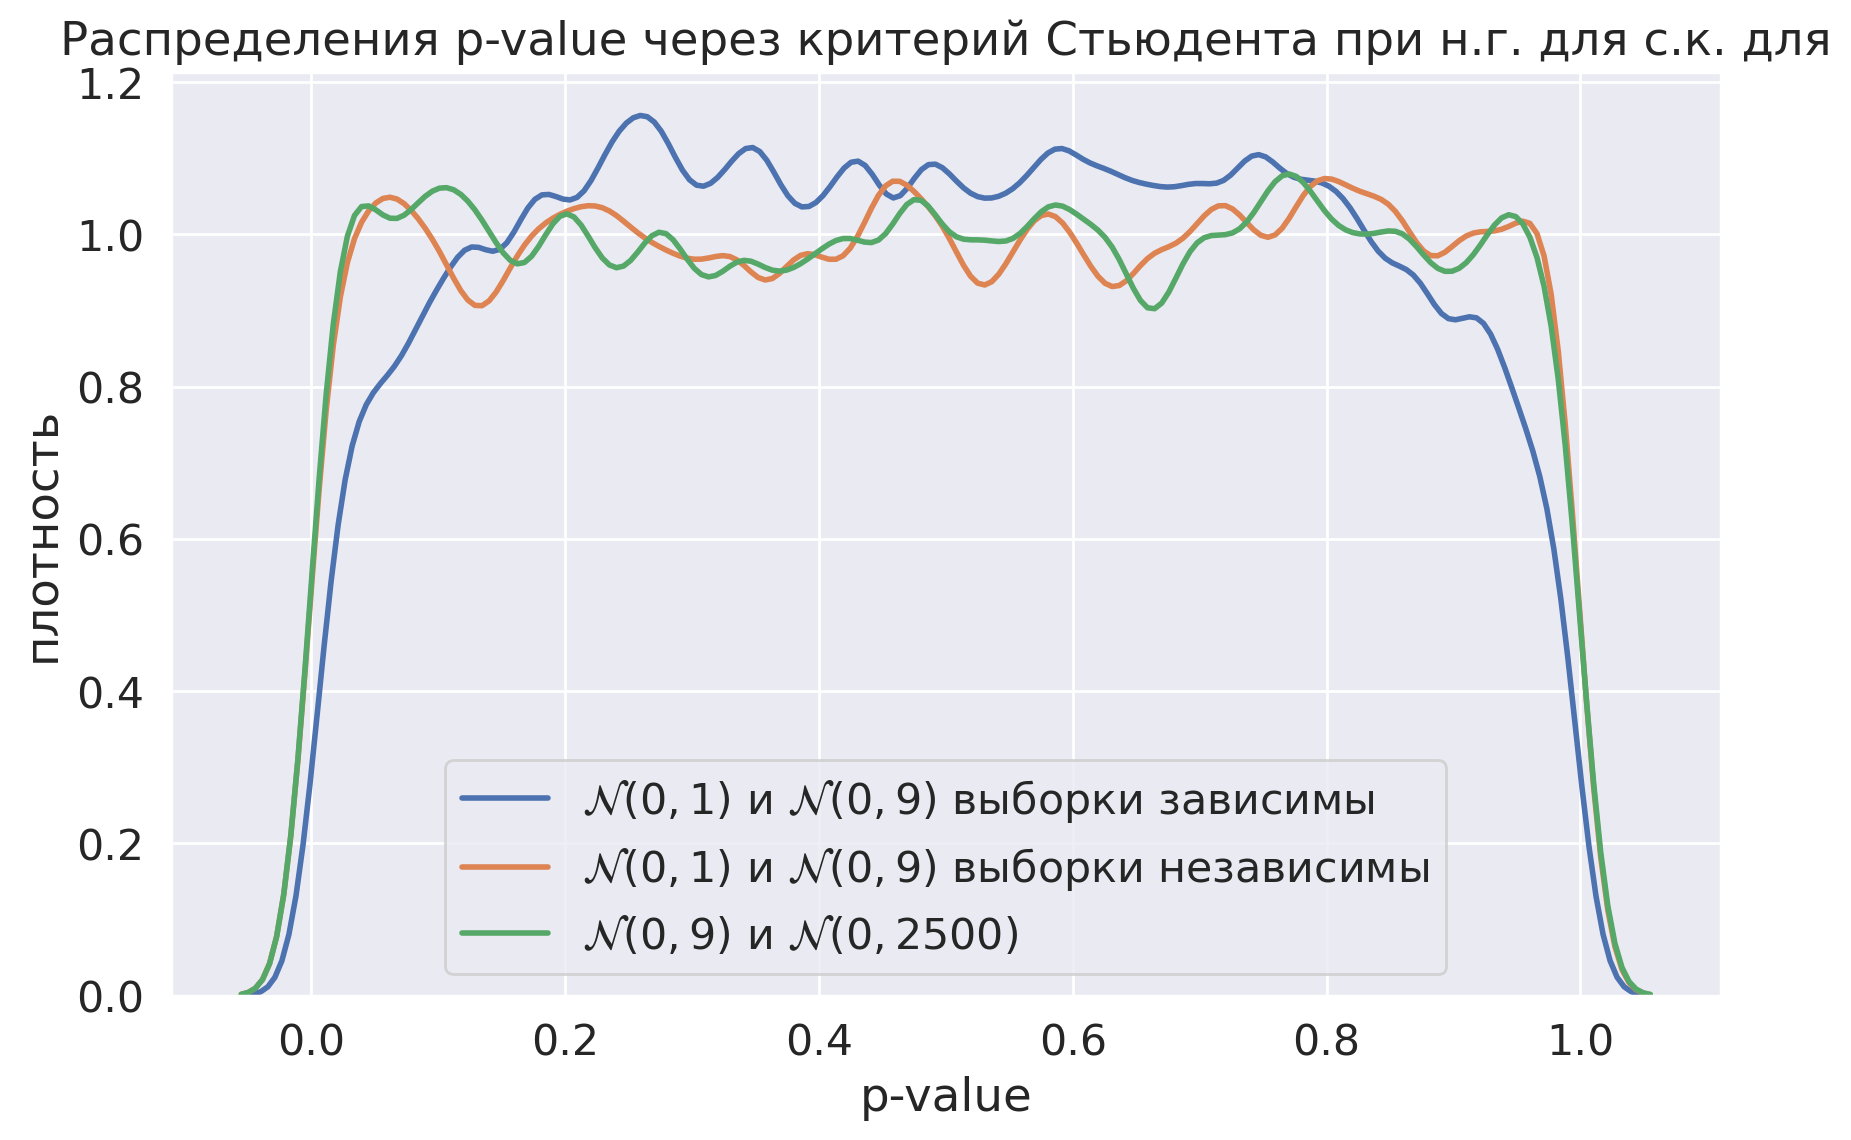

In [78]:
# Правила хорошего тона и отсутствие копипасты - это хорошо, но как будто бы здесь совершенно не критично

N = 10000
SAMPLE_SIZE = 100

X = sps.norm(loc=0, scale=1).rvs((N, SAMPLE_SIZE))
Y = X * 9 # интуиция мне подсказывает, что так (домножать на const и пихать две выборки с одной реализации в критерий) делать очень плохо. Давайте потестируем разные подходы
Z = sps.norm(loc=0, scale=9).rvs((N, SAMPLE_SIZE))
K = sps.norm(loc=0, scale=2500).rvs((N, SAMPLE_SIZE))

pvalue_T = lambda X, Y: 1 - sps.t(SAMPLE_SIZE * 2 - 2).cdf(
    (SAMPLE_SIZE * SAMPLE_SIZE / (SAMPLE_SIZE + SAMPLE_SIZE)) ** 0.5 * (np.mean(X, axis = 1) - np.mean(Y, axis=1)) / np.sqrt(
    ((SAMPLE_SIZE - 1) * np.var(X, ddof=1, axis=1) + (SAMPLE_SIZE - 1) * np.var(Y, ddof=1, axis=1)) / (SAMPLE_SIZE * 2 - 1))
    )

# pvalue_T = sps.ttest_ind(X, Y, axis=1, equal_var=True).pvalue # вроде как это то же самое, проверял лишний раз

plt.figure(figsize=(10,6))
sns.kdeplot(pvalue_T(X, Y), lw=2, label=r"$\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 9)$ выборки зависимы", bw_adjust=0.4) # да пофиг какая там парметризация, на результат не влияет. Пишу в нотации sps
sns.kdeplot(pvalue_T(X, Z), lw=2, label=r"$\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 9)$ выборки независимы", bw_adjust=0.4)
sns.kdeplot(pvalue_T(Z, K), lw=2, label=r"$\mathcal{N}(0, 9)$ и $\mathcal{N}(0, 2500)$", bw_adjust=0.4)
plt.title(fr"Распределения p-value через критерий Стьюдента при н.г. для с.к. для"); plt.xlabel("p-value"); plt.ylabel(r"плотность"); plt.legend(loc="best"); plt.grid(True)
plt.show()

<font color="#ae69c9ff">

Интуиция не обманула, плохо пихать в критерий зависимые выборки (получаем как минимум, странный результат, который не меняется с увеличением кол-ва выборок и размера выборок. Он возникает из-за того, что числитель в статистике Стьюдента мал из-за зависимости -> распределение смещается к центру).

А так вообще, как можно заметить, тест Стьюдента всё ещё корректно справляется с симметричными распределениями, которые имеют разные матожами

Что же делать, если мы ничего не знаем про то, равны ли дисперсии у выборок или нет? В таком случае можно использовать так называемый [критерий Уэлча](https://en.wikipedia.org/wiki/Welch%27s_t-test). Он берёт под капотом похожую статистику, что и t-критерий, но для подсчёта pvalue использует функцию распределения Стьюдента с числом степеней свободы, *зависящим от выборок*. Оказывается, такой подгон даёт свои плоды (его мотивацию можно почитать по ссылке). Давайте проверим, что ошибка I рода у такого критерия уже будет контролироваться. Для этого проведите процедуру выше, но вместо t-критерия используйте критерий Уэлча (для этого достаточно в функцию `ttest_ind` прокинуть аргумент `equal_var=False`).

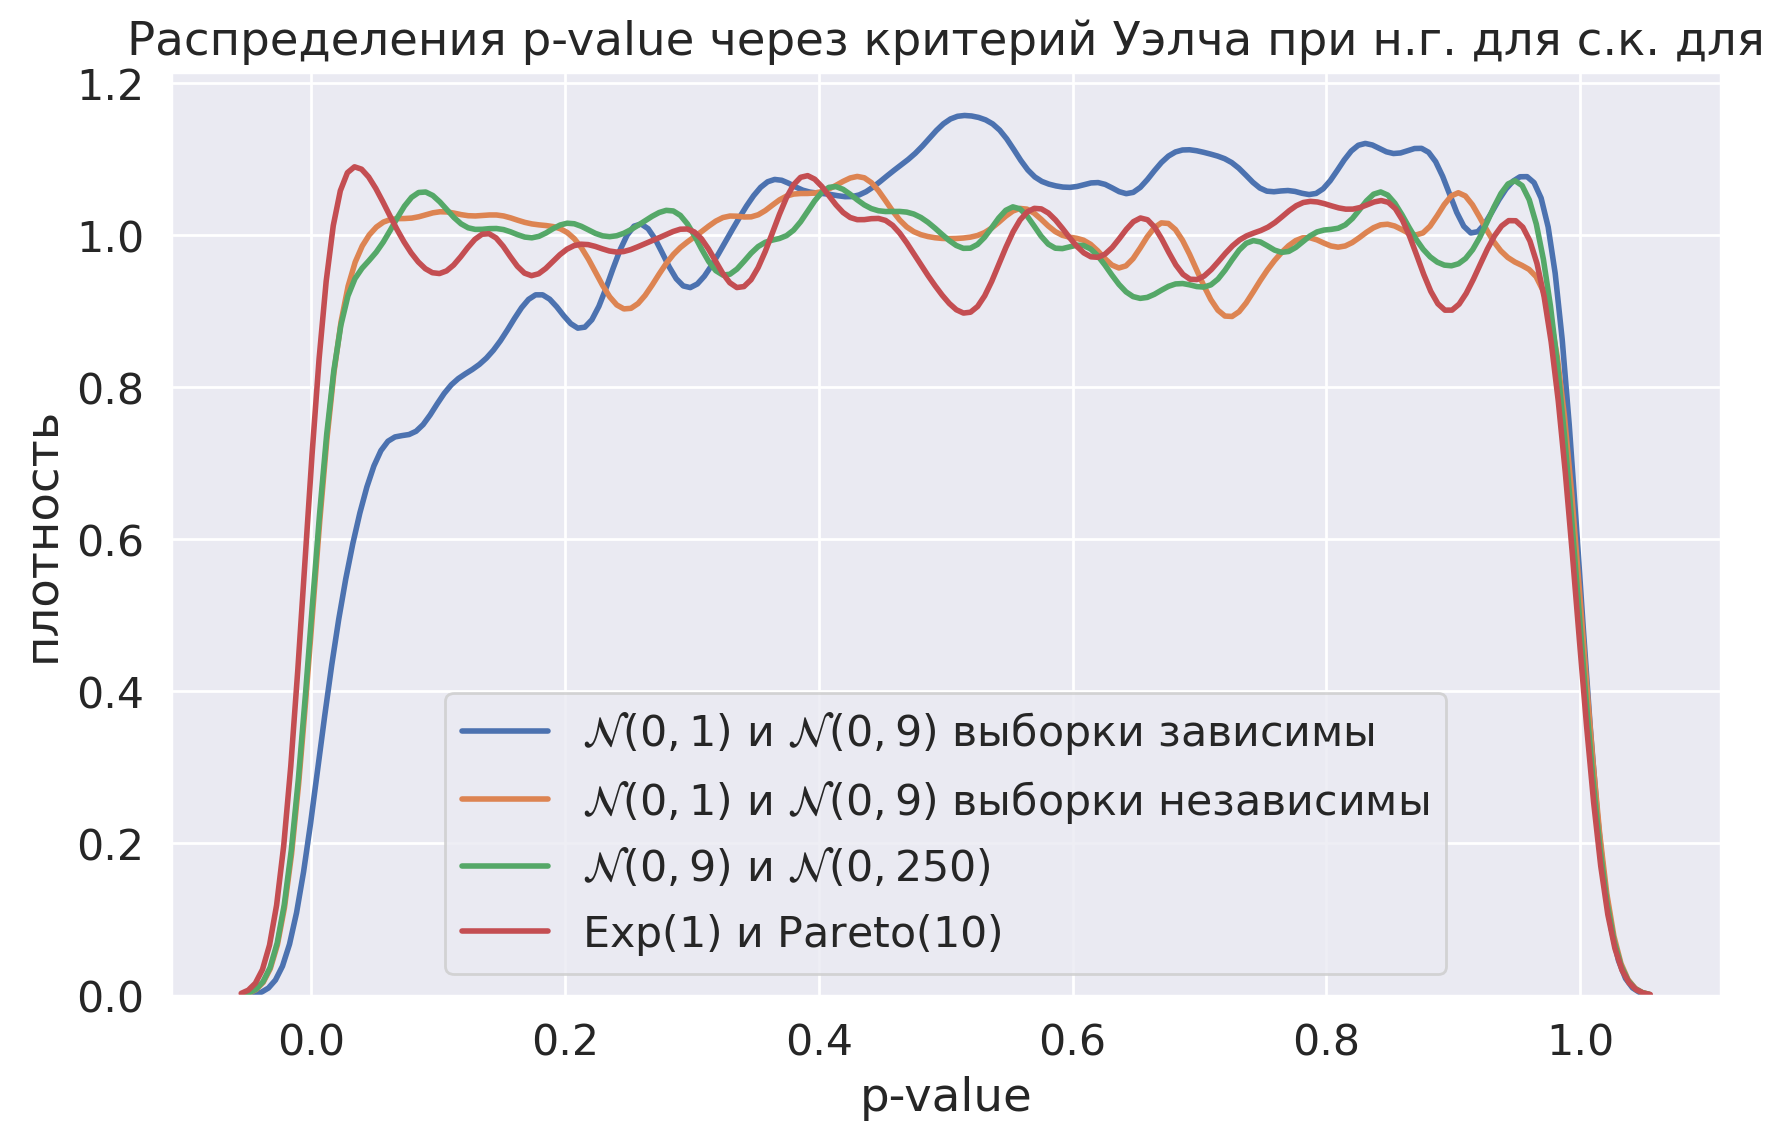

In [79]:
M = sps.expon(scale=1).rvs((N, SAMPLE_SIZE))
O = sps.pareto(b=10, scale=1).rvs((N, SAMPLE_SIZE))

pvalue_T = lambda X, Y: sps.ttest_ind(X, Y, axis=1, equal_var=False).pvalue

plt.figure(figsize=(10,6))
sns.kdeplot(pvalue_T(X, Y), lw=2, label=r"$\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 9)$ выборки зависимы", bw_adjust=0.4) # да пофиг какая там парметризация, на результат не влияет. Пишу в нотации sps
sns.kdeplot(pvalue_T(X, Z), lw=2, label=r"$\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 9)$ выборки независимы", bw_adjust=0.4)
sns.kdeplot(pvalue_T(Z, K), lw=2, label=r"$\mathcal{N}(0, 9)$ и $\mathcal{N}(0, 250)$", bw_adjust=0.4)
sns.kdeplot(pvalue_T(M - M.mean(), O - O.mean()), lw=2, label=r"$\mathrm{Exp}(1)$ и $\mathrm{Pareto}(10)$", bw_adjust=0.4)
plt.title(fr"Распределения p-value через критерий Уэлча при н.г. для с.к. для"); plt.xlabel("p-value"); plt.ylabel(r"плотность"); plt.legend(loc="best"); plt.grid(True)
plt.show()

<font color="#ae69c9ff">

Ну, идентично началу второго пункта.

Существенно поменялось только распределение на зависимых выборках.

А ещё, что самое крутое, но в заданиии это почему-то скипнуто, сест Уэлча умеет обрабатывать те самые "разные" распределения, на которых ломался тест Стьюдента

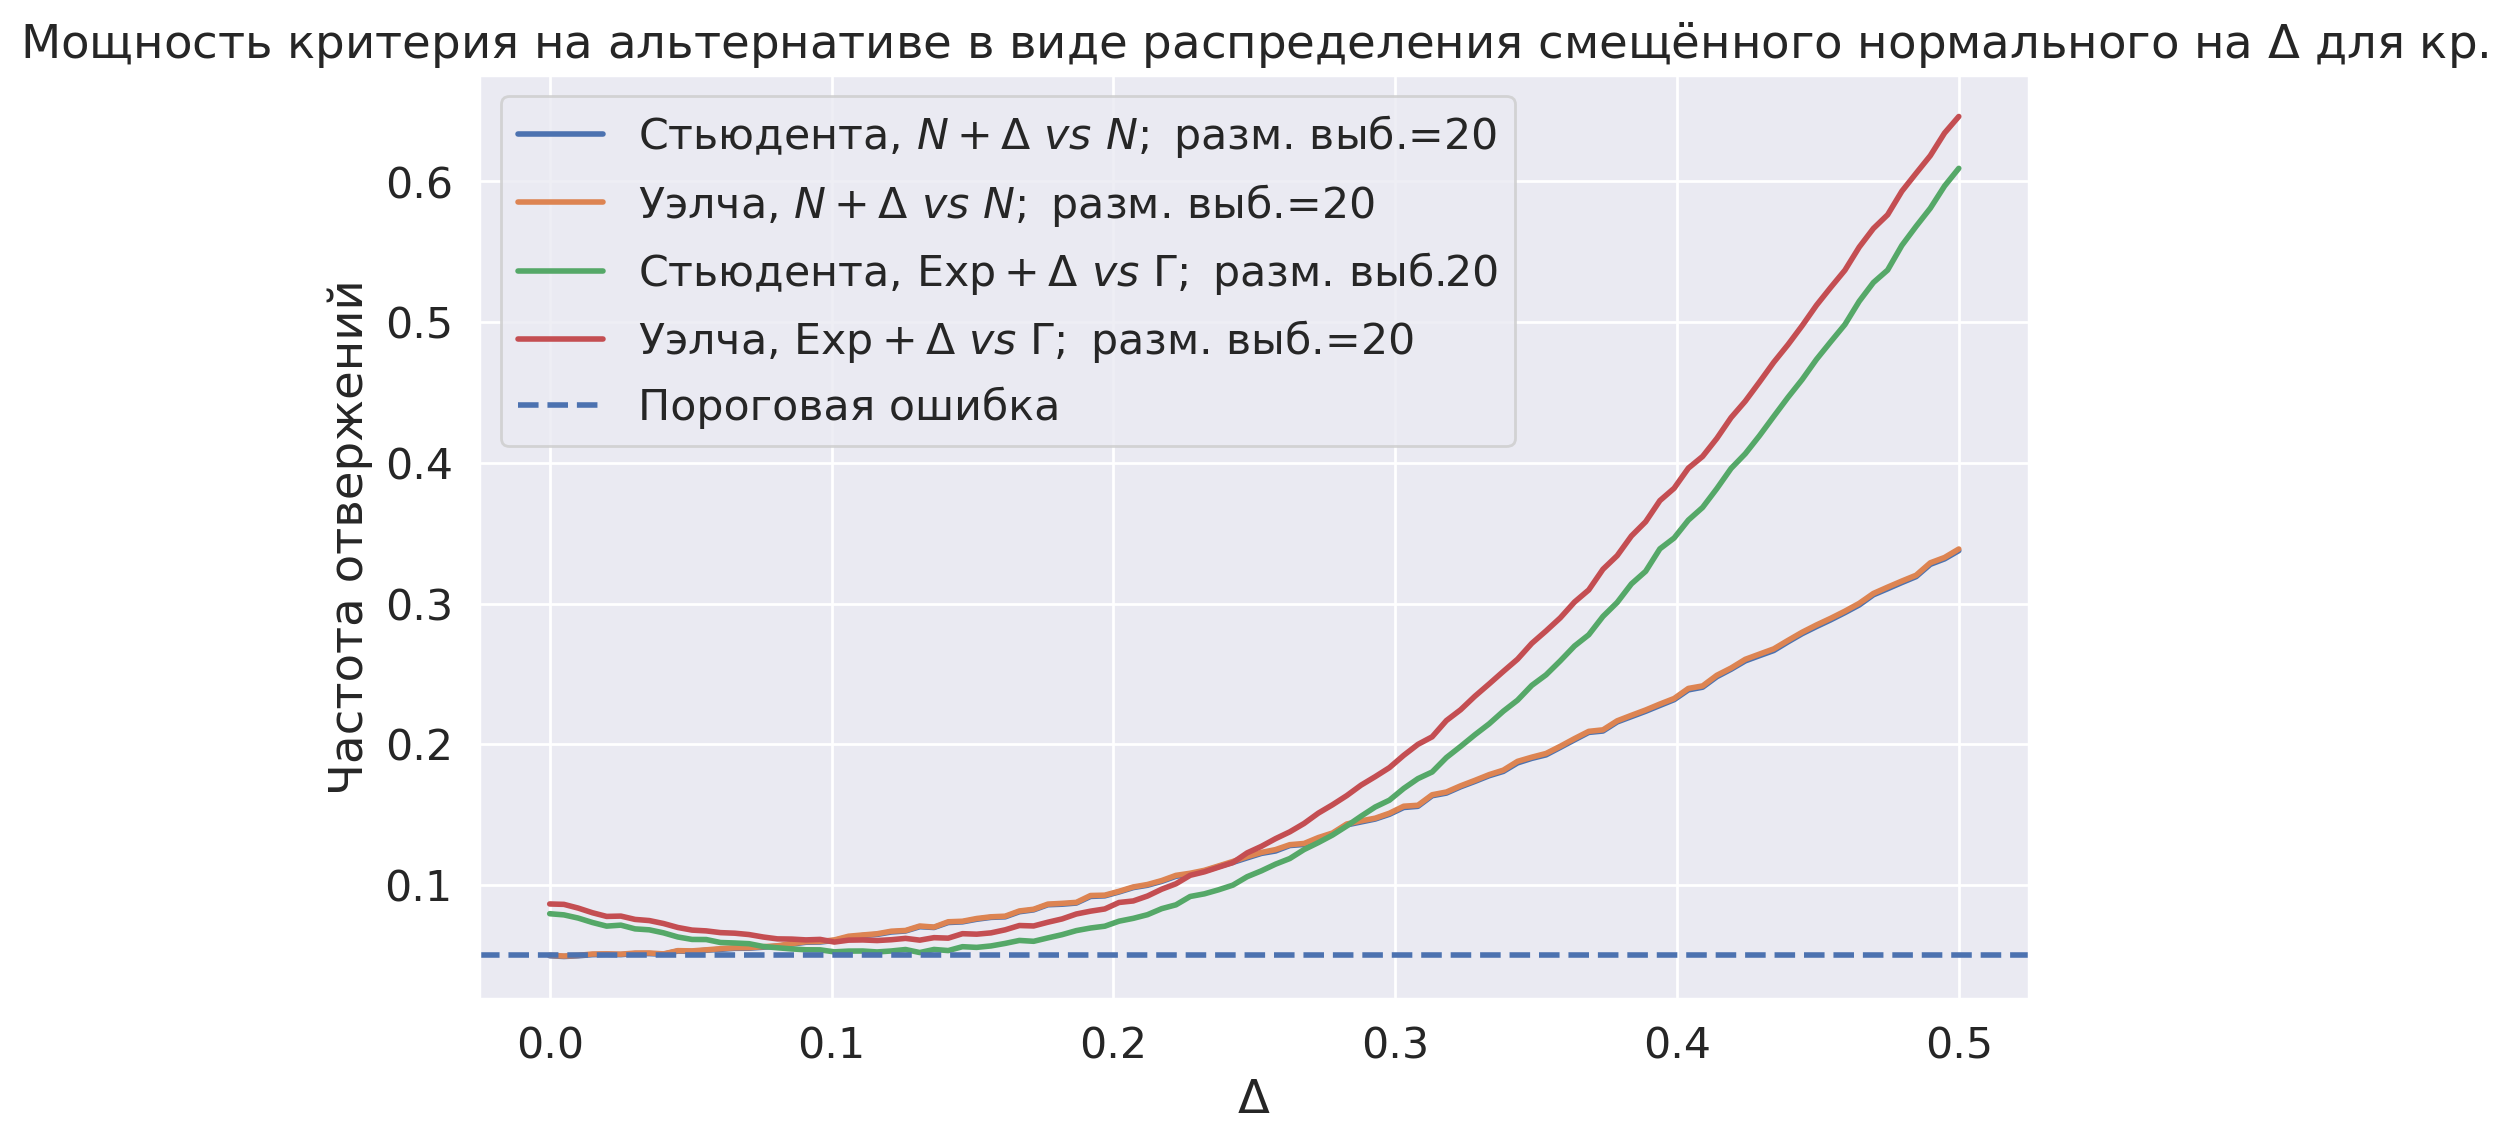

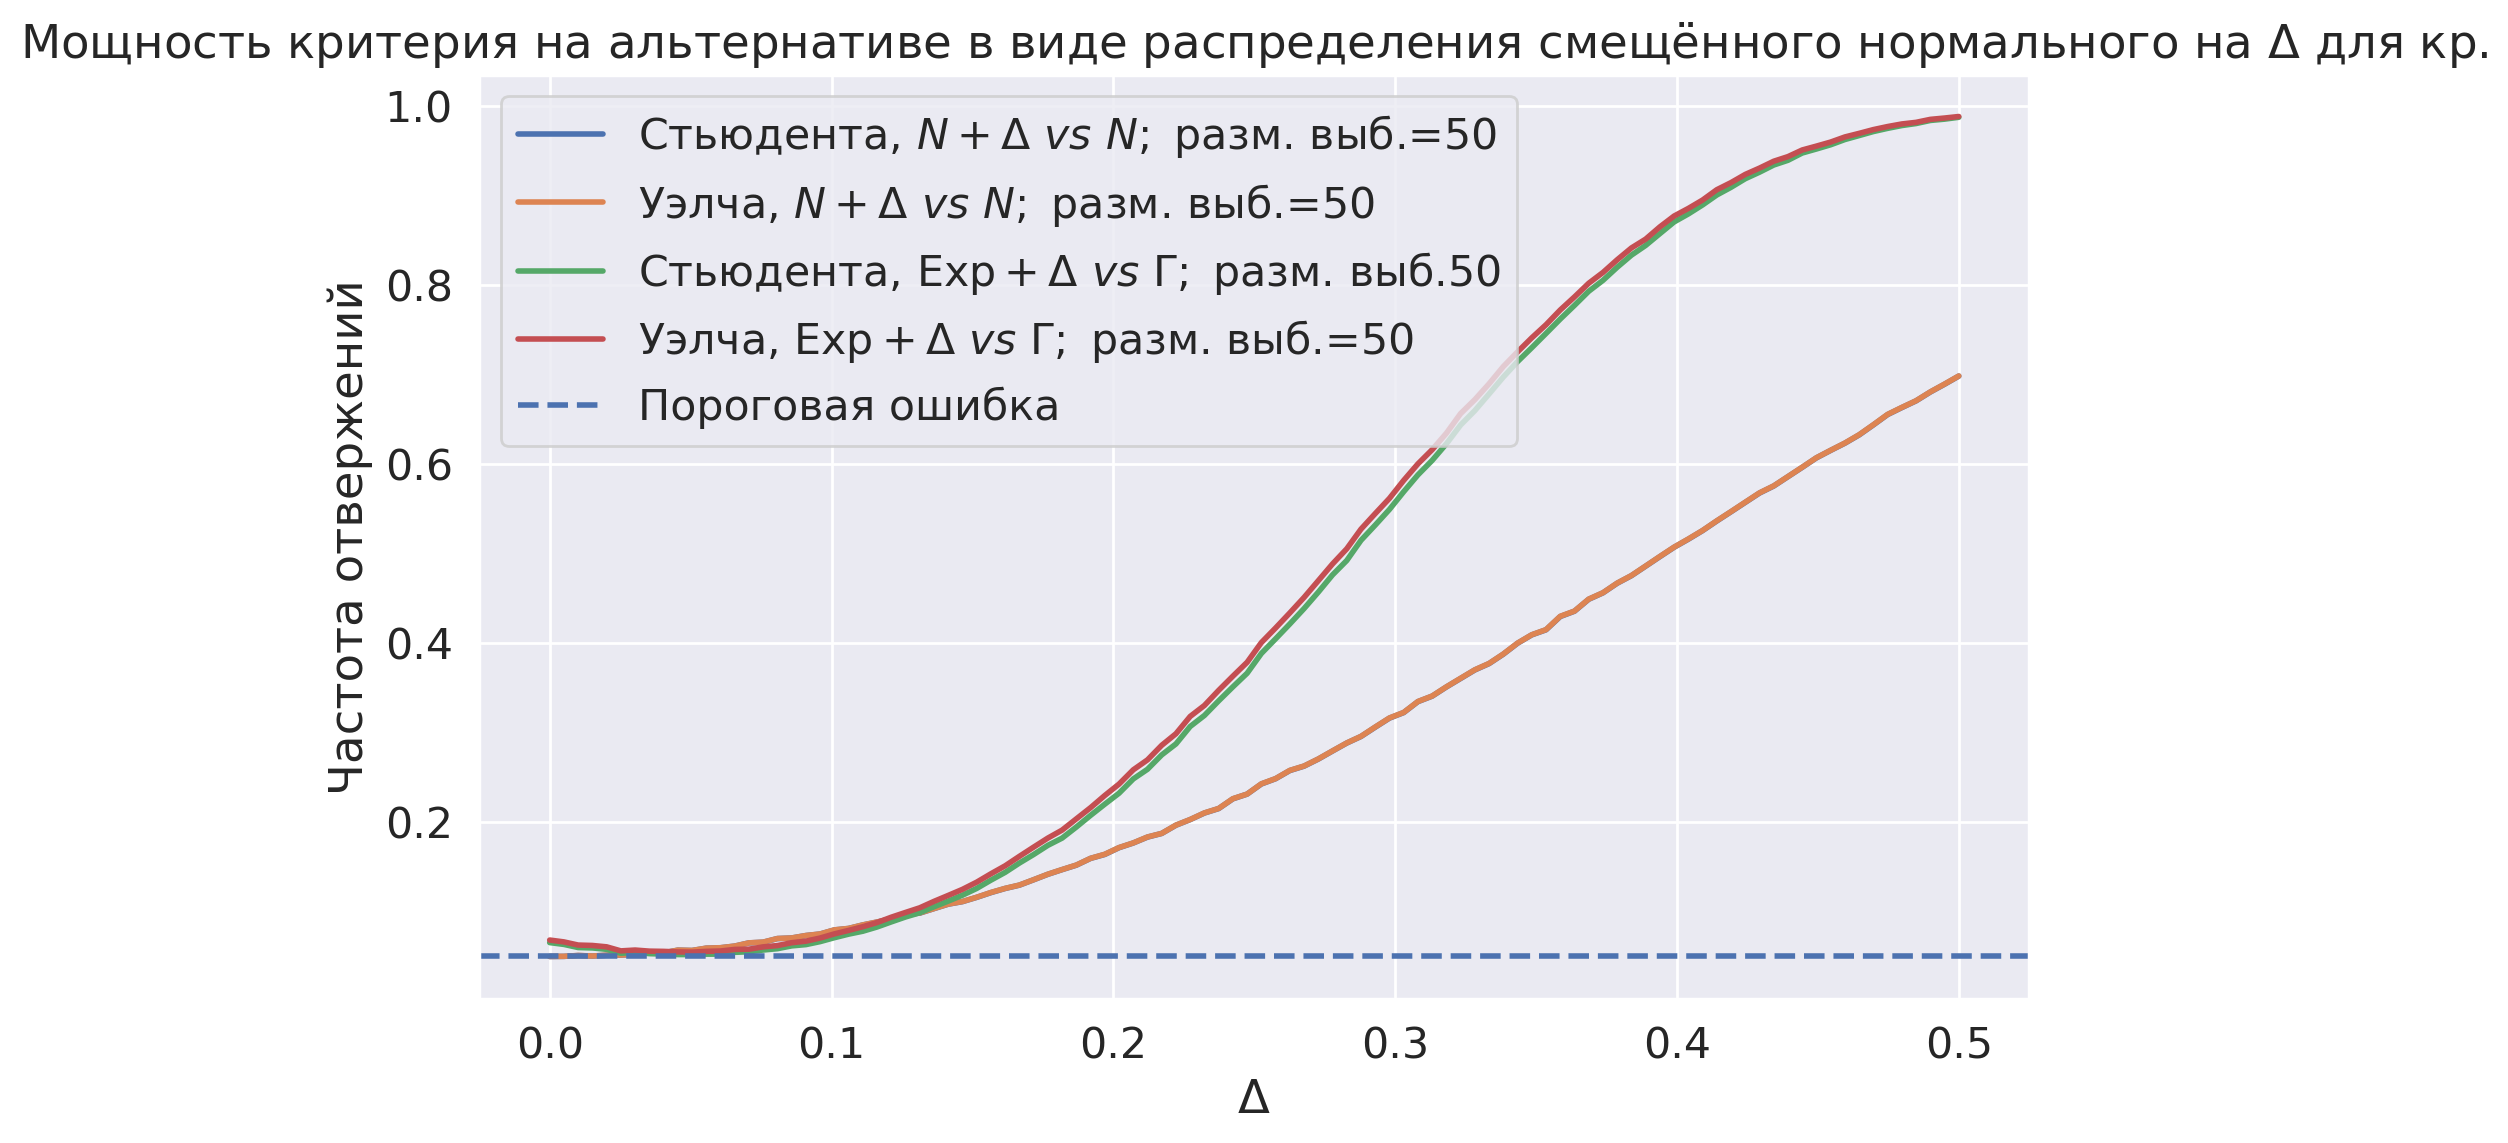

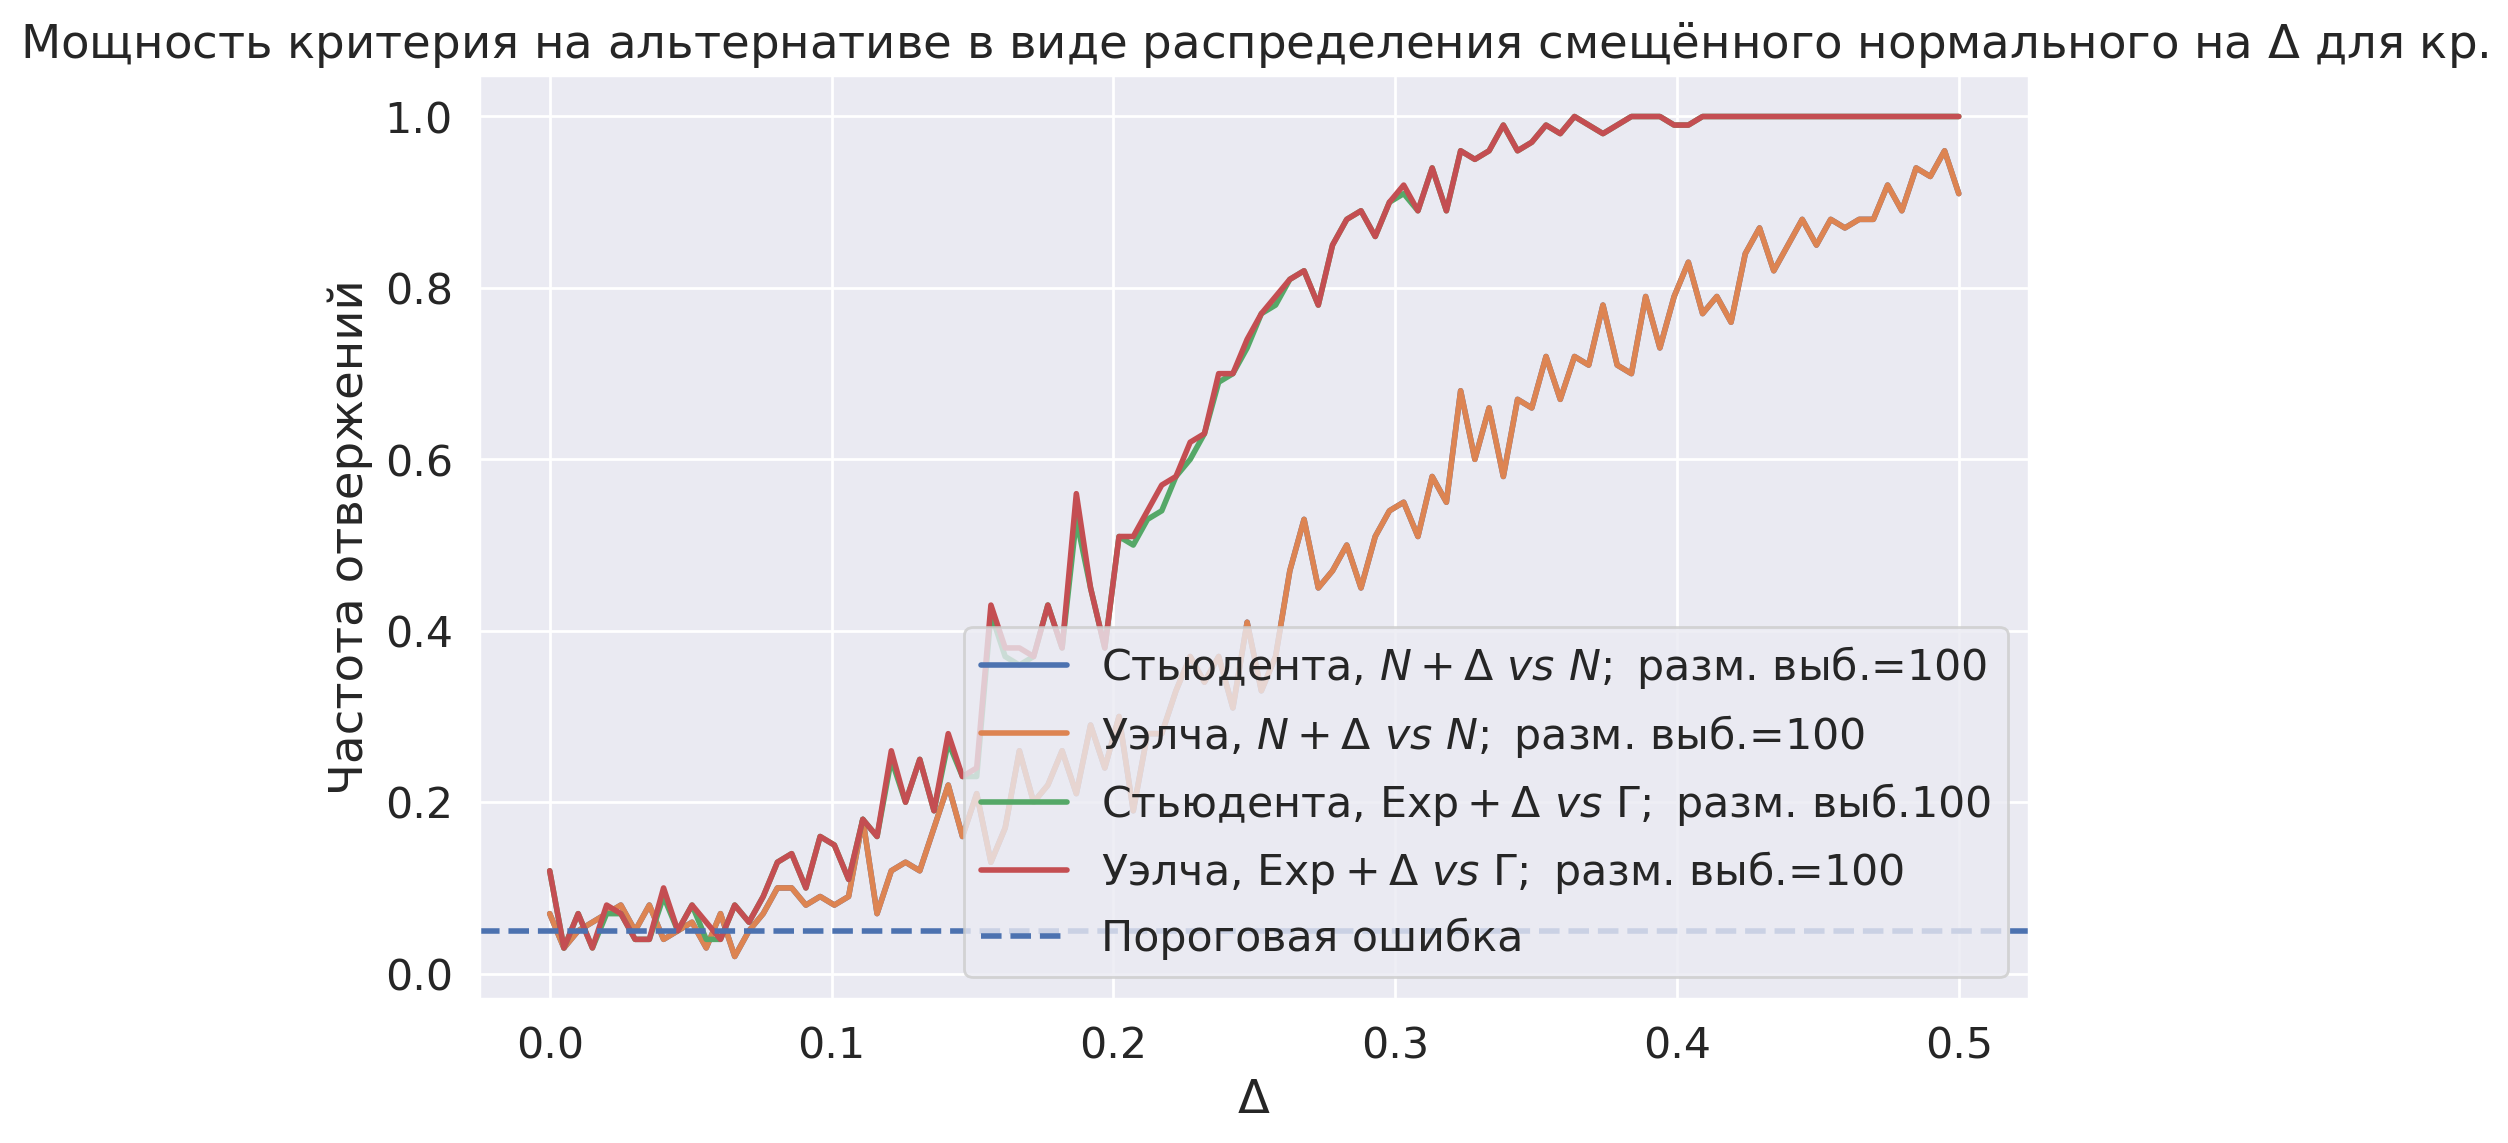

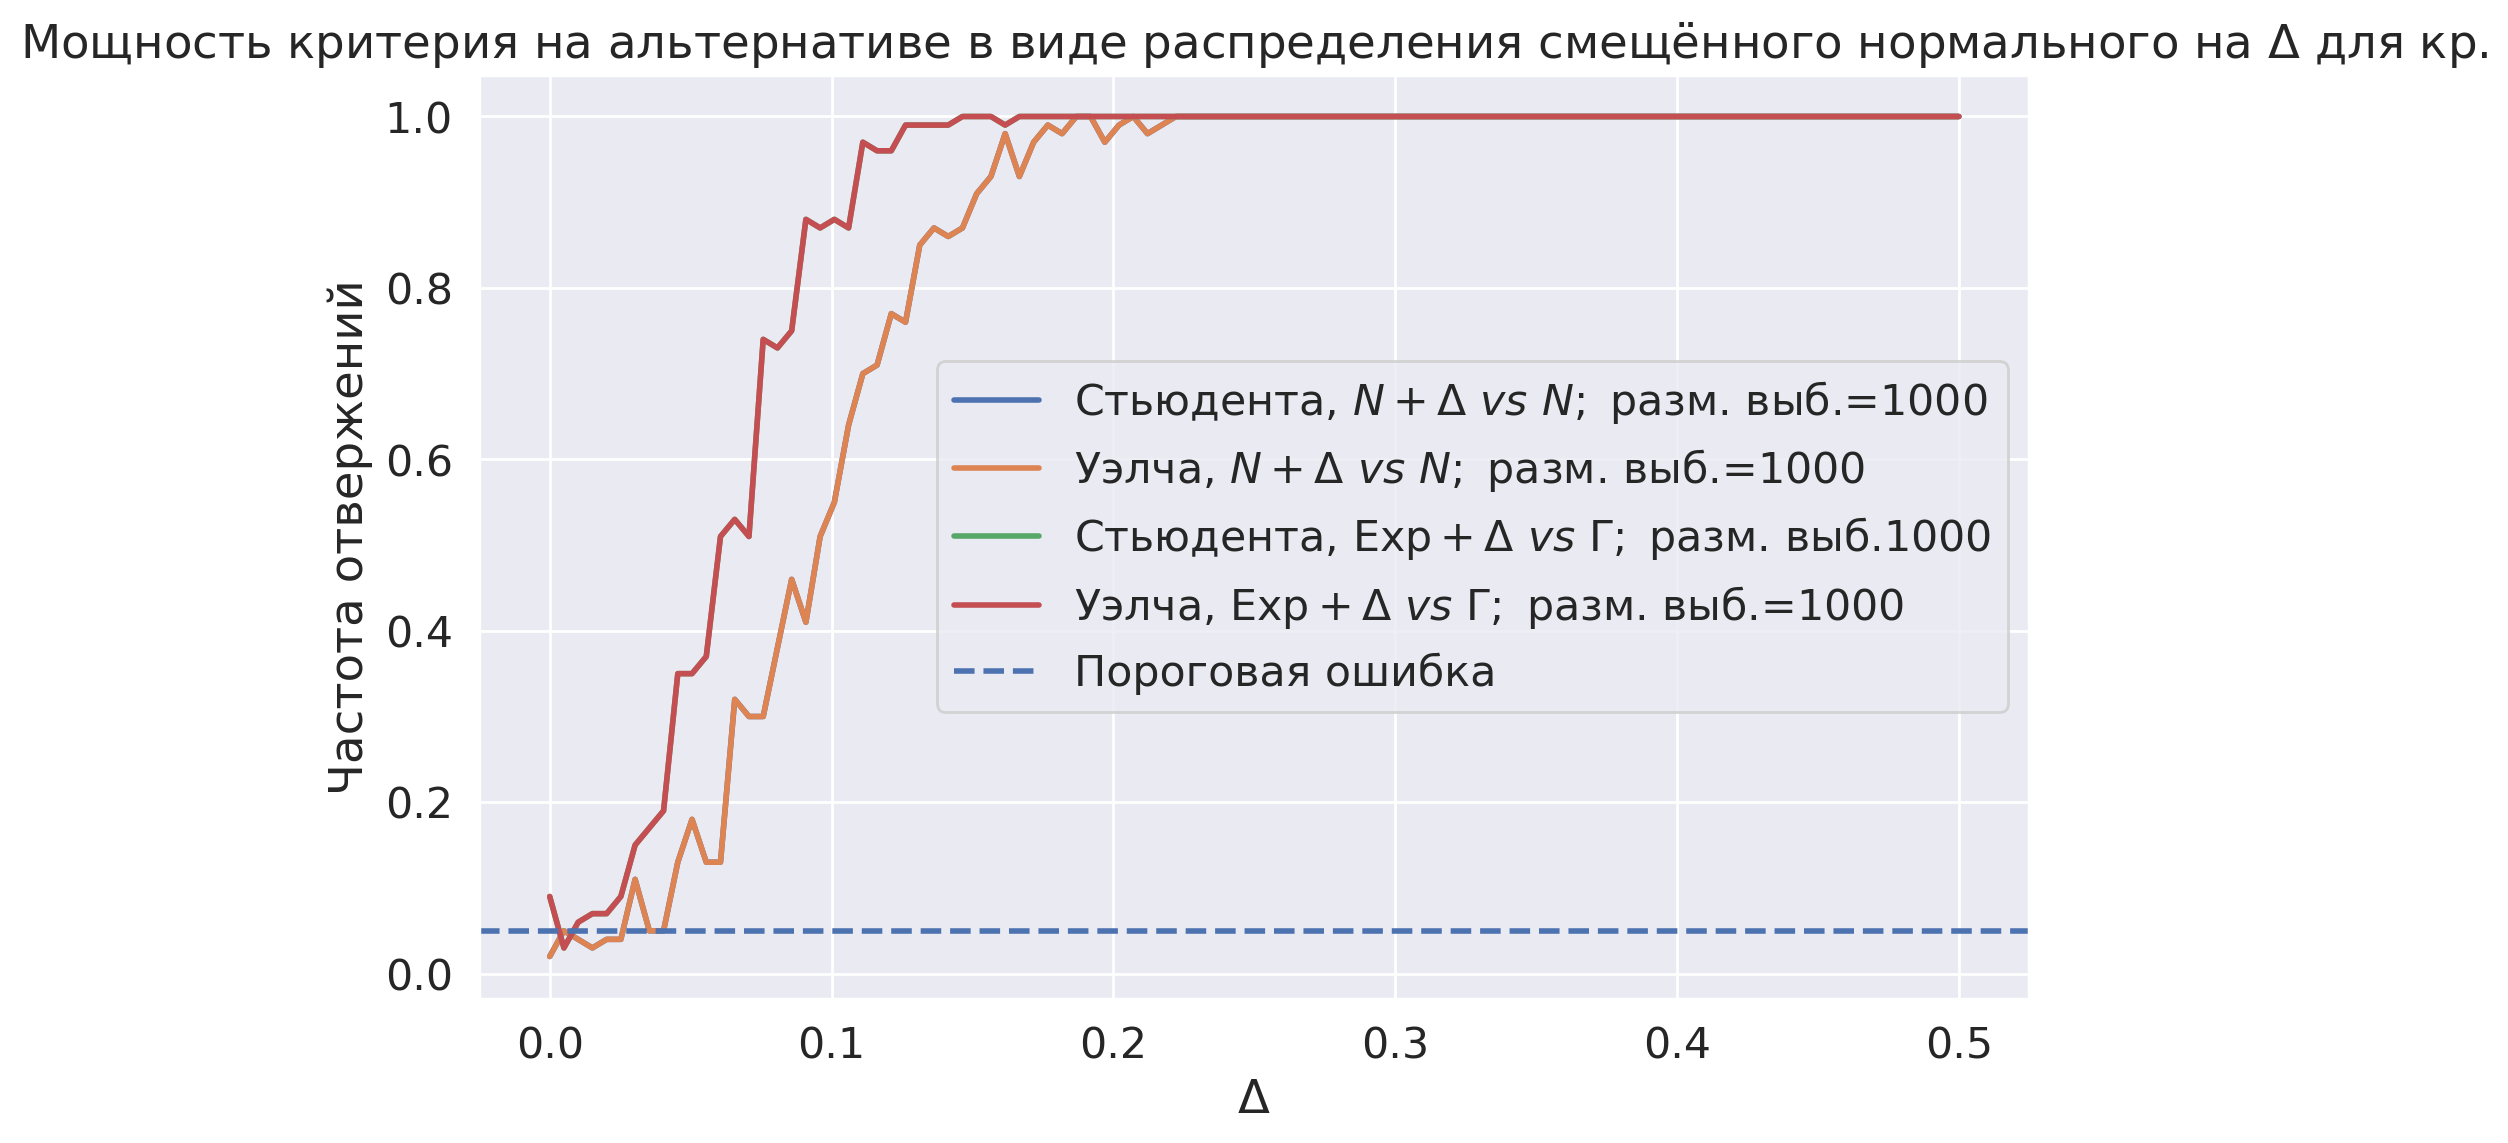

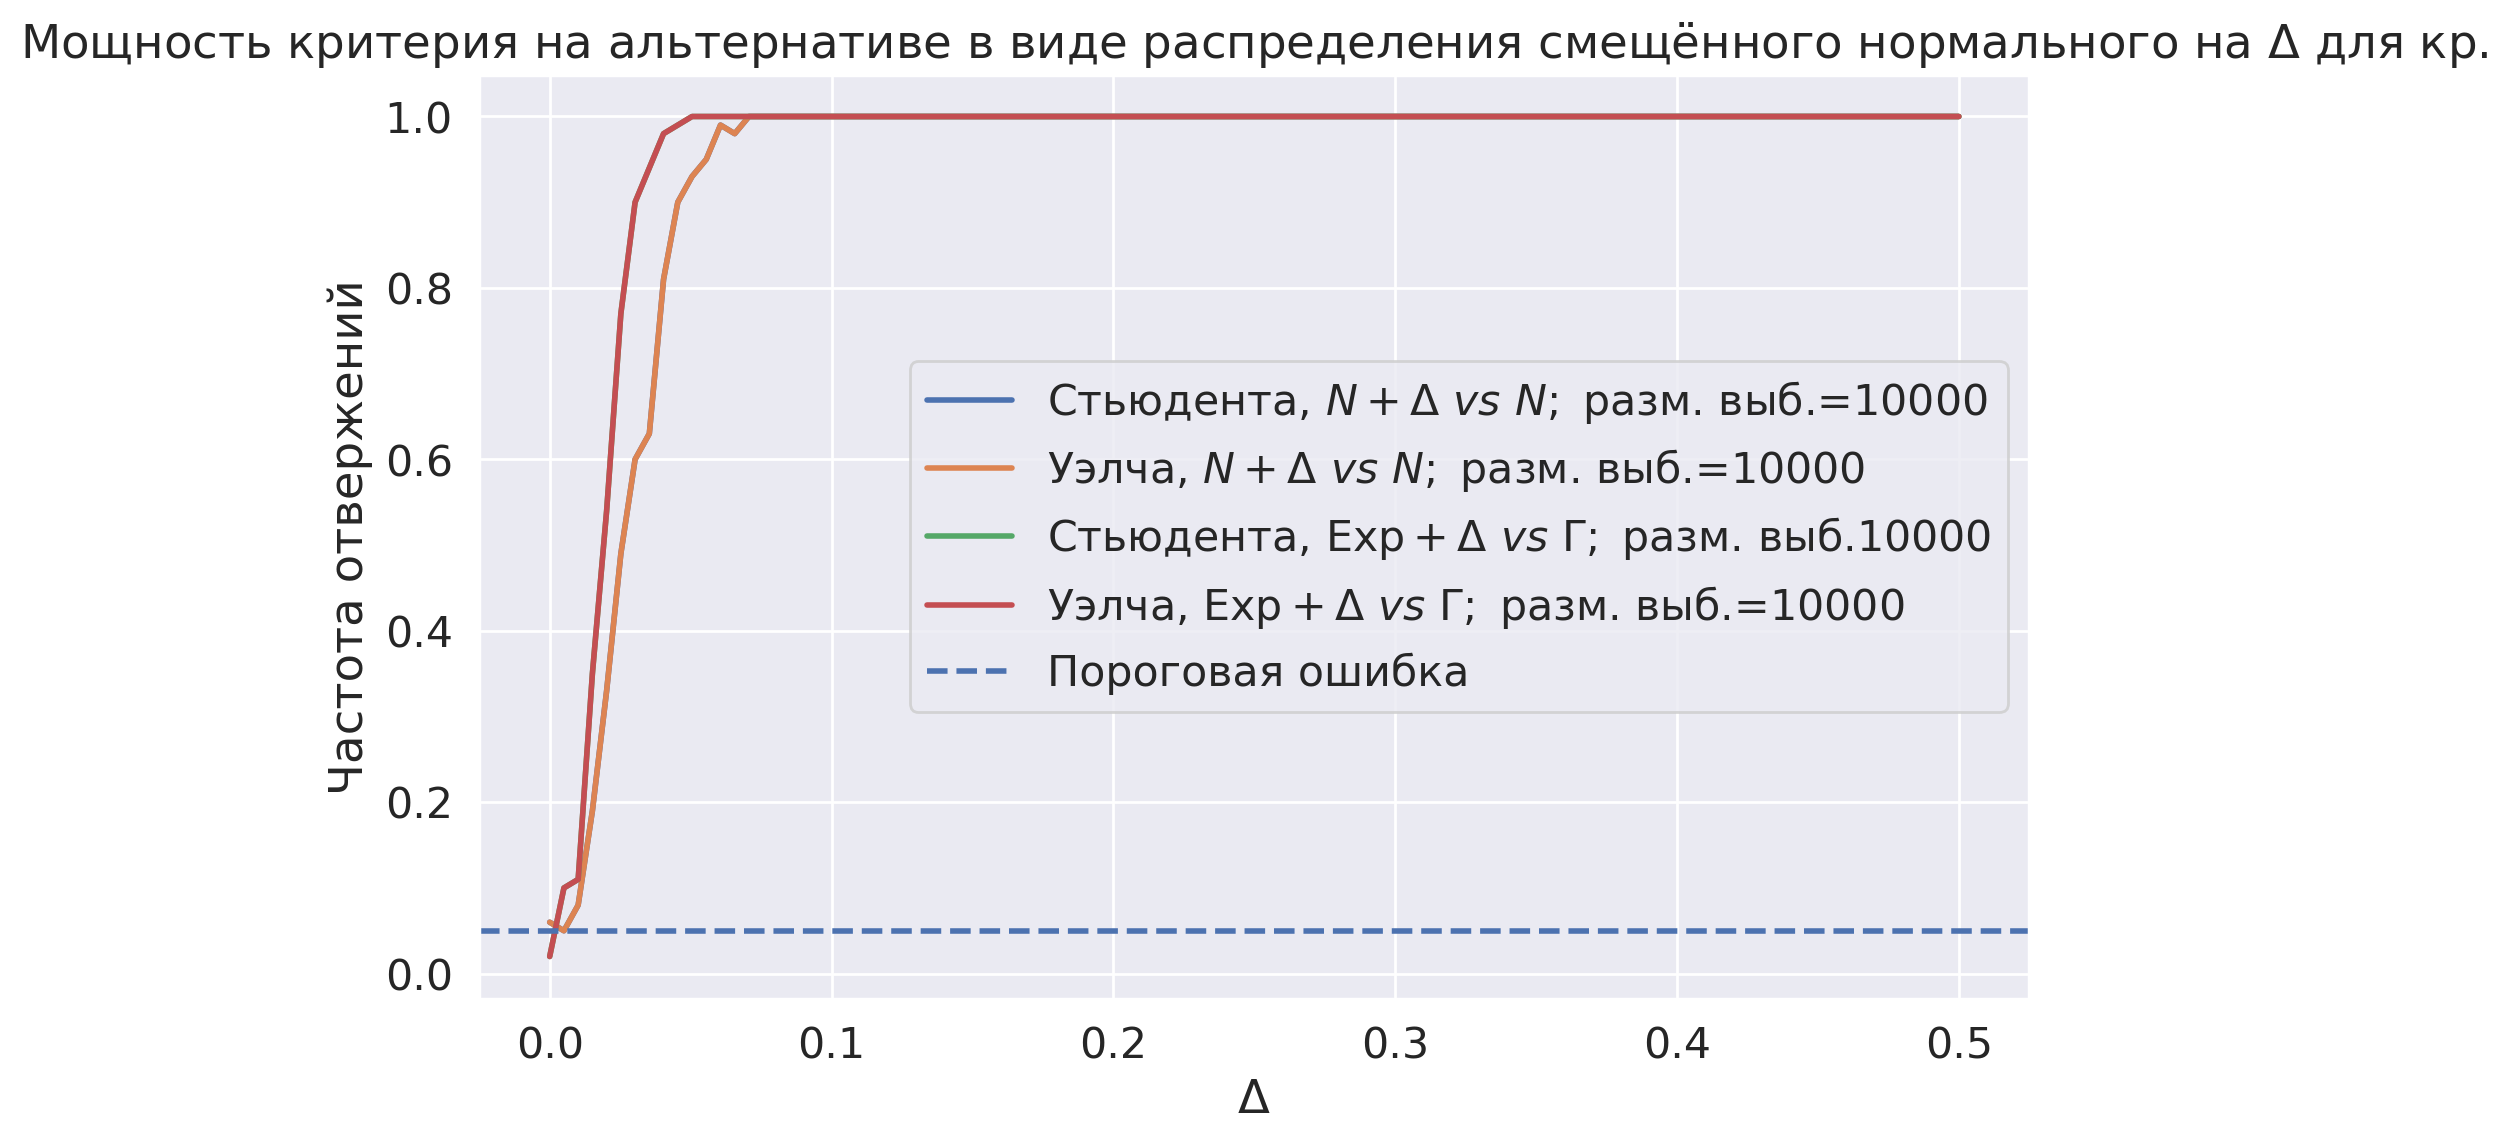

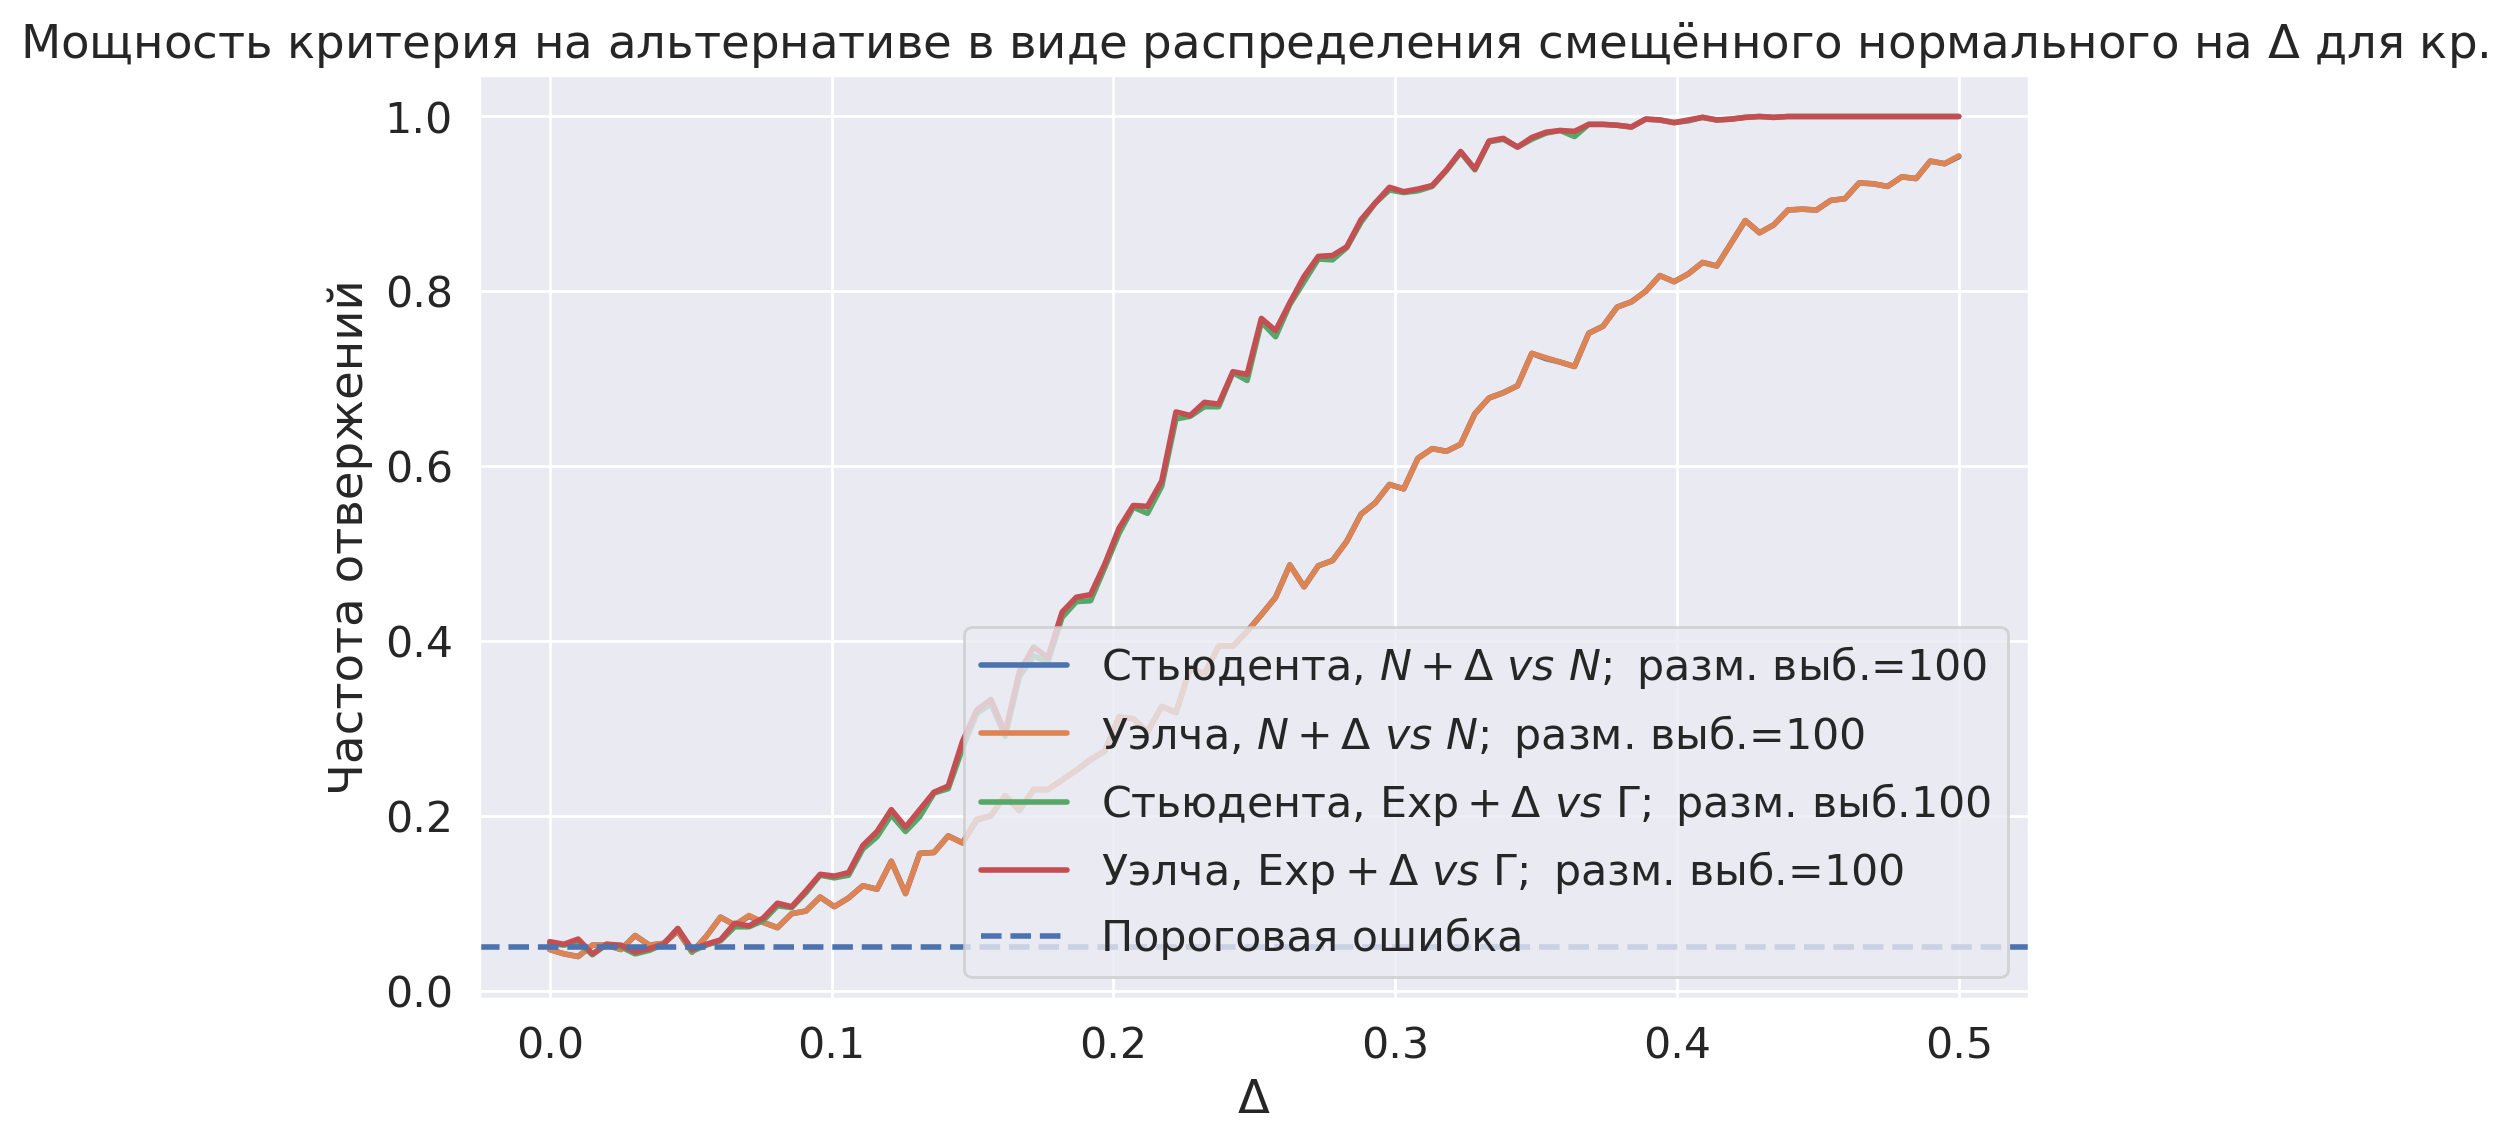

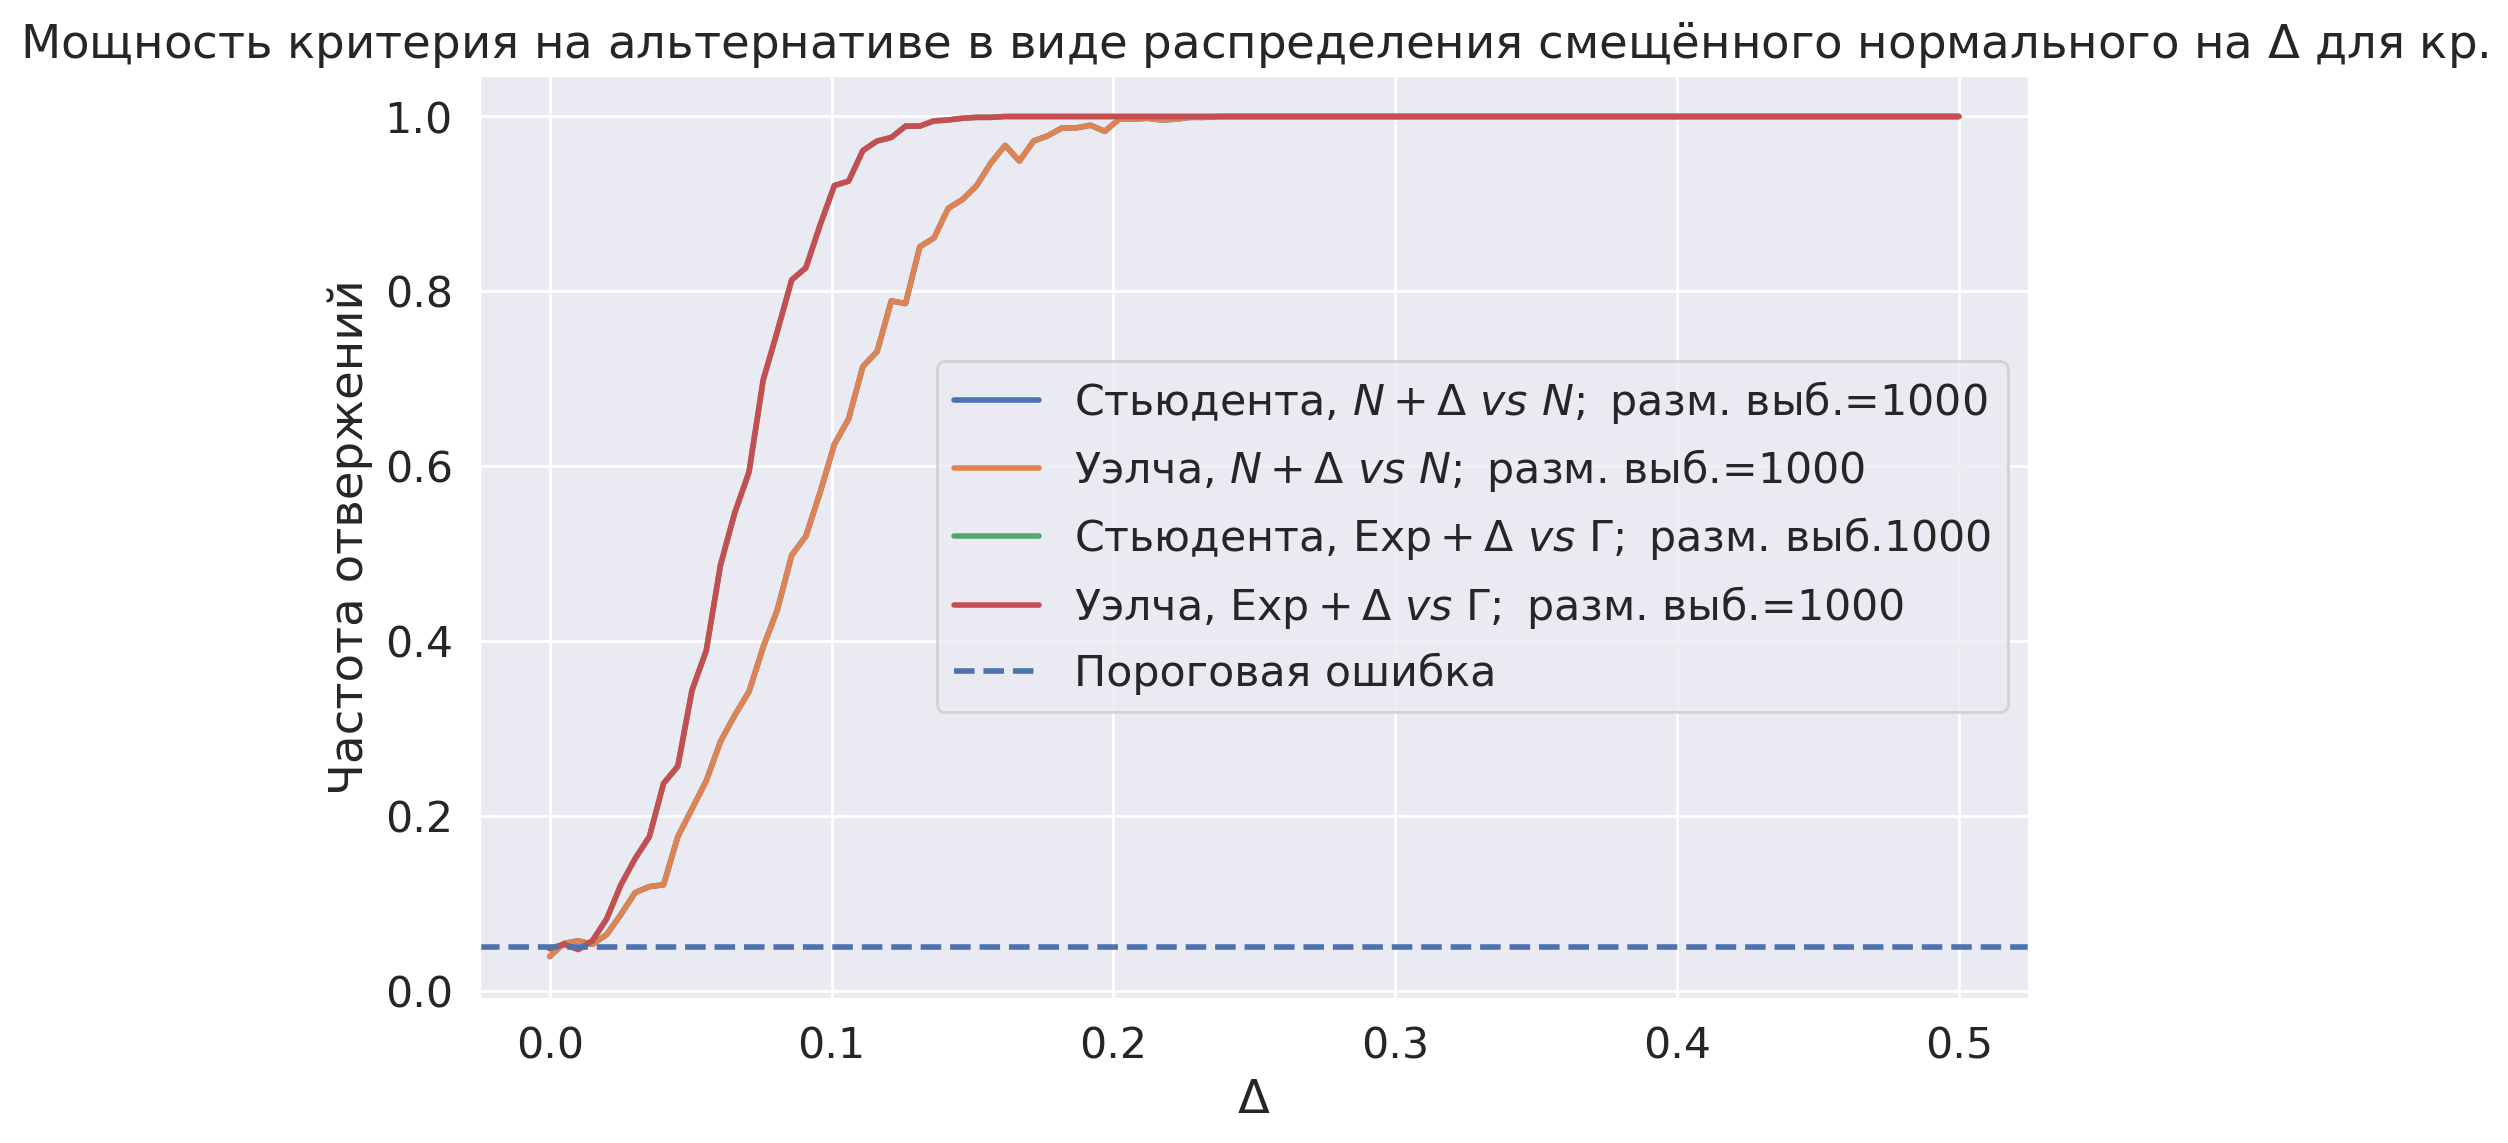

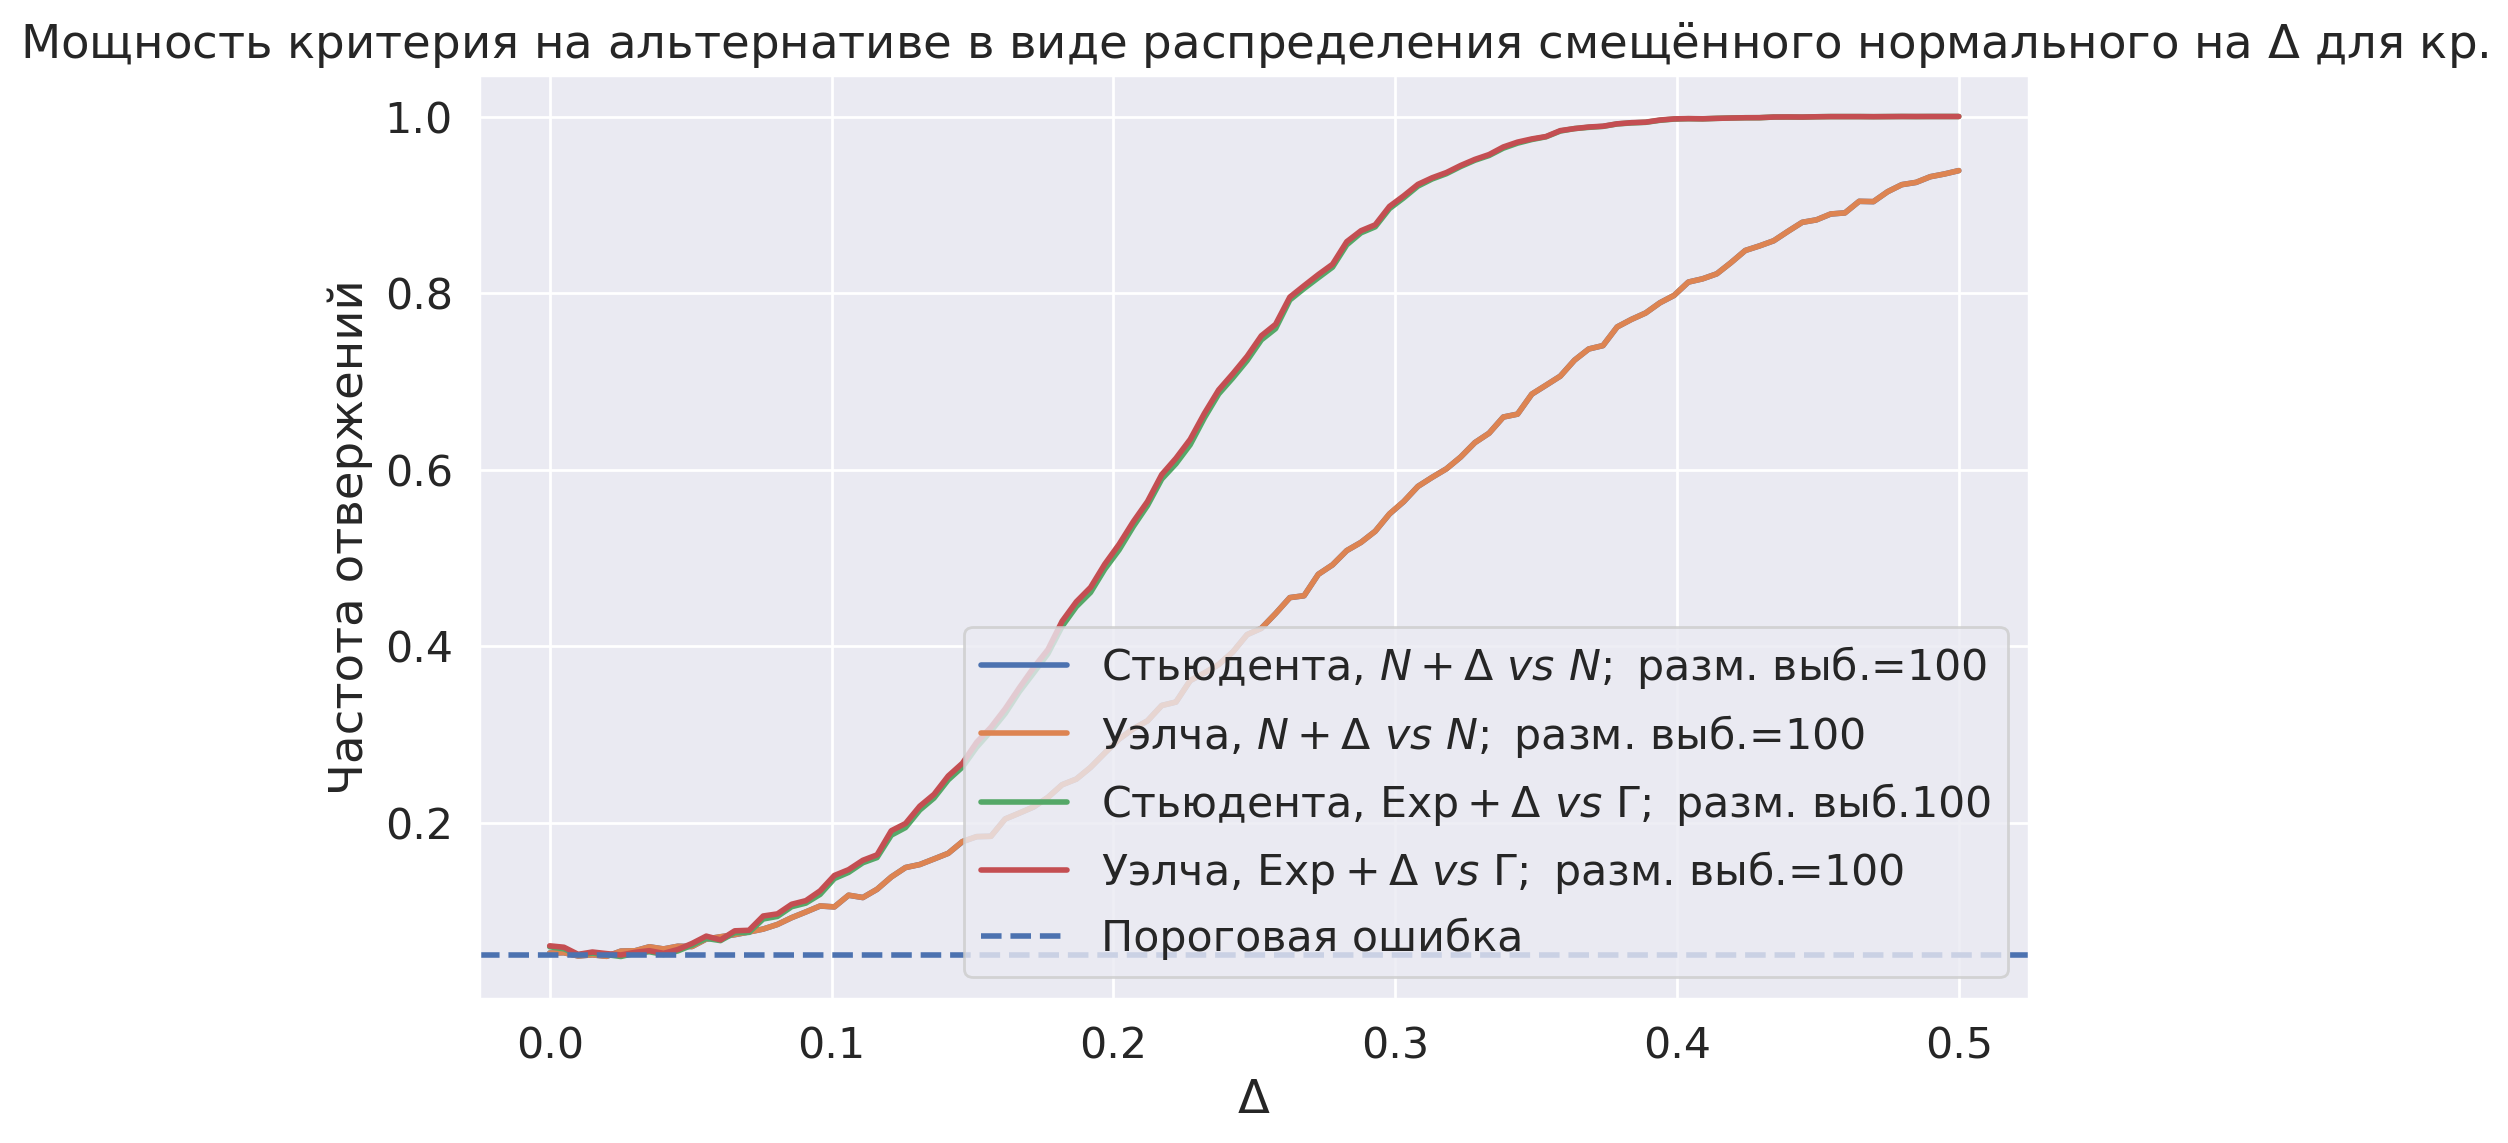

In [81]:
# для n = 100000 лучще не запускать (~20 гб оператики съест)

for N, SAMPLE_SIZE in ((100000, 20), (100000, 50), (100, 100), (100, 1000), (100, 10000), (1000, 100), (1000, 1000), (10000, 100)):
    K = 100

    deltas = np.linspace(0, 0.5, K)

    X = sps.norm(0, 1).rvs(size=(K, N, SAMPLE_SIZE)) + deltas[:, None, None]
    norm = sps.norm(0, 1).rvs((N, SAMPLE_SIZE))
    M = sps.expon(scale=1).rvs((K, N, SAMPLE_SIZE)); M = M - M.mean() + deltas[:, None, None]
    O = sps.pareto(b=100, scale=1).rvs((N, SAMPLE_SIZE)); O -= O.mean()

    pvalue_T = lambda X, Y, flag: sps.ttest_ind(X, Y[None, ...], axis=2, equal_var=flag).pvalue

    plt.figure(figsize=(10,6))
    plt.plot(deltas, np.sum(pvalue_T(X, norm, False) < ALPHA, axis=1) / N, lw=2, label=r"Стьюдента, $N+\Delta \ vs \ N; $ разм. выб.=" + str(SAMPLE_SIZE))
    plt.plot(deltas, np.sum(pvalue_T(X, norm, True) < ALPHA, axis=1) / N, lw=2, label=r"Уэлча, $N+\Delta \ vs \ N; $ разм. выб.=" + str(SAMPLE_SIZE))

    plt.plot(deltas, np.sum(pvalue_T(M, O, False) < ALPHA, axis=1) / N, lw=2, label=r"Стьюдента, $\mathrm{Exp}+\Delta \ vs \ \Gamma; $ разм. выб." + str(SAMPLE_SIZE))
    plt.plot(deltas, np.sum(pvalue_T(M, O, True) < ALPHA, axis=1) / N, lw=2, label=r"Уэлча, $\mathrm{Exp}+\Delta \ vs \ \Gamma; $ разм. выб.=" + str(SAMPLE_SIZE))
    
    plt.axhline(ALPHA, ls="--", lw=2, label="Пороговая ошибка")
    plt.title(r"Мощность критерия на альтернативе в виде распределения смещённого нормального на $\Delta$ для кр."); plt.xlabel(r"$\Delta$"); 
    plt.ylabel(r"Частота отвержений"); plt.legend(loc="best"); plt.grid(True)
    plt.show()

**Вывод:**

<font color="#ae69c9ff">

Йооооуу!! Получается, что вот это крайне мало отставание на первых друх графиках для экспоненциального и парето - и есть фундаментальное различие по мощности, которое мы хотели увидеть (+ вывод после первого пункта). Ну, прикольно...)

Критерии практически идентичны по мощности на выборках большого размера.

Виден явный тренд на зависимость способности отвержения смещённых выборок не толко от смещения, но и от количества элементов в выборке. Прикольно, есть предположение, что это из-за того, что критерий меняется как крень из размера выборки, а статистика Стьюдента больше походит на экспоненту.

_Я потратил на этот номер просто неприлично много времени из-за то-ли сложности темы, то-ли того, что вообще не очев было, что должно получиться/какаие теоремки используются. Пожалуйста, учтите это при проверке..._

4. *Это бонусный пункт*.

Как мы поняли ранее, для распределений, отличных от нормального, распределение pvalue при равенстве средних может быть далёким от равномерного. Можно, конечно, сдвинуть пороговое значение при проверке гипотезы, чтобы подправить вероятность ошибки I рода, но будет ли такой критерий достаточно мощным? Не стоит ли рассмотреть какую-нибудь другой критерий? В этом пункте мы рассмотрим такой, он называется *критерием отношения правдоподобий* (или сокращённо КОП).

Рассмотрим выборку $X_1, \ldots, X_n$, которая пришла из распределения $\mathsf{P}_{\theta}$ с совместной плотностью $\rho_{\theta}(\mathbf x)$, параметризованного неким $\theta$ из открытого $\Theta \subset \mathbb{R}^k$. Поставим на проверку гипотезу $H_0\colon \theta \in \Theta_0$, где $\Theta_0 \subset \Theta$ --- поверхность размерности $l$. Простой пример такой гипотезы -- $H_0\colon \theta_1 = \ldots = \theta_{k-l} = 0$, но вообще $\Theta_0$ может быть произвольной гладкой поверхностью. КОП предлагает рассмотреть статистику
$$
LR(\mathbf X) = \frac{\sup_{\theta \in \Theta} \rho_{\theta}(\mathbf X)}{\sup_{\theta \in \Theta_0} \rho_{\theta}(\mathbf X)}.
$$

Своего рода она показывает, насколько общее правдоподобие выше частного, и если разрыв между ними очень большой, то критерий будет отвергать гипотезу $H_0$. Оказывается, что в некоторых условиях регулярности справедлив следующий асимптотический результат, называемый *теоремой Уилкса*:
$$
\forall \theta \in \Theta_0\colon 2 \ln LR(\mathbf X) \stackrel{d_\theta}{\to} \chi^2_{k-l}.
$$

Таким образом, критерий вида $\{\mathbf x\colon 2 \ln LR(\mathbf x) > \chi^2_{k-l,1-\alpha}\}$ будет иметь асимптотический уровень значимости $\alpha$. Применим его к проверке равенства средних, но для совсем другого семейства распределений, например, Коши.

<font color="#ae69c9ff">

Как будто бы очередность пунктов поехала. Имхо сначала нужно рассказать про k и l, а после бежать считать статистики. Переставил.

Сформулируйте постановку задачи и гипотезу на языке КОП. Чему будет равно $k$ и $l$?

**Ответ:**

<font color="#ae69c9ff">

Первое, что должно было смутить студента (т.е. меня) - это то, что критерий хавает только 1 выборку, а мы хотим запихать в него много более. Собственно, тем он и приколен, получается. Получается, что: $\Theta = (\mu_1, \mu_2)^\top, \Theta_o = (\mu, \mu)^\top$, ибо в общей моделе нам неизвестным матожи распр. Коши, а при нулевой гипотезе известно хотя бы то, что они совпадают. 

Итог: постановка задачи строчкой выше должна быть корректна, ибо:
$$\sup_{\theta \in \Theta}\rho_\theta(X) = \sup_{(\mu_1, \mu_2)^\top}\rho_\theta(X) = \sup_{\mu_1}\prod_{i=1}^n \rho(x_i) \cdot \sup_{\mu_2}\prod_{i=1}^m \rho(y_i), \ \text{где} \ (x_1, \dots, x_n, y_1, \dots, y_m)^\top = (X^\top, Y^\top)^\top,$$
ну, а для знаменателя: 
$$\sup_{\theta \in \Theta_0}\rho_\theta(X) = \sup_{\mu}\prod_{i=1}^{n+m}\rho(x_i), \ \text{где} \ (x_1, \dots, x_{n+m})^\top = (X^\top, Y^\top)^\top,$$
т.о. $k=2, l=1$. Живём в мире, где X, Y в конце - это уже наши выборки, которые будут скормлены критерию

Пусть $X_1, \ldots, X_n \sim \mathrm{Cauchy}(\mu_1, \sigma)$, $Y_1, \ldots, Y_m \sim \mathrm{Cauchy}(\mu_2, \sigma)$ --- две независимые выборки (для удобства возьмём $n=m=30$). Проверим гипотезу $H_0\colon \mu_1 = \mu_2$. Просэмплируйте много выборок при верности нулевой гипотезы, промоделируйте распределение статистики t-критерия и подберите такой порог $c$, чтобы критерий $\{(\mathbf x, \mathbf y)\colon |T(\mathbf x, \mathbf y)| > c\}$ имел уровень значимости примерно $\alpha$.

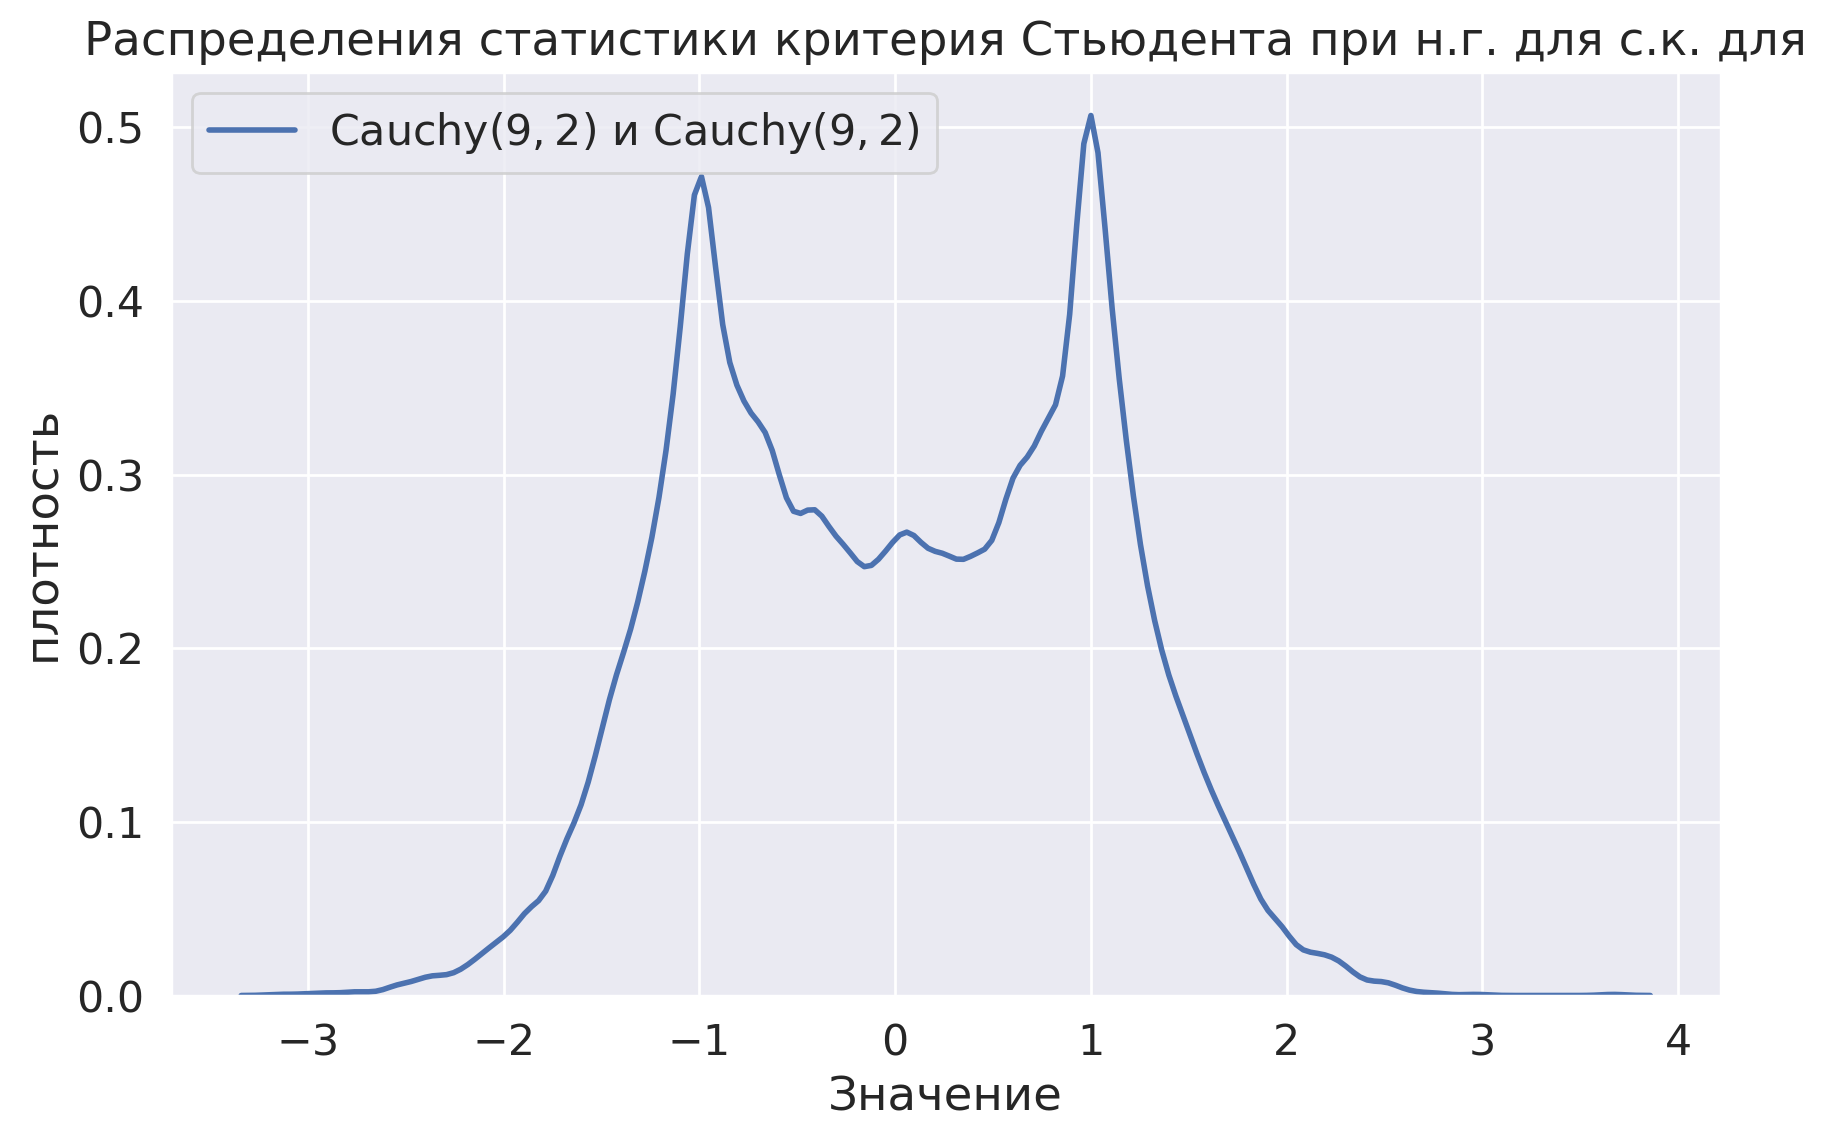

Уровень значимости критерия Стьюдента $\{(\mathbf x, \mathbf y)\colon |T(\mathbf x, \mathbf y)| > c\}$:  0.0504


In [82]:
X0 = 9
SCALE = 1
N = 10000
SAMPLE_SIZE = 30

X = sps.cauchy(loc=X0, scale=SCALE).rvs((N, SAMPLE_SIZE))
Y = sps.cauchy(loc=X0, scale=SCALE).rvs((N, SAMPLE_SIZE))

stat = lambda X, Y: sps.ttest_ind(X, Y, axis=1, equal_var=True).statistic

plt.figure(figsize=(10,6))
sns.kdeplot(stat(X, Y), lw=2, label=r"$\mathrm{Cauchy}(9, 2)$ и $\mathrm{Cauchy}(9, 2)$", bw_adjust=0.4)
plt.title(fr"Распределения статистики критерия Стьюдента при н.г. для с.к. для"); plt.xlabel("Значение"); plt.ylabel(r"плотность"); plt.legend(loc="best"); plt.grid(True)
plt.show()

print(r"Уровень значимости критерия Стьюдента $\{(\mathbf x, \mathbf y)\colon |T(\mathbf x, \mathbf y)| > c\}$: ", np.sum(stat(X, Y) > 1.525) / N) # ну не повезло латеху, конечно

<font color="#ae69c9ff">

Да, мне есть, что сказать по этому поводу:

![image.png](honest_reaction.png)

Пойду ещё раз перепишу вывод к предыдущему заданию. АХАХХАХАХ, оно того стоило (мем добавил)

<font color="#ae69c9ff">

Распределение статистики Стьюдента на двух Коши с одинаковыми параметрами имеет предельное распределение (что оно называется U-образным - верим стене болтая), так что будет весьма корректным подобрать параметр и на его основе построить критерий. 

Научитесь численно решать задачу оптимизации, которая возникает при нахождении статистики $LR(\mathbf X)$, и реализуйте её. Для всех пар выборок посчитайте эту статистику и визуализируйте распределение pvalue, посчитанное на основе теоремы Уилкса. Похоже ли оно на равномерное? Контролируется ли ошибка I рода у критерия уровня значимости 0.05?

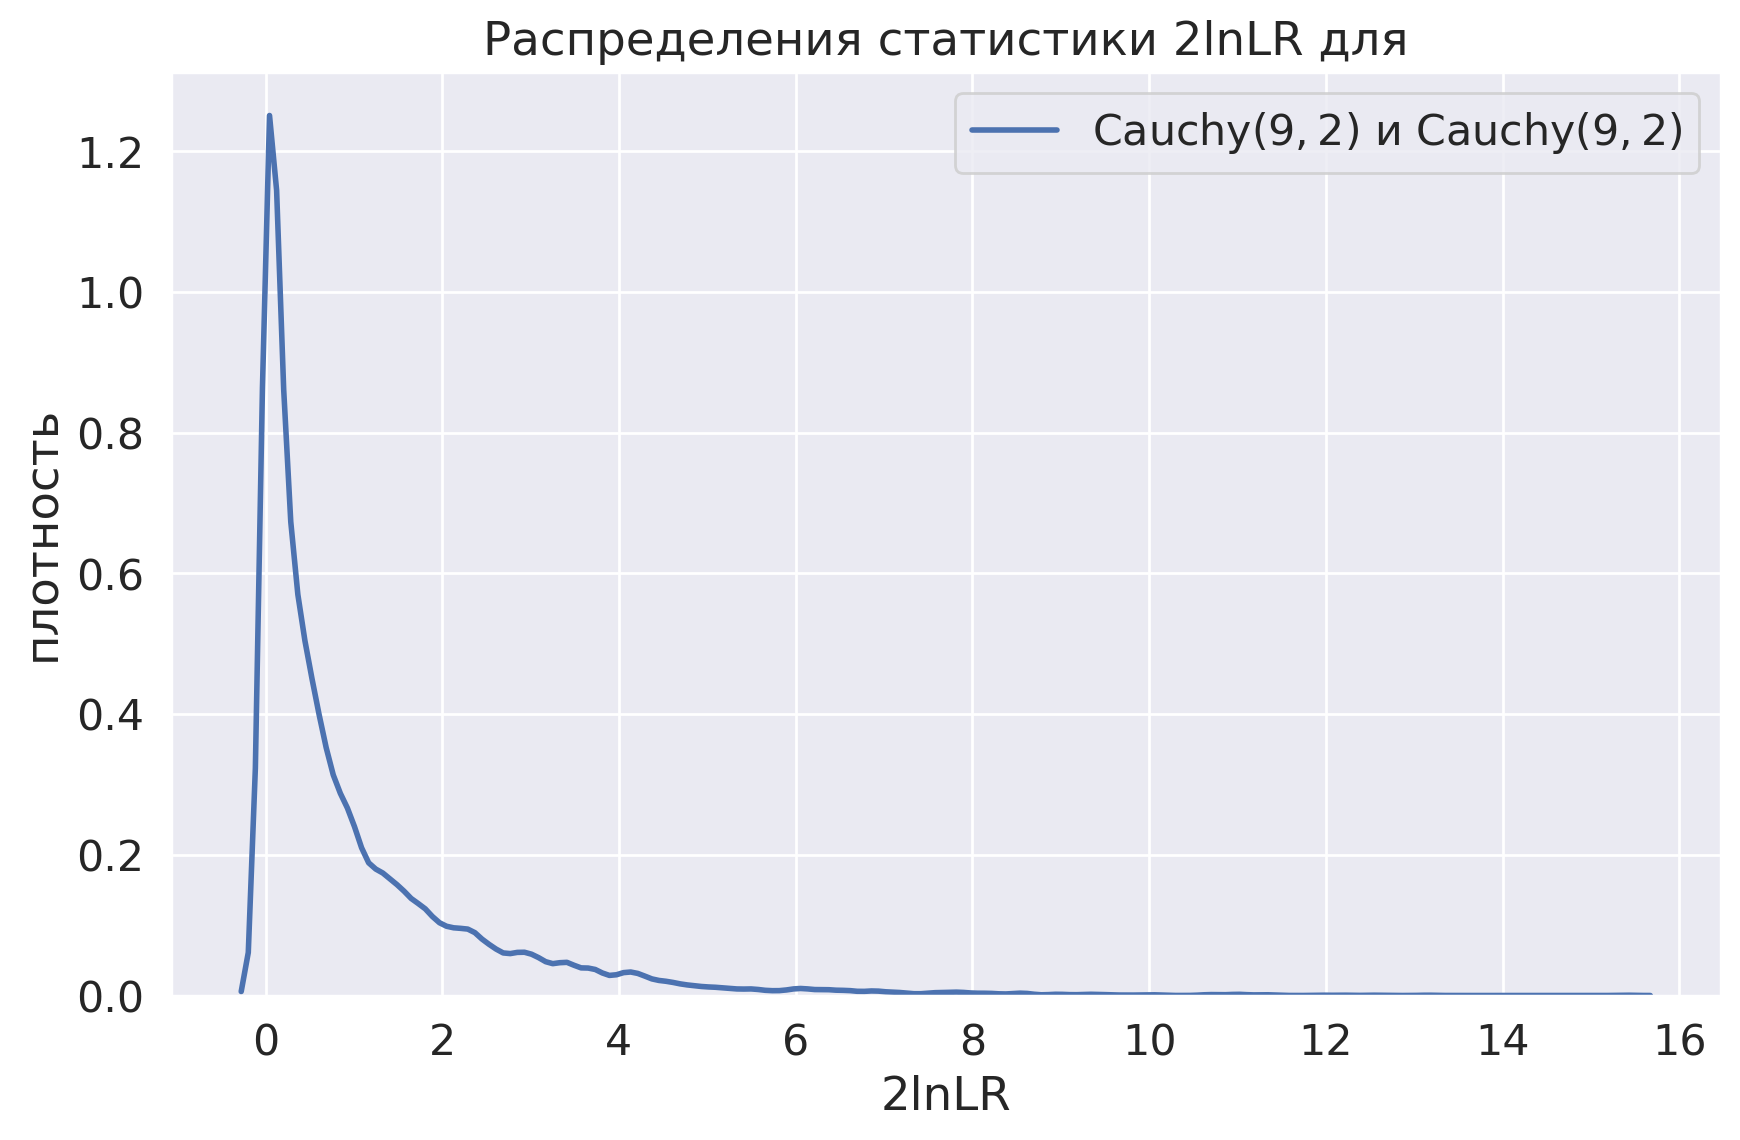

Уровень значимости критерия Стьюдента $\{(\mathbf x, \mathbf y)\colon |T(\mathbf x, \mathbf y)| > c\}$:  0.0522


In [35]:
def p(theta, x):
    t = np.asarray(theta).item()
    return 1 / (np.pi * (1 + (x - t) ** 2))

def dp(theta, x):
    t = np.asarray(theta).item()
    return 2 * (x - theta) / (np.pi * (1 + (x - t) ** 2) ** 2)

def f(theta, X):
    t = np.asarray(theta).item()
    return -np.sum(np.log(p(t, X))), dl(t, X)

def dl(theta, X):
    t = np.asarray(theta).item()
    return -np.sum(dp(t, X) / p(t, X))

# print(spo.minimize(fun=f, jac=True, args=(X[0],), x0=8))

lnLR = 2.0 * (np.array([spo.minimize(fun=f, jac=True, args=(np.concatenate((X[i], Y[i])),), x0=np.median(X)).fun for i in range(N)]) - 
              np.array([spo.minimize(fun=f, jac=True, args=(X[i],), x0=np.median(X)).fun for i in range(N)]) -
              np.array([spo.minimize(fun=f, jac=True, args=(Y[i],), x0=np.median(Y)).fun for i in range(N)]))

k = sps.chi2(df=1).ppf(1-ALPHA)


plt.figure(figsize=(10,6))
sns.kdeplot(lnLR, lw=2, label=r"$\mathrm{Cauchy}(9, 2)$ и $\mathrm{Cauchy}(9, 2)$", bw_adjust=0.4)
plt.title(fr"Распределения статистики 2lnLR для"); plt.xlabel("2lnLR"); plt.ylabel(r"плотность"); plt.legend(loc="best"); plt.grid(True)
plt.show()

print(r"Уровень значимости критерия Стьюдента $\{(\mathbf x, \mathbf y)\colon |T(\mathbf x, \mathbf y)| > c\}$: ", np.sum(lnLR > k) / N)

<font color="#ae69c9ff">

На равномерное распределение совершенно не похоже, смахивает на экспоненциальное. Уровень значимости критерия примерно ALPHA (что и ожидалось)

Сравним два полученных критерия по мощности. Для этого, аналогично пункту 3, оцените вероятность отвержения нулевой гипотезы для разных сдвигов $\Delta$. Учтите, что эта процедура может длиться ОЧЕНЬ долго. Заранее подумайте, как оптимизировать вычисления, не считать что-либо по нескольку раз и т.д.

<font color="#ae69c9ff">

Предлагаю внимательно присмотреться к тому, что мы вообще считаем: и в числителе, и в знаменателе в явном виде лог-правдоподобие для распределения Коши от выборок (просто в знаменателе выборка в 2 раза больше). Как мы убедились в первом праке, это почти медиана, а медиана уже есть линейная функция. 

Получается, для числителя `lnLR`, т.е. $\sup_{\mu_1}\prod_{i=1}^n \rho(x_i)$ - вообще всё просто: посчитали 1 раз `spo.minimize(...).x`, после для каждого $\Delta$ считаем `f(spo.minimize(...).x + $\Delta$, X)`

Со знаменателем так в принципе не получится, увы

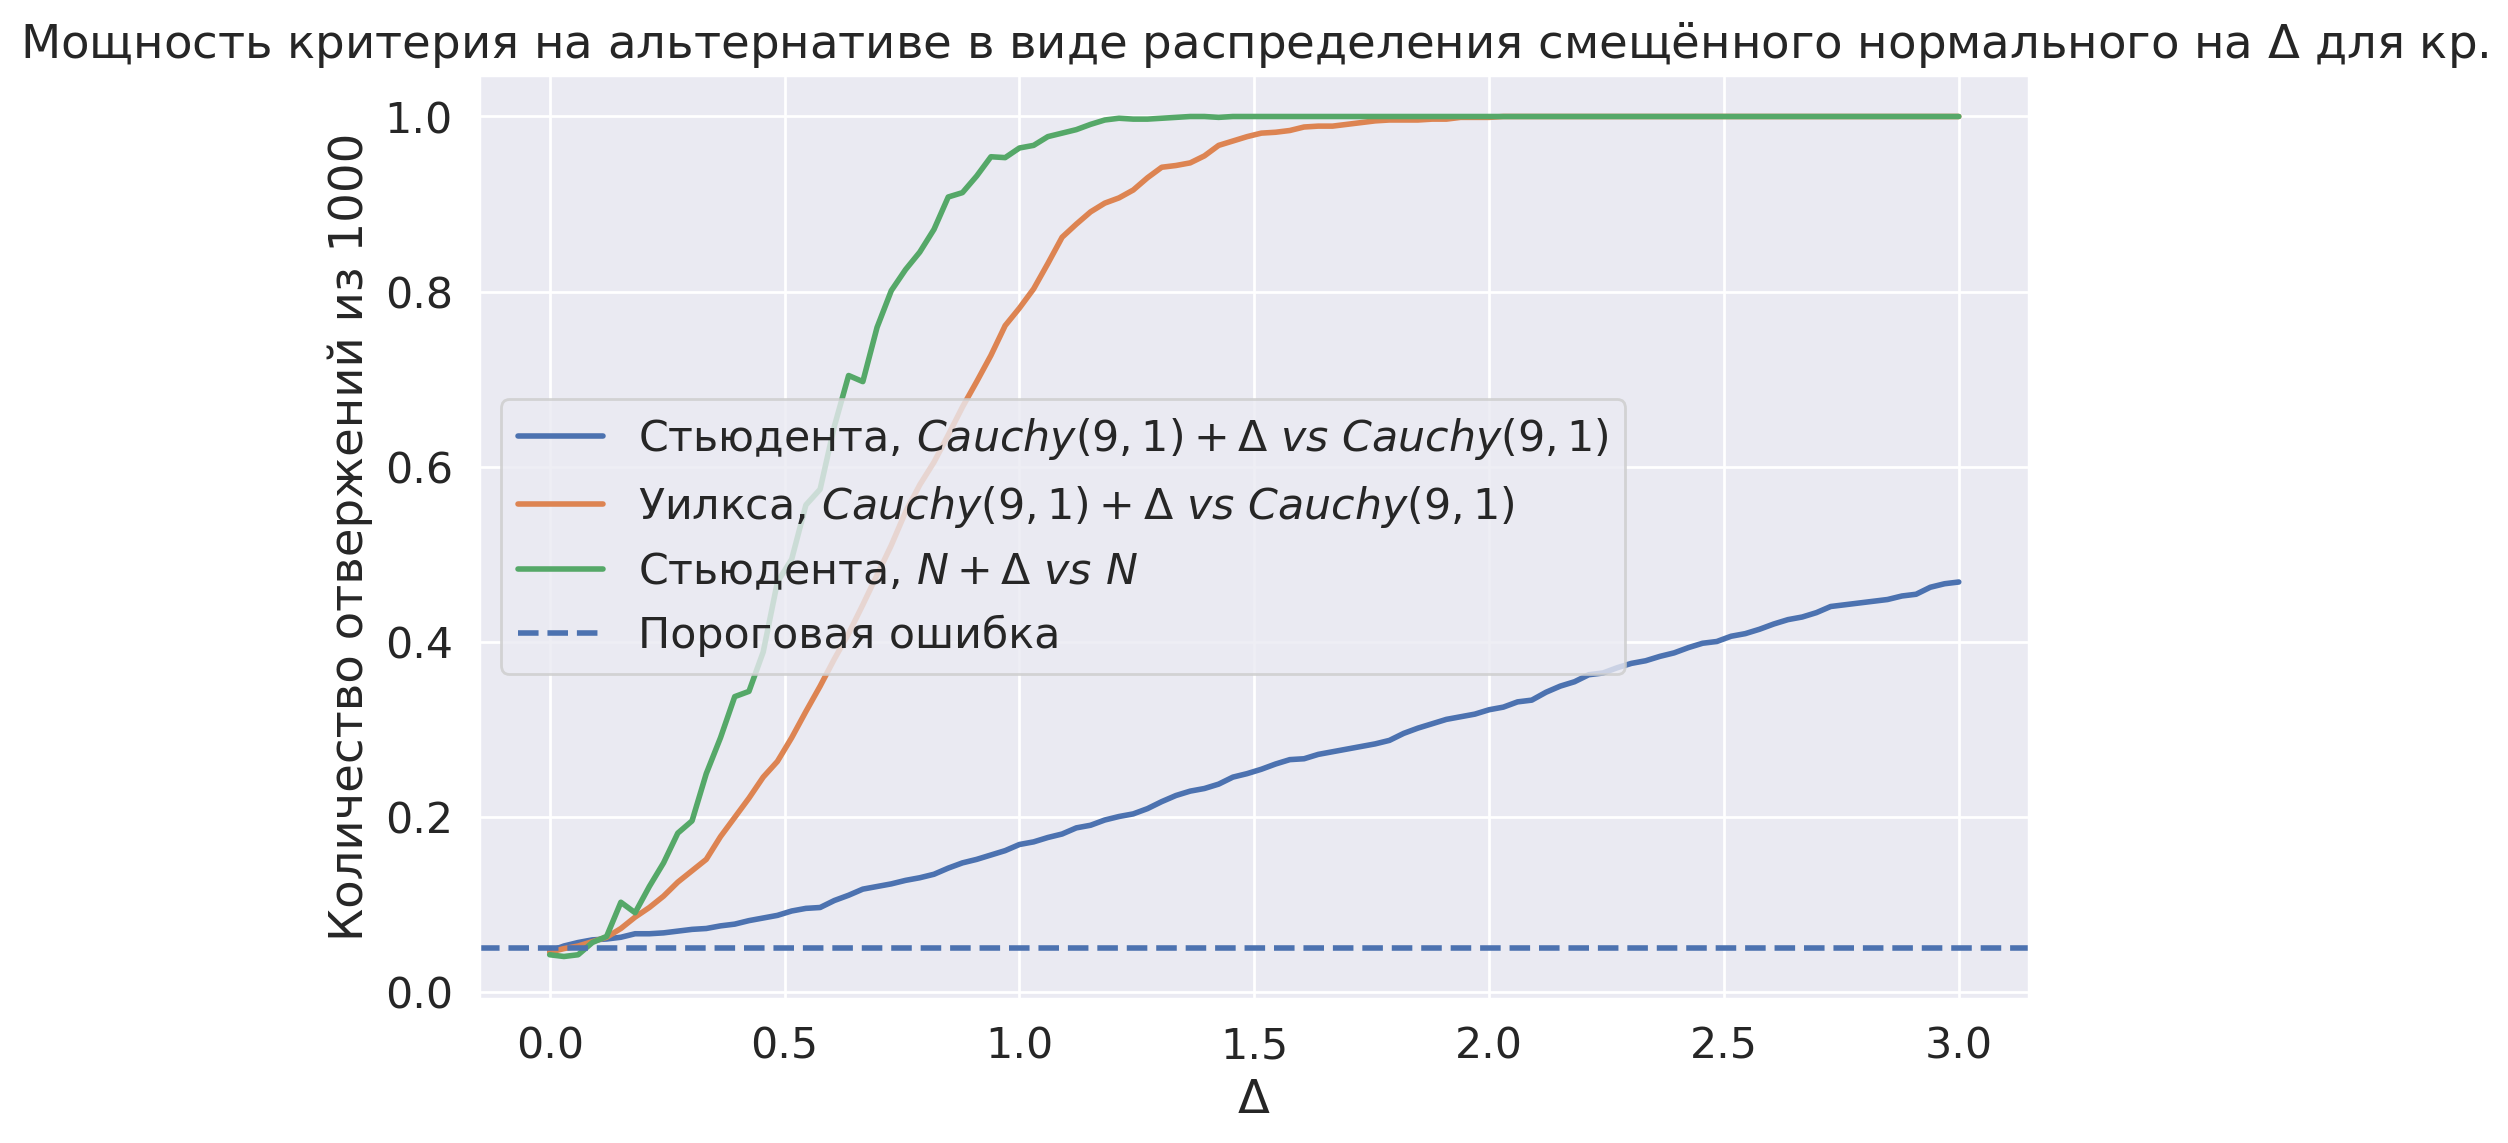

In [ ]:
N = 1000
K = 100
deltas = np.linspace(0, 3, K)

X = sps.cauchy(loc=X0, scale=SCALE).rvs((N, SAMPLE_SIZE))
Y = sps.cauchy(loc=X0, scale=SCALE).rvs((N, SAMPLE_SIZE))

X = np.repeat(X[None, :, :], K, axis=0) # Ну это, конечно, просто преступление, зато ускоримся в ~2 раза
Y = np.repeat(Y[None, :, :], K, axis=0)

X_hat = np.array([spo.minimize(fun=f, jac=True, args=(X[0, i, :],), x0=np.median(X)).x[0] for i in range(N)]) + deltas[:, None]
Y_hat = np.array([spo.minimize(fun=f, jac=True, args=(Y[0, i, :],), x0=np.median(Y)).x[0] for i in range(N)])

X += deltas[:, None, None]

numerator = 2 * SAMPLE_SIZE * np.log(np.pi / SCALE) + (np.sum(np.log(SCALE**2 + (X_hat[:, :, None] - X)**2), axis=2) + np.sum(np.log(SCALE**2 + (Y_hat[None, :, None] - Y)**2), axis=2))
denomerator = np.array([np.array([spo.minimize(fun=f, jac=True, args=(np.concatenate((X[j, i, :], Y[j, i, :])),), x0=np.median(X)).fun for i in range(N)]) for j in range(K)])
lnLR = 2 * (denomerator - numerator)

M = sps.norm(0, 1).rvs((K, N, SAMPLE_SIZE)); M = M + deltas[:, None, None]
O = sps.norm(0, 1).rvs((K, N, SAMPLE_SIZE))

pvalue_T = lambda X, Y, flag: sps.ttest_ind(X, Y, axis=2, equal_var=flag).pvalue
stat = lambda X, Y: sps.ttest_ind(X, Y, axis=2, equal_var=True).statistic
k = sps.chi2(df=1).ppf(1-ALPHA)

plt.figure(figsize=(10,6))
plt.plot(deltas, np.sum(stat(X, Y) > 1.525, axis=1) / N, lw=2, label=r"Стьюдента, $Cauchy(9,1)+\Delta \ vs \ Cauchy(9,1)$")
plt.plot(deltas, np.sum(lnLR > k, axis=1) / N, lw=2, label=r"Уилкса, $Cauchy(9,1)+\Delta \ vs \ Cauchy(9,1)$")

plt.plot(deltas, np.sum(pvalue_T(M, O, False) < ALPHA, axis=1) / N, lw=2, label=r"Стьюдента, $N+\Delta \ vs \ N$") # Я ошибся, это тест Уэлча

plt.axhline(ALPHA, ls="--", lw=2, label="Пороговая ошибка")
plt.title(r"Мощность критерия на альтернативе в виде распределения смещённого нормального на $\Delta$ для кр."); plt.xlabel(r"$\Delta$"); 
plt.ylabel(r"Количество отвержений из " + str(N)); plt.legend(loc="best"); plt.grid(True) # Правильно - "Частота отвержений". Ранилось 36 минут, я не успею перезапустить
plt.show()

Сделайте вывод.

**Вывод:**

<font color="#ae69c9ff">

~~Я больше не хочу делать этот прак.~~ Моралшь истории проста: после пары часов дебага одной строчки возникает естественное желание писать простые маленькие функции для подсчёта промежуточных результатов, вместо дебага вот этого крокодила.

Ну и да. Критерий Уилсона потрясающе хорошо отработал. Здорово, классно, можно пользоваться. Добавил ещё на график Уэлча для нормальных, чтобы как-то сравнить их между собой, но вышло не очень репрезентативно, ибо и распределения разные, и критерии разные (а Уилкса для нормального писать че-то пока не хочется).

<font color='red'>

3.4 после подсчета LR статистик нужно было построить график pvalue, а не плотности lnLR (-1)

<font color='red'>

3. 22/25

## Задача 4. Практическая задача

*Данная задача стоит 10 баллов.*

Есть датасет: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

In [210]:
df = pd.read_csv('StudentPerformanceFactors.csv')

Нас будут интересовать следующие колонки:

In [211]:
interesting_cat = 'Extracurricular_Activities'
interesting_num_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Physical_Activity']
target_col = 'Exam_Score'

### Часть 1

Прежде чем делать какие-либо выводы, необходимо изучить распределения ключевых количественных переменных.

1.  Для всех количественных переменных (`Hours_Studied`, `Attendance`, `Sleep_Hours`, `Previous_Scores`, `Physical_Activity`, `Exam_Score`) постройте гистограммы и QQ плоты. Визуально оцените, похожи ли их распределения на нормальное.
2.  Для каждой из этих переменных проведите стат. тест на нормальность. В качестве критерия возьмите тот, который ранее фигурировал в ноутбуке и пригоден для проверки такой гипотезы.
3.  Сделайте выводы о нормальности распределения для каждой фичи.

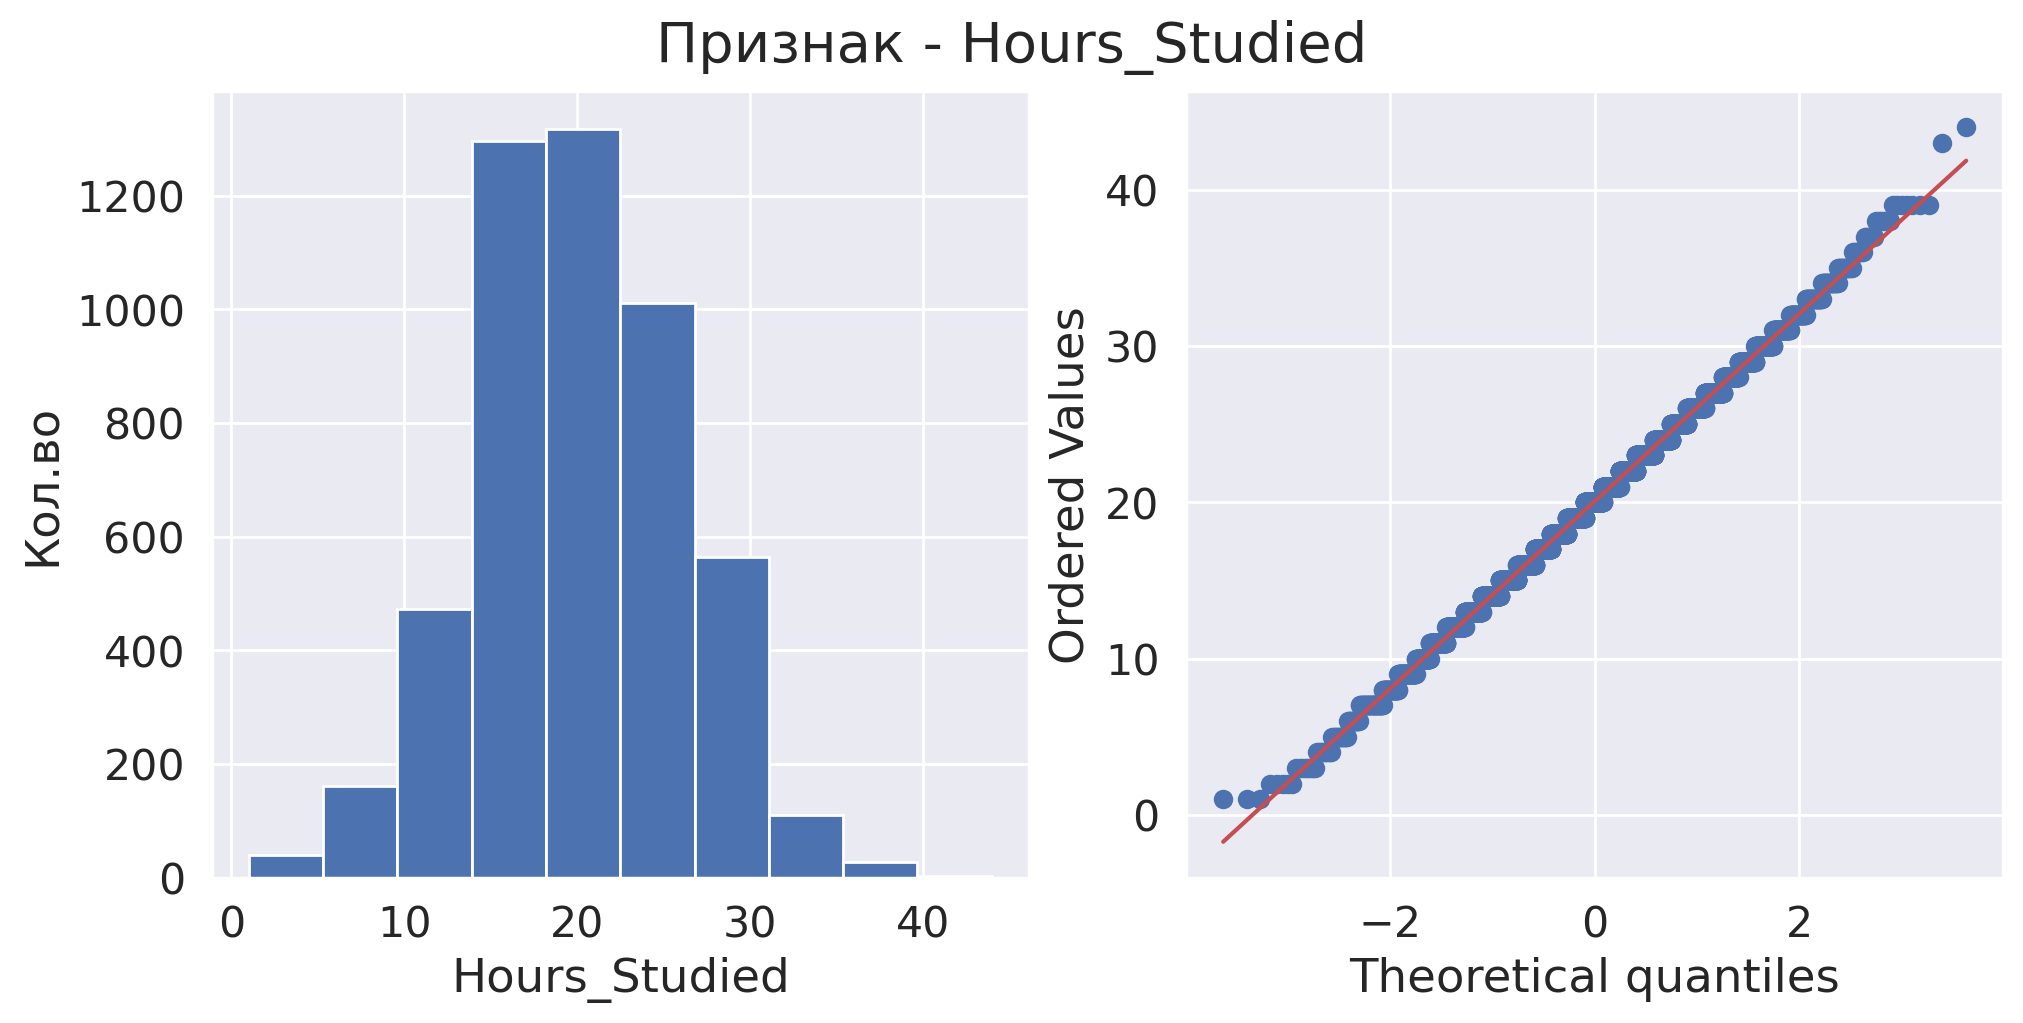

1.2173338520746353e-07
Стат. тест Шапиро-уилса показал, что распр. признака Hours_Studied не может являться нормальным
D'Agostino's K-squared test показал, что распр. признака Hours_Studied может являться нормальным


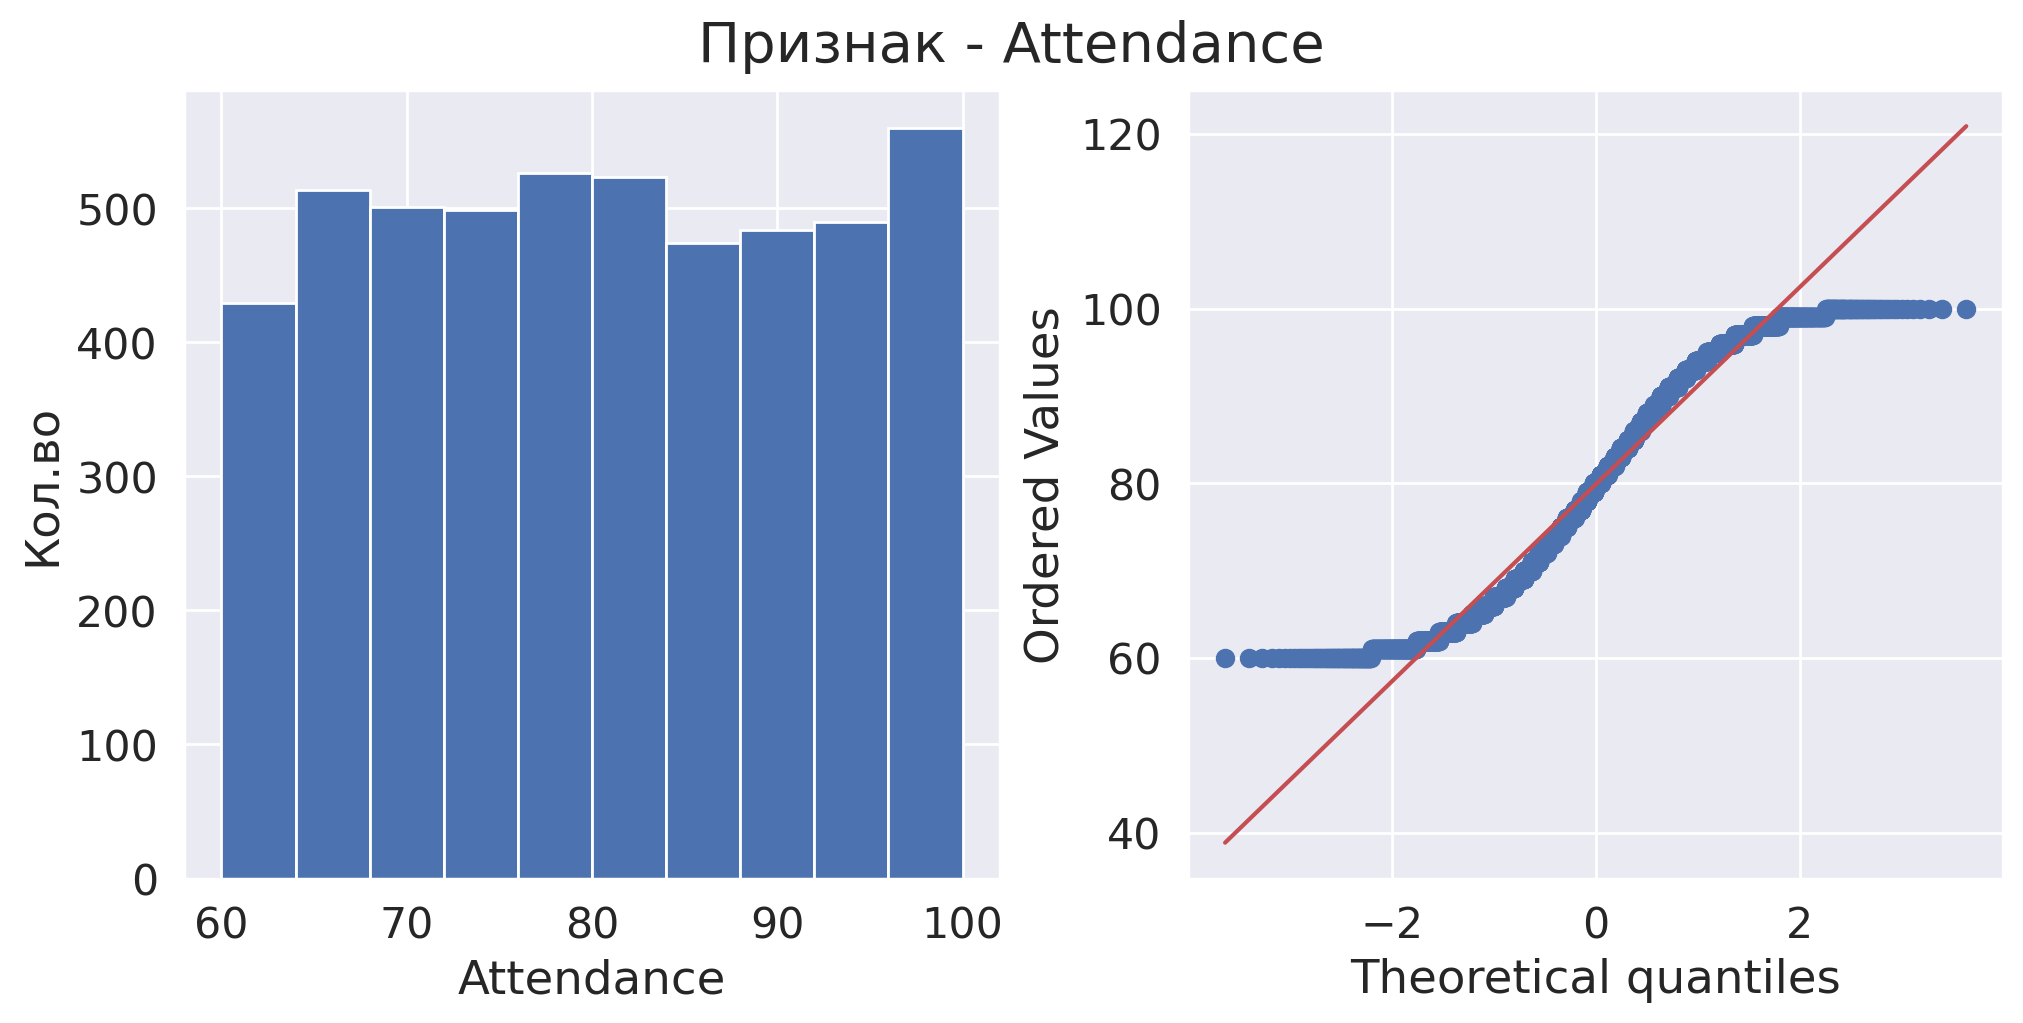

1.4036871263271391e-36
Стат. тест Шапиро-уилса показал, что распр. признака Attendance не может являться нормальным
D'Agostino's K-squared test показал, что распр. признака Attendance не может являться нормальным


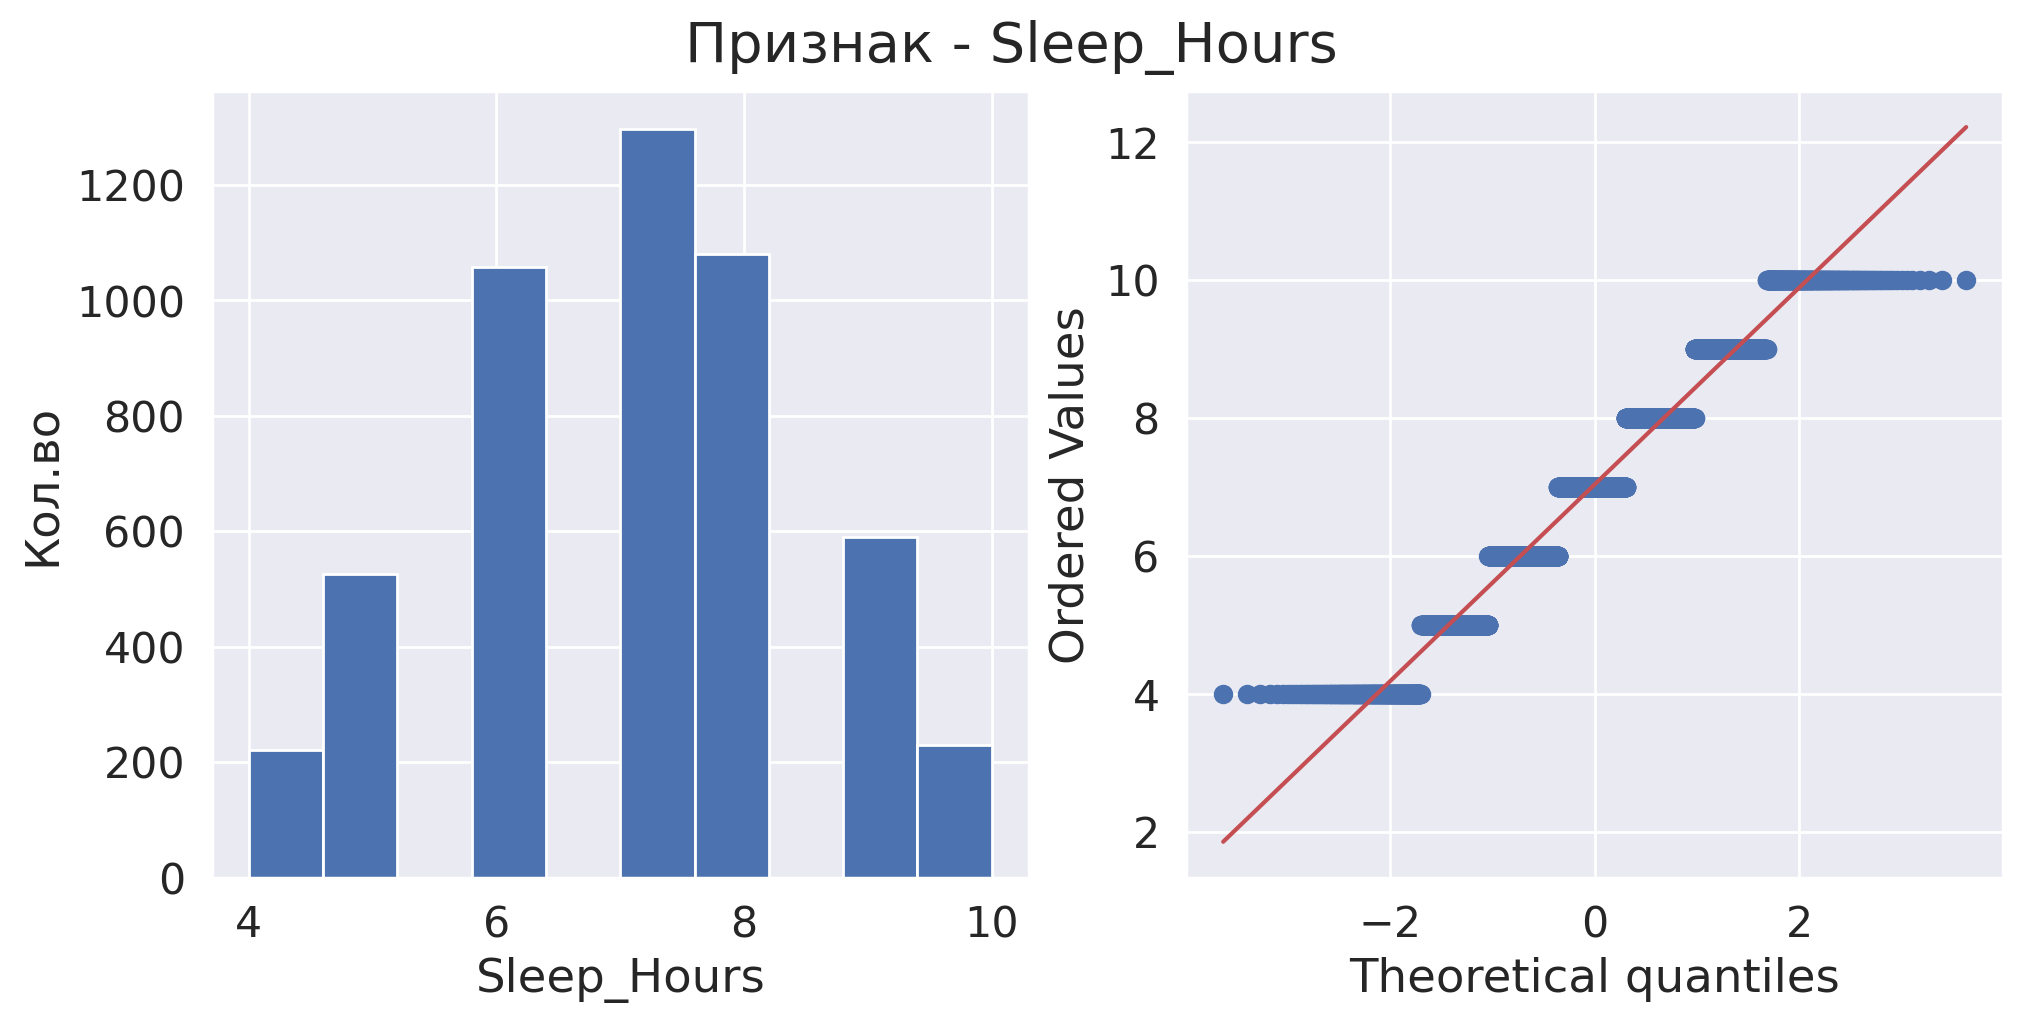

2.0133047081214945e-37
Стат. тест Шапиро-уилса показал, что распр. признака Sleep_Hours не может являться нормальным
D'Agostino's K-squared test показал, что распр. признака Sleep_Hours не может являться нормальным


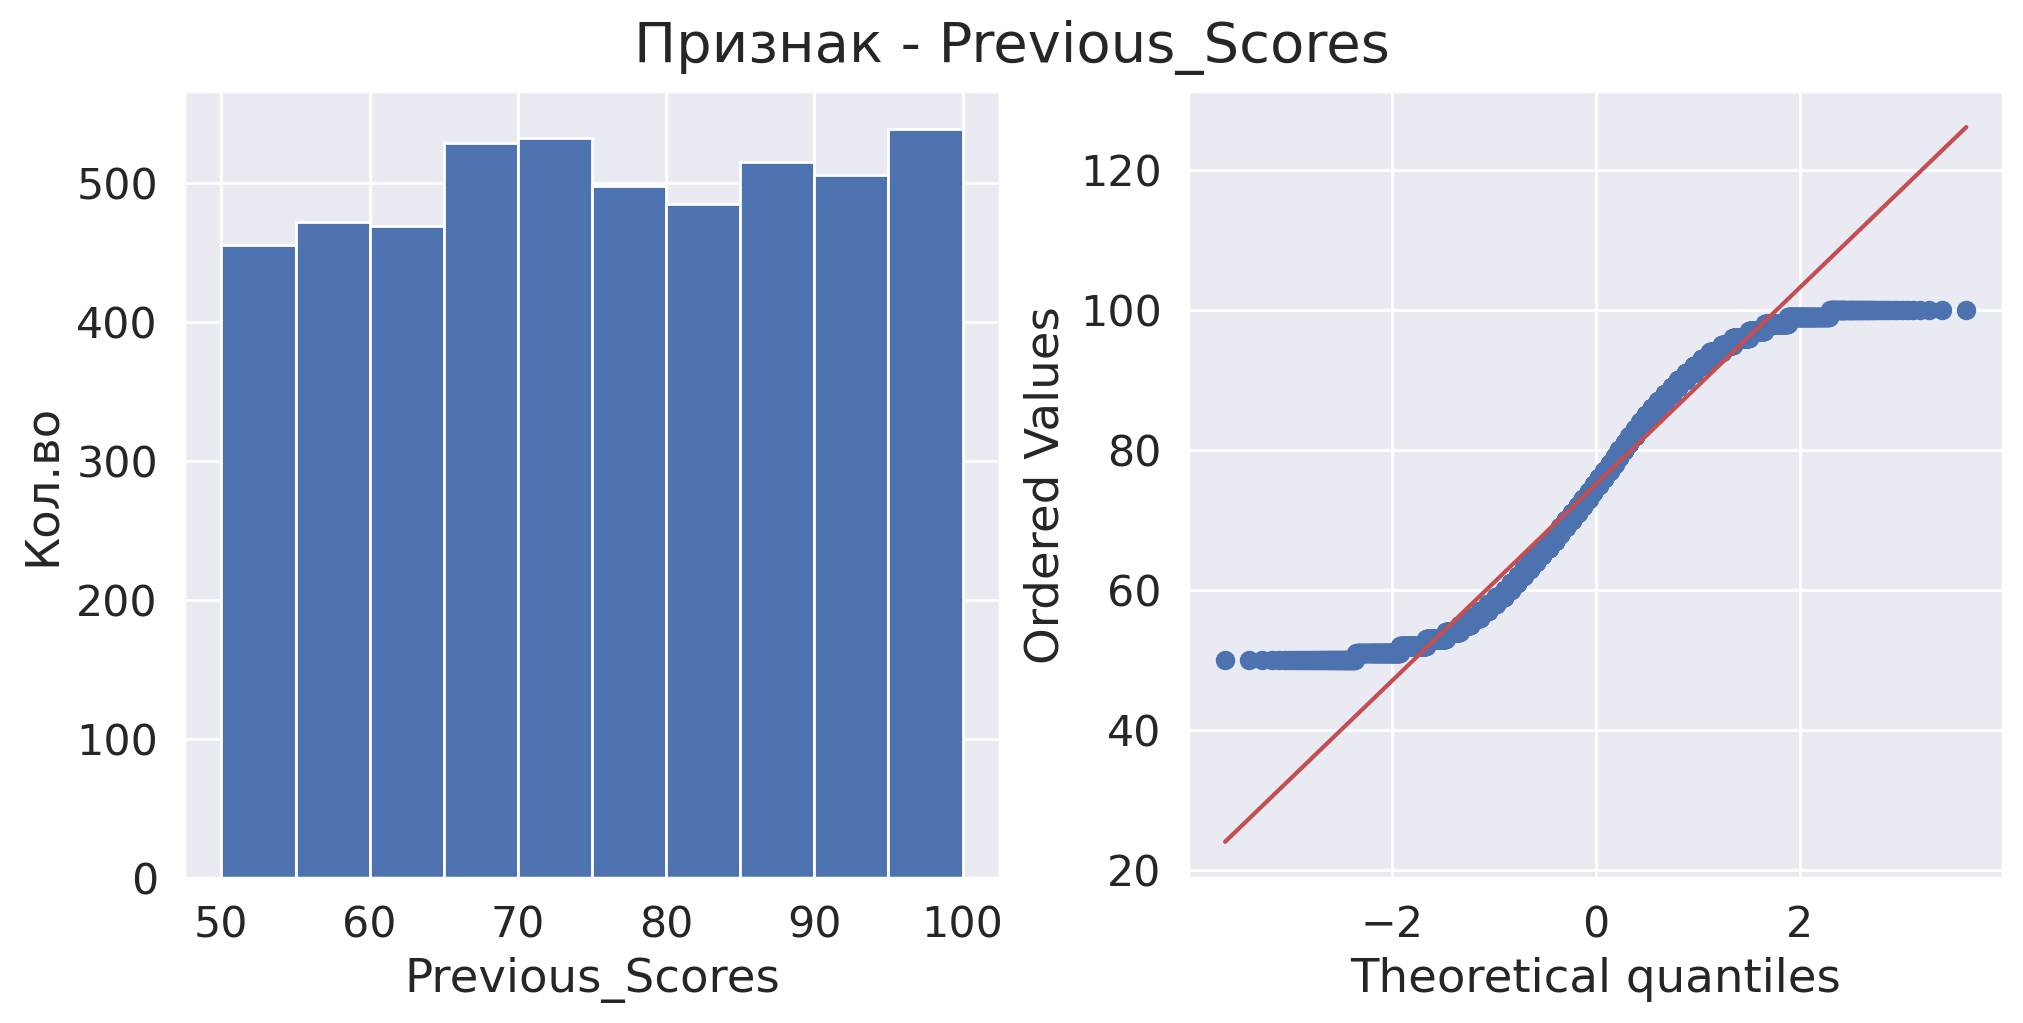

3.7161715702122574e-36
Стат. тест Шапиро-уилса показал, что распр. признака Previous_Scores не может являться нормальным
D'Agostino's K-squared test показал, что распр. признака Previous_Scores не может являться нормальным


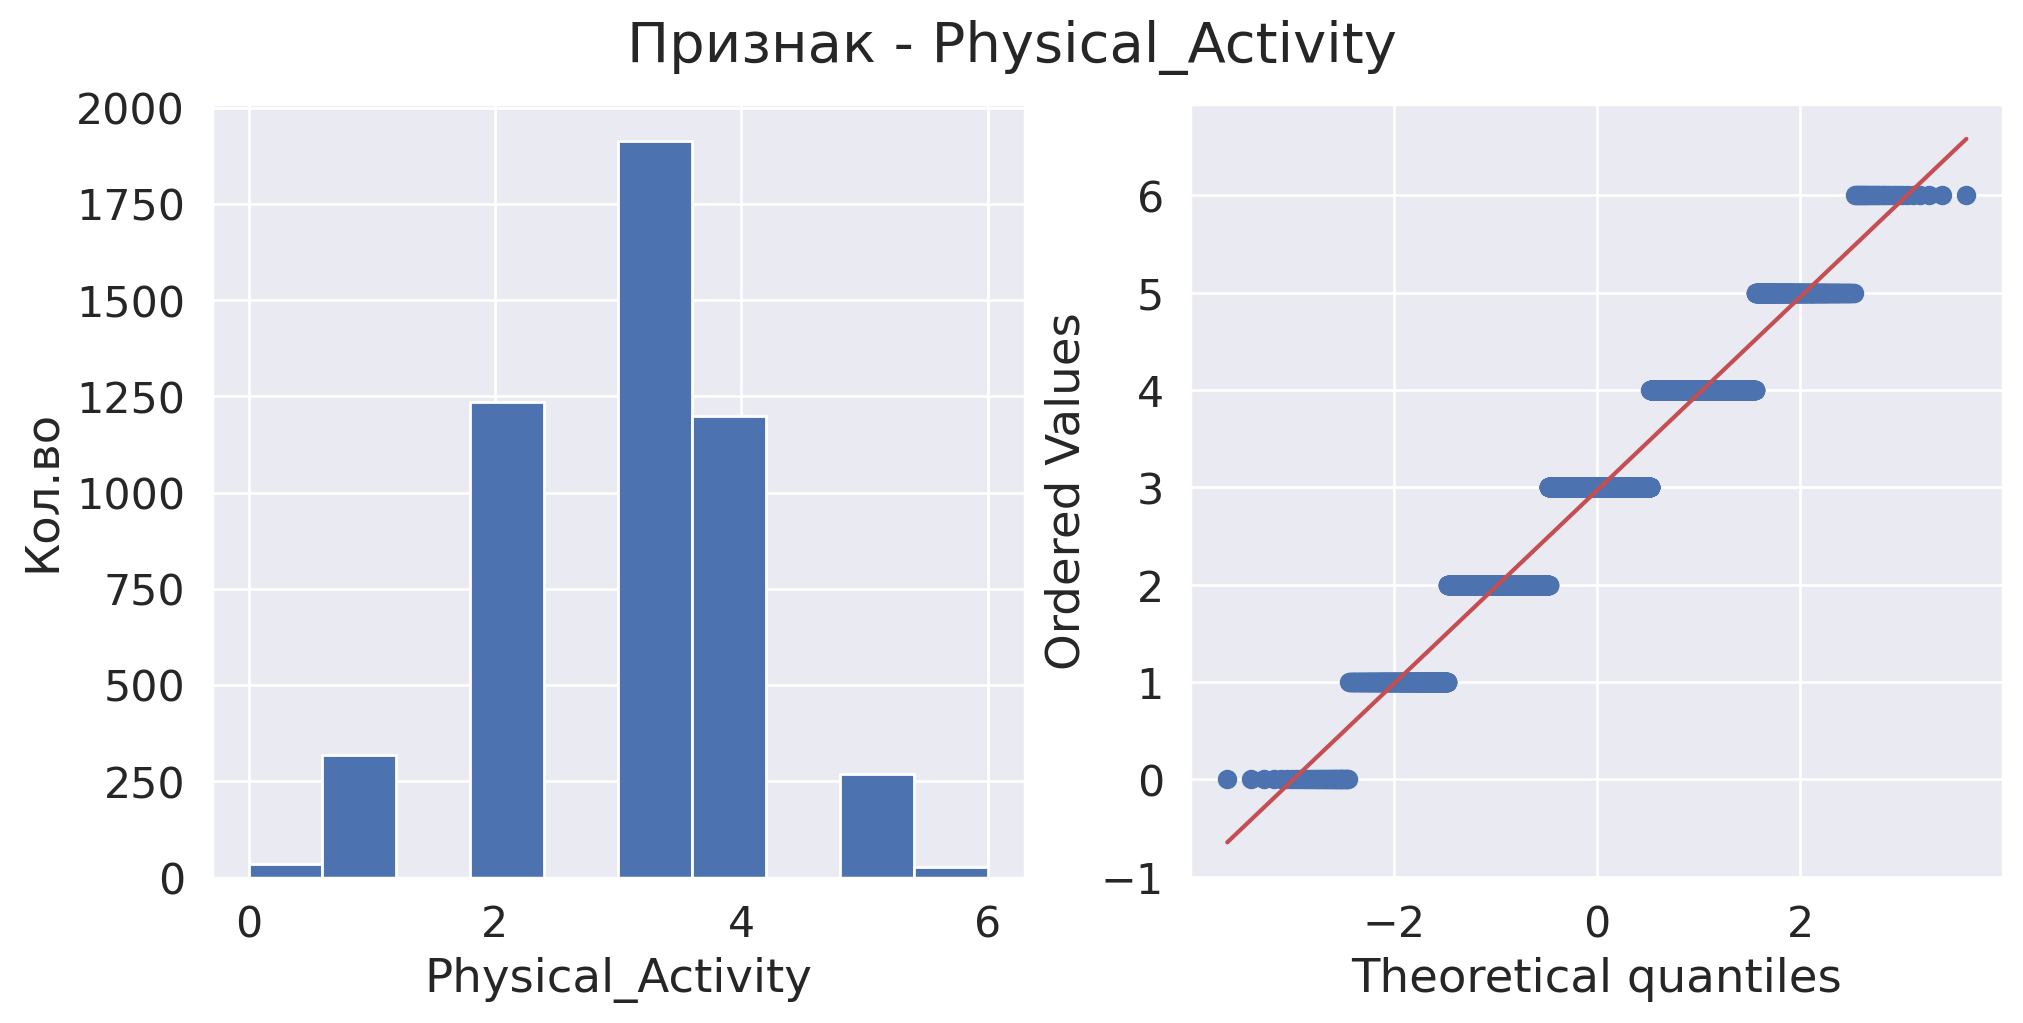

3.622798479332979e-45
Стат. тест Шапиро-уилса показал, что распр. признака Physical_Activity не может являться нормальным
D'Agostino's K-squared test показал, что распр. признака Physical_Activity может являться нормальным


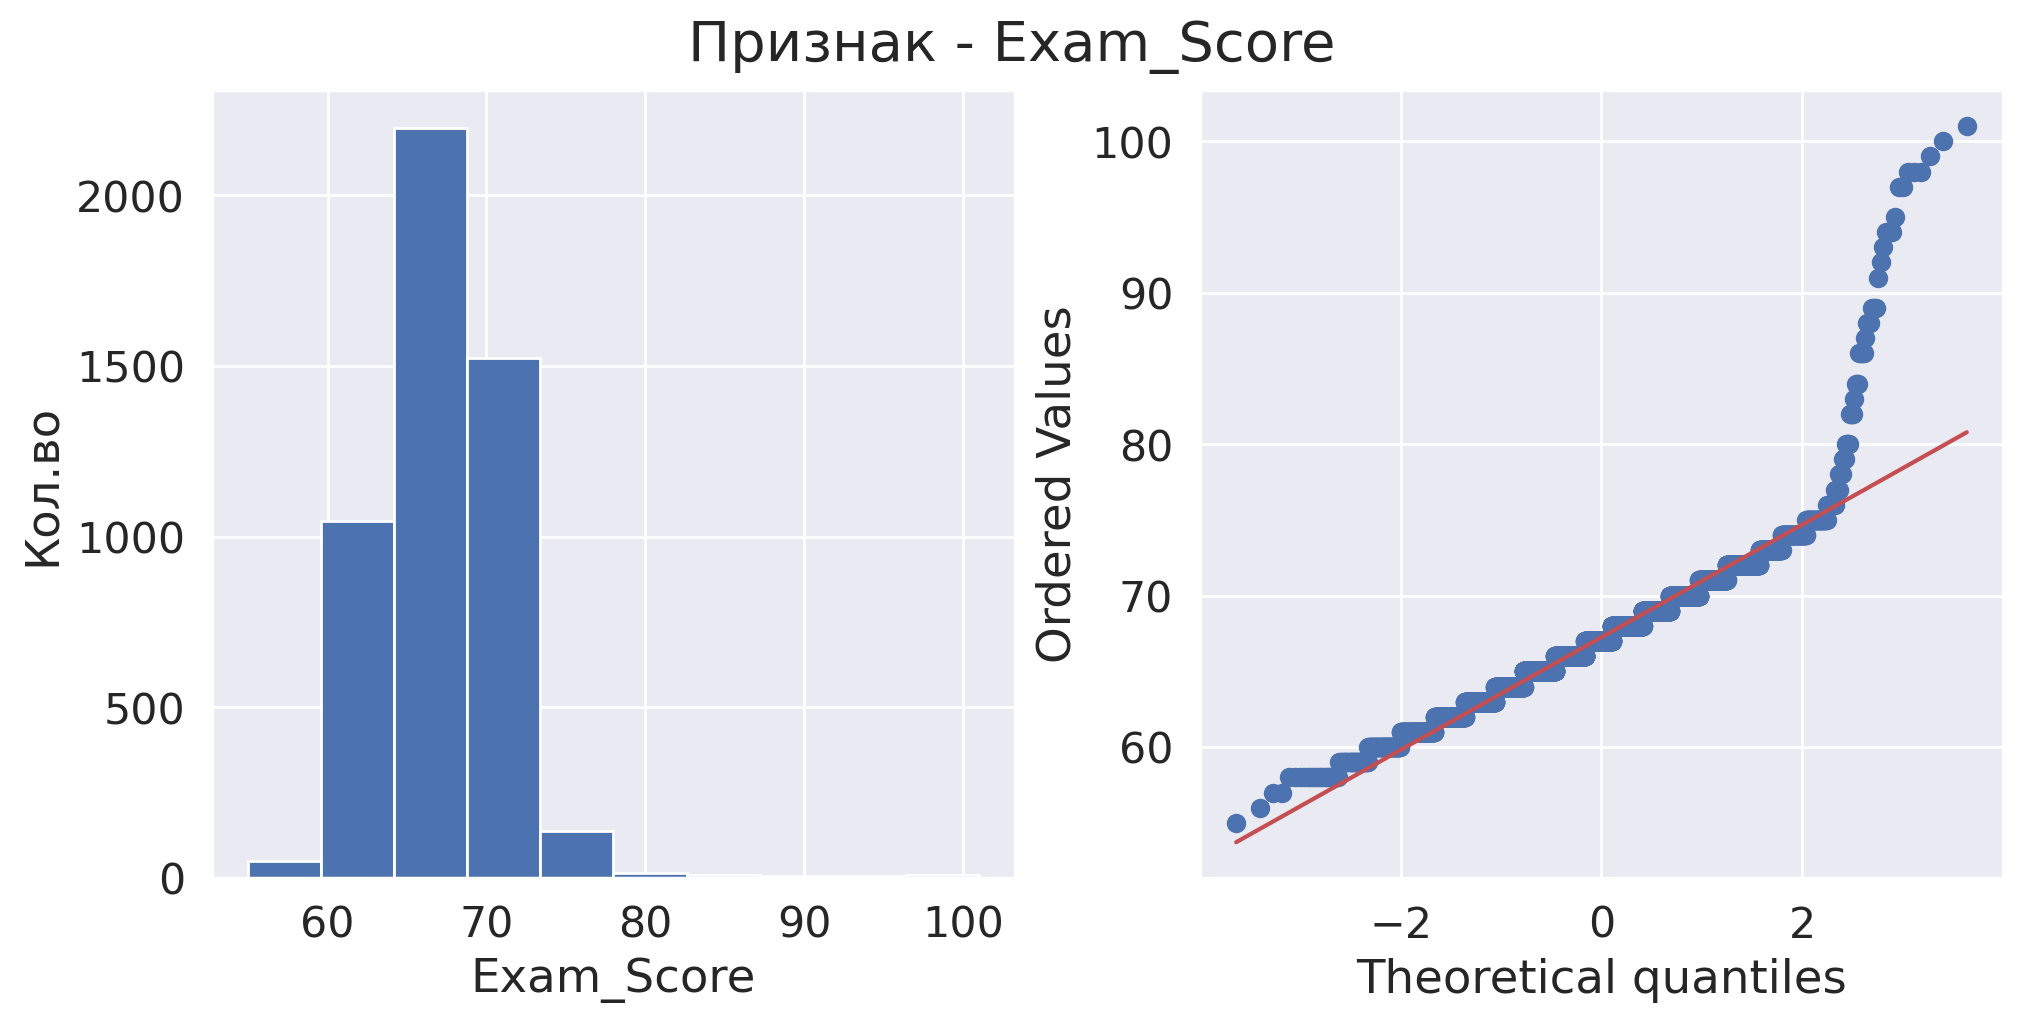

4.4687037300266914e-48
Стат. тест Шапиро-уилса показал, что распр. признака Exam_Score не может являться нормальным
D'Agostino's K-squared test показал, что распр. признака Exam_Score не может являться нормальным


In [212]:
for col in interesting_num_cols + [target_col]:
    x = df[col].dropna()
    if len(x) > 5000:
        x = x.sample(5000)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
    fig.suptitle("Признак - " + col)

    ax1.hist(x)
    ax1.set_xlabel(col); ax1.set_ylabel("Кол.во")

    sps.probplot(x, dist="norm", plot=ax2)
    ax2.set_title("")
    plt.show()

    print(sps.shapiro(x).pvalue)
    print("Стат. тест Шапиро-уилса показал, что распр. признака", col + " не" if sps.shapiro(x).pvalue < ALPHA else col, "может являться нормальным")
    print("D'Agostino's K-squared test показал, что распр. признака", col + " не" if sts.normaltest(x, nan_policy='omit').pvalue < ALPHA else col, "может являться нормальным")

*выводы*

<font color="#ae69c9ff">

Тест Шапиро-Уилка оказался чрезмерно сильным для наших целей, а другого теста для проверки именно что принадлежности классу нормальных я не припомню.

Я обратился к стене болтая и та посоветовала использовать [K-squared_test()](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test), он уже дал много более сравнимый результат с выодом, полученнмы глазами и qq-плотом. В принципе, я с ними согласн, про каждую фичу см. под соотв. графиком. Разве что вот признак `Sleep_Hoyrs` выхывает вопросы. Я скорее склонен сказать, что он распр. нормально, чем не нормально


### Часть 2

Цель — выявить, какие факторы связаны с итоговым баллом за экзамен (`Exam_Score`).

Для начала посмотрим на numeric фичи, хочется посмотреть, как они коррелируют с таргетом

1.  Основываясь на результатах Части 1, для каждой пары (`Exam_Score`, `количественная переменная`) выберите и обоснуйте подходящий коэффициент корреляции.
3.  Переменных у нас несколько, стало быть и тестов будет несколько. Это создает проблему множественной проверки гипотез (МПГ), увеличивая вероятность того, что будет допущена ошибка I рода. Стало быть, нам следует ко всему этому применить какую-нибудь поправку. Предлагается контролировать FWER (см. лекции).

**Справочная информация:** При множественной проверке гипотез (МПГ) FWER определяют как вероятность того, что хотя бы один критерий допустит ошибку первого рода. В условии независимости статистик критериев (мы будем допускать независимость) для контроля FWER применяют **поправку Бонферонни**: пусть задано $k$ критериев. Если приравнять уровень значимости каждого числу $\alpha/k$, то в условии независимости статистик FWER $\leq \alpha$.

<font color="#ae69c9ff">

Вот в этот момент я паонял, что во втором задании нужно было категориальные признаки пригонять через Спирмена, а у меня, ну... нет. 

<font color="#ae69c9ff">

Так, теперь по заданию. Я вообще не понял, че хотел сказать автор. Пожалуйста, не нужно пичать тз в предположении, что студенты знают мат.стат. 

Так вот. Го короче жить в предположении, что нулевая гипотеза - независимость `Exam_Score` и любого другого признака.
Дальше что там с критериями/коэфф., которыми будем считать: на семинарах/в книге Андрея/на лекциях/в праке выше (я не помню уже) я узнал, что тест Пирсона хорошо работает в предположении, что X и Y распределены нормально. Ну давайте и в это поверим, применим его в случае +-нормального распр. переменного. Иначе же приемним Спирмена. Поехали. 

О, кстати, здесь хочется вспомнить курс ВвАД, на котором был совет записывать результаты в df, сделаем и это

In [215]:
normal_flag = {
    'Hours_Studied': True, 'Attendance': False, 'Sleep_Hours': True,
    'Previous_Scores': False, 'Physical_Activity': True, 'Exam_Score': False
}

rows = []
for col in interesting_num_cols:
    df_tmp = df[[col, target_col]].dropna()
    pvalue = sps.pearsonr(df_tmp[col].to_numpy(), df_tmp[target_col].to_numpy()).pvalue if normal_flag[col] else sps.spearmanr(df_tmp[col].to_numpy(), df_tmp[target_col].to_numpy()).pvalue
    rows.append({'feature': col, 'pvalue': pvalue})

ans = pd.DataFrame(rows).sort_values('pvalue').reset_index(drop=True)
ans['ans_bonf'] = np.minimum(ans['pvalue'] * len(ans), 1.0) < ALPHA

print(ans)

             feature         pvalue  ans_bonf
0         Attendance   0.000000e+00      True
1      Hours_Studied  1.286349e-319      True
2    Previous_Scores   7.403011e-56      True
3  Physical_Activity   2.371742e-02     False
4        Sleep_Hours   1.665376e-01     False


<font color="#ae69c9ff">

Ахахах, никогда такого не было, и вот опять. Блин, и правда, ботать полезно, чтобы сдать экзамены. Ну, собственно, остальные 3 параметра, говорящие о неотвержении гипотезы независимости выглядят разумно.

### Часть 3

Теперь разберёмся с категориальной фичой: (`Extracurricular_Activities`). У переменной всего 2 значения, стало быть, мы можем провести так называемые *АБ тест*: проверку наличия разницы в распределении между двумя независимыми выборками.

1. Разделите выборку `Exam_Score` на две подвыборки по значениям категориальной переменной.
2. Проведите АБ тест. Подумайте, какой конкретно стат. тест стоит использовать, есть ли у него предположение о данных, если да, то их всенепременно стоит проверить.

<font color="#ae69c9ff">

Я тороплюсь, страшно не успеваю (23:32). Я просто 0 инфорамции знаю про A/B тестирование, это как будто бы вообще огромная отдельная тема. Ну, применим интуицию: хочется посмотреть, влияет ли что-то на что-то, тогда, если первое что-то имеет поля только Yes/No, скажем, что нулевая гипотеза - при Yes матож экзамена будет тот же, что и при No. Ну и на всё это дело хотим накинуть улучшенного Стьюдента, aka тест Уэлча.

In [217]:
# print(df)

df_tmp = df[[interesting_cat, target_col]].dropna()

A = df_tmp.loc[df_tmp[interesting_cat].astype(str) == "Yes", target_col].to_numpy()
B = df_tmp.loc[df_tmp[interesting_cat].astype(str) == "No", target_col].to_numpy()

print("A - Yes, кол-во:", A.size, "среднее -", A.mean())
print("B - No, кол-во:", B.size, "среднее -", B.mean())

pvalue = sps.ttest_ind(A, B, equal_var=False).pvalue
print("По мнению критерия Уэлча совпадение матожей", "отвергается" if pvalue < ALPHA else "не отвепается")

A - Yes, кол-во: 3938 среднее - 67.44184865413915
B - No, кол-во: 2669 среднее - 66.93143499437991
По мнению критерия Уэлча совпадение матожей отвергается


<font color="#ae69c9ff">

Хочется сказать, что тест чрезмерно строг и в реальных условиях я бы сказал, что матожи "почти равны" -> принял бы независимость

### Часть 4

Напишите, что Вы думаете насчёт следующих вопросов:

1. В Части 2 Вы применили поправку на МПГ. А если бы Вы решили объединить p-value от корреляций (Часть 2) и p-value от всех A/B тестов в один "пул" — было бы корректно применить одну общую поправку ко всем ним?
2. В Части 3 Вы сначала проверяли данные на нормальность, а затем выбирали основной тест. По сути, это последовательность из двух статистических тестов. Возникает ли в этом случае проблема множественных сравнений и нужно ли корректировать уровень значимости $\alpha$ для этого "пайплайна"? Объясните свою позицию: почему проблема МПГ здесь либо возникает, либо не возникает.
3. В целом сделайте вывод о том, какие результаты получились о взаимосвязи между факторами и баллом за экзамен.

**Вывод:**

<font color='red'>

Нет выводов (-3)

<font color='red'>

4. 7/10